# Bike Sharing: Multiple Linear Regression

## <a id='top'>Outline:<a />

1. [Introduction](#introduction)
2. [Data Preprocessing](#data-preprocessing)
    1. [Data Cleaning](#data-cleaning)
    2. [Data Transformation](#data-transformation)
3. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis)
    1. [Univariate Analysis](#univariate-analysis)
    2. [Bivariate Analysis](#bivariate-analysis)
4. [Feature Engineering](#feature-engineering)
    1. [Feature Scaling](#feature-scaling)
    2. [Feature Encoding](#feature-encoding)
    3. [Feature Selection](#feature-selection)
4. [Model Building](#model-building)
5. [Model Evaluation](#model-evaluation)
6. [Conclusion](#conclusion)

# **<a id='introduction'>1. INTRODUCTION<a/>**  [▲](#top)

### PROBLEM STATEMENT

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### BUSINESS GOAL

> To Model the demand for shared bikes with the available independent variables, which would be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model would be a good way for management to understand the demand dynamics of a new market. 

### IMPORTING REQUIRED LIBRARIES

In [1]:
#importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set options to display all rows and columns
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

In [3]:
# Set Visualization theme
sns.set_theme()
sns.set_context("talk")

### LOADING THE DATASET

In [4]:
#Read the csv file using pandas
bike_sharing = pd.read_csv('day.csv')
bike_sharing.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [5]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_sharing.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [7]:
bike_sharing.shape

(730, 16)

#### OBSERVATIONS

- There are 730 rows and 16 columns in the dataset. There are no non-null columns in the entire dataset.
- `dteday` should be in datetime format but it is in object datatype.
- All the other columns are either float or int.
- Some columns logically make sense to be treated as categorical variables but are in int/float datatype, e.g. `season`, `yr`, `mnth`, etc.

### IDENTIFY THE TYPE OF THE COLUMNS

In [8]:
bike_sharing.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

#### OBSERVATIONS

The **Categorical Columns** are:

> `season`, `year`, `month`, `holiday`, `weekday`, `working_day`, and `weather_situations`.

However, the **Numerical Columns** are:

> `temperature`, `apparent_temperature`, `humidity`, `wind_speed`, and `count`.

# **<a id='data-preprocessing'>2. DATA PREPROCESSING<a/>**  [▲](#top)

## **<a id='data-cleaning'>A. DATA CLEANING<a/>**  [▲](#top)

### CHECK FOR MISSING VALUES

In [9]:
# Column-wise
bike_sharing.isnull().mean()*100

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

> There are **NO Null Values** in columns.

In [10]:
# Row-wise
bike_sharing[bike_sharing.isnull().any(axis=1)]

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

> There are **NO Null Values** in rows.

### CHECK FOR DATA DUPLICACY

In [11]:
bike_sharing[bike_sharing.duplicated()]

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

> There are **NO Duplicate Rows** in the dataset.

## **<a id='data-transformation'>B. DATA TRANSFORMATION<a/>**  [▲](#top)

### DROP RENDUNDANT COLUMNS

In [12]:
bike_sharing.head(2)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   

   cnt  
0  985  
1  801

In [13]:
bike_sharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Based on the Data Definitions and observations on the columns of the dataset, some columns appear to be redundant:

1. `instant`: Instant is merely an index for the dataset.
<br>

2. `dteday`: Since we already have the columns `yr`, `mnth` and `weekday` we no longer need this column.
<br>

3. `casual` and `registered`: The variables casual and registered represent different user types in the bike rental data. Specifically:
    - `casual`: Indicates the number of casual users who have made a rental.
    - `registered`: Shows the total number of registered users who have made a booking on a given day.
    - `cnt`: Represents the total number of bike rentals, including both casual and registered users.
    - Both `casual` and `registered` are directly additive to `cnt`. Including them in the model would add redundant information and could lead to **multicollinearity**, where independent variables are highly correlated with each other, making it harder to assess the effect of each variable. 
    - When building a predictive model for bike rentals, the `cnt` variable provides the comprehensive target we aim to predict.

In [14]:
bike_sharing.drop(columns=['instant', 'dteday', 'casual', 'registered'], inplace=True)

In [15]:
bike_sharing.head(2)

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   

      atemp      hum  windspeed  cnt  
0  18.18125  80.5833  10.749882  985  
1  17.68695  69.6087  16.652113  801

In [16]:
# Renaming some ambiguous columns
bike_sharing = bike_sharing.rename(columns = {
    'yr': 'year',
    'mnth': 'month',
    'workingday': 'working_day',
    'weathersit': 'weather_situations',
    'temp': 'temperature',
    'atemp': 'apparent_temperature',
    'hum': 'humidity',
    'windspeed': 'wind_speed',
    'cnt': 'count'
})

In [17]:
bike_sharing.head(2)

season  year  month  holiday  weekday  working_day  weather_situations  \
0       1     0      1        0        6            0                   2   
1       1     0      1        0        0            0                   2   

   temperature  apparent_temperature  humidity  wind_speed  count  
0    14.110847              18.18125   80.5833   10.749882    985  
1    14.902598              17.68695   69.6087   16.652113    801

In [18]:
bike_sharing.shape

(730, 12)

### HANDLING OUTLIERS FOR NUMERICAL COLUMNS (IQR METHOD)

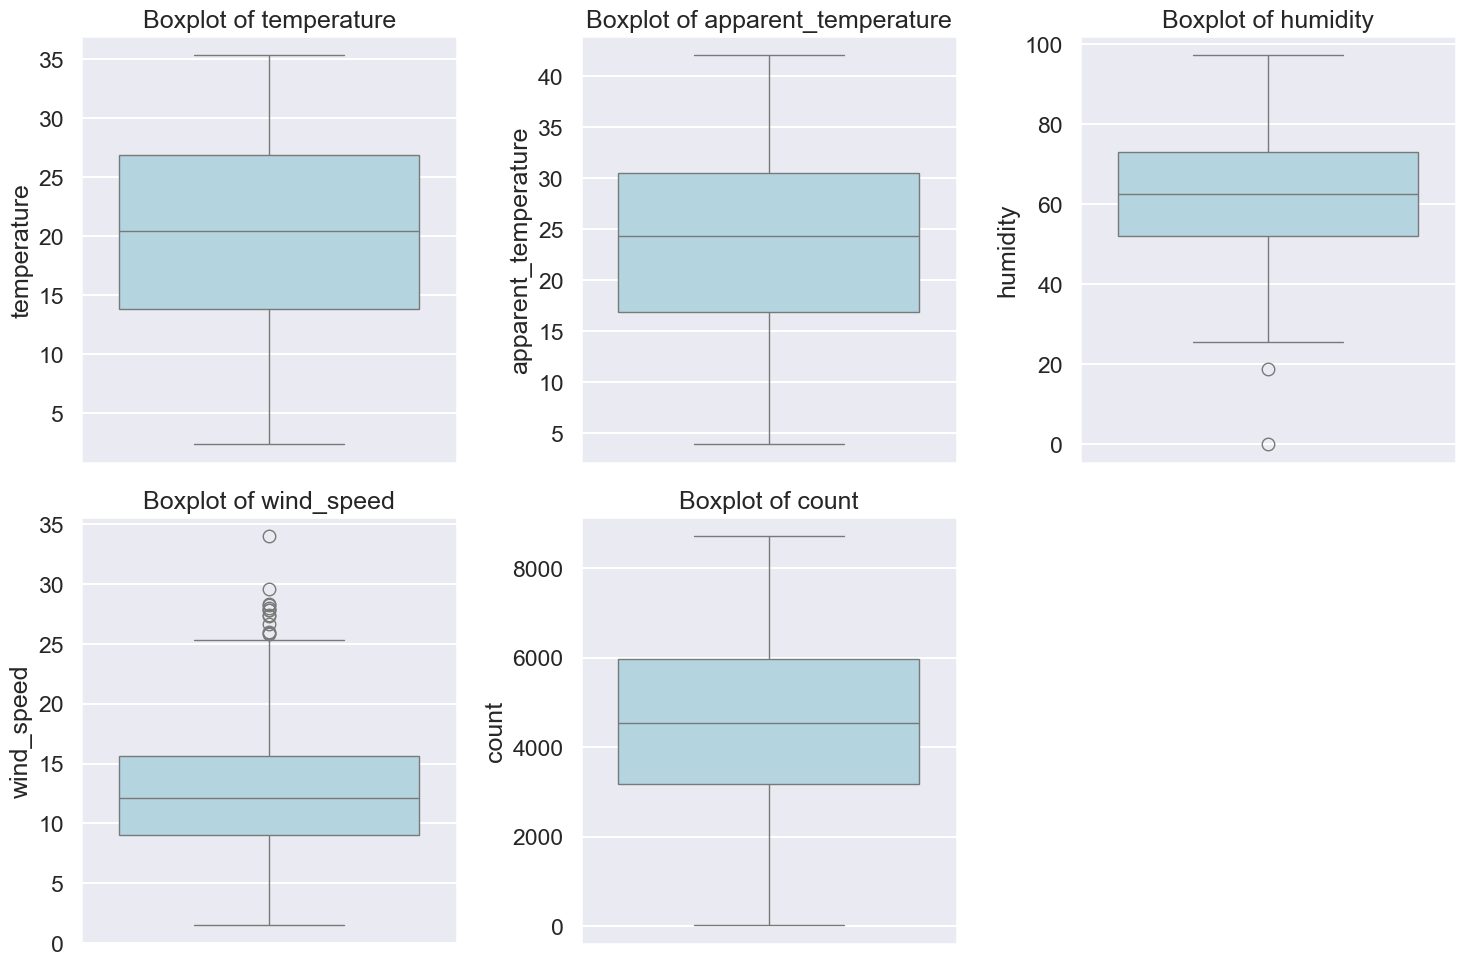

In [19]:
# List of columns to plot
columns_to_plot = ['temperature', 'apparent_temperature', 'humidity', 'wind_speed', 'count']

# Create a figure and axes
plt.figure(figsize=(15, 10))

# Plot boxplots for each column
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  
    sns.boxplot(y=bike_sharing[column], color='lightblue')
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

# Adjust layout to fit all subplots
plt.tight_layout()
plt.show()

In [20]:
# Iterate over each column to handle outliers
for column in columns_to_plot:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = bike_sharing[column].quantile(0.25)
    Q3 = bike_sharing[column].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    bike_sharing = bike_sharing[(bike_sharing[column] >= lower_bound) & (bike_sharing[column] <= upper_bound)]
    
bike_sharing.head()

season  year  month  holiday  weekday  working_day  weather_situations  \
0       1     0      1        0        6            0                   2   
1       1     0      1        0        0            0                   2   
2       1     0      1        0        1            1                   1   
3       1     0      1        0        2            1                   1   
4       1     0      1        0        3            1                   1   

   temperature  apparent_temperature  humidity  wind_speed  count  
0    14.110847              18.18125   80.5833   10.749882    985  
1    14.902598              17.68695   69.6087   16.652113    801  
2     8.050924               9.47025   43.7273   16.636703   1349  
3     8.200000              10.60610   59.0435   10.739832   1562  
4     9.305237              11.46350   43.6957   12.522300   1600

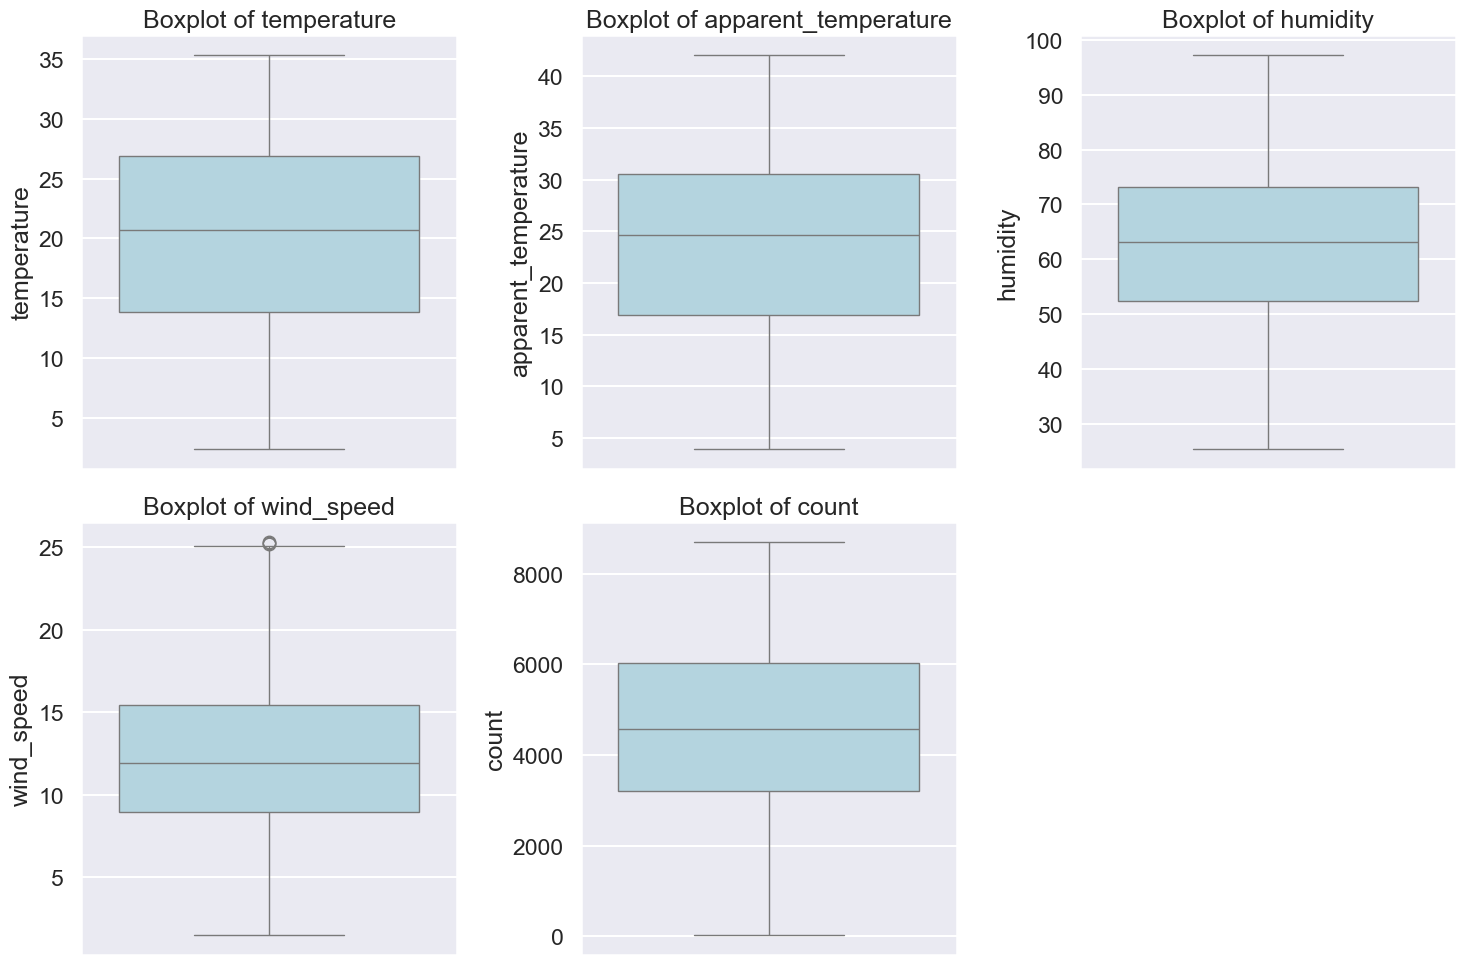

In [21]:
# Create a figure and axes
plt.figure(figsize=(15, 10))

# Plot boxplots for each column
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  
    sns.boxplot(y=bike_sharing[column], color='lightblue')
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

# Adjust layout to fit all subplots
plt.tight_layout()
plt.show()

#### OBSERVATIONS

- `temperature`, `apparent_temperature`, and `count` had no outliers.
- `humidity` and `wind_speed` had some outliers and we handled them using the IQR method.
- And now, we can see that we have handled the outliers for all the Numerical Columns.

### HANDLING THE VALUES OF CATEGORICAL COLUMNS

In [22]:
bike_sharing.season.value_counts().sort_index()

season
1    171
2    181
3    188
4    176
Name: count, dtype: int64

In [23]:
bike_sharing.year.value_counts().sort_index()

year
0    359
1    357
Name: count, dtype: int64

In [24]:
bike_sharing.month.value_counts().sort_index()

month
1     61
2     52
3     58
4     58
5     62
6     60
7     62
8     62
9     60
10    60
11    60
12    61
Name: count, dtype: int64

In [25]:
bike_sharing.holiday.value_counts().sort_index()

holiday
0    695
1     21
Name: count, dtype: int64

In [26]:
bike_sharing.weekday.value_counts().sort_index()

weekday
0    103
1    102
2    103
3    102
4    101
5    103
6    102
Name: count, dtype: int64

In [27]:
bike_sharing.working_day.value_counts().sort_index()

working_day
0    226
1    490
Name: count, dtype: int64

In [28]:
bike_sharing.weather_situations.value_counts().sort_index()

weather_situations
1    453
2    243
3     20
Name: count, dtype: int64

> Using the **Data Dictionary** we can replace the values of the columns as:

In [29]:
bike_sharing.season.replace({1: "spring", 2: "summer", 3: "fall", 4: "winter"}, inplace=True)

bike_sharing.year.replace({0: 2018, 1: 2019}, inplace=True)

bike_sharing.month.replace({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 
                            7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'}, inplace=True)

bike_sharing.weekday.replace({0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat'}, inplace=True)

bike_sharing.weather_situations.replace({1:'good',2:'moderate',3:'bad',4:'severe'}, inplace=True)

bike_sharing.head()

season  year month  holiday weekday  working_day weather_situations  \
0  spring  2018   jan        0     sat            0           moderate   
1  spring  2018   jan        0     sun            0           moderate   
2  spring  2018   jan        0     mon            1               good   
3  spring  2018   jan        0     tue            1               good   
4  spring  2018   jan        0     wed            1               good   

   temperature  apparent_temperature  humidity  wind_speed  count  
0    14.110847              18.18125   80.5833   10.749882    985  
1    14.902598              17.68695   69.6087   16.652113    801  
2     8.050924               9.47025   43.7273   16.636703   1349  
3     8.200000              10.60610   59.0435   10.739832   1562  
4     9.305237              11.46350   43.6957   12.522300   1600

# **<a id='exploratory-data-analysis'>3. EXPLORATORY DATA ANALYSIS (EDA)<a/>**  [▲](#top)

In [30]:
bike_sharing.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'working_day',
       'weather_situations', 'temperature', 'apparent_temperature', 'humidity',
       'wind_speed', 'count'],
      dtype='object')

In [31]:
# Categorizing all the columns
num_cols = ['temperature', 'apparent_temperature', 'humidity', 'wind_speed', 'count']
cat_cols = ['season', 'year', 'month', 'holiday', 'weekday', 'working_day', 'weather_situations']

## **<a id='univariate-analysis'>A. UNIVARIATE ANALYSIS<a/>**  [▲](#top)

### NUMERICAL FEATURES

In [32]:
round(bike_sharing[num_cols].describe(), 2)

temperature  apparent_temperature  humidity  wind_speed    count
count       716.00                716.00    716.00      716.00   716.00
mean         20.40                 23.82     63.13       12.48  4536.61
std           7.53                  8.16     13.92        4.81  1932.26
min           2.42                  3.95     25.42        1.50    22.00
25%          13.83                 16.89     52.46        8.99  3214.00
50%          20.74                 24.61     63.08       11.96  4572.50
75%          26.93                 30.56     73.26       15.46  6031.75
max          35.33                 42.04     97.25       25.33  8714.00

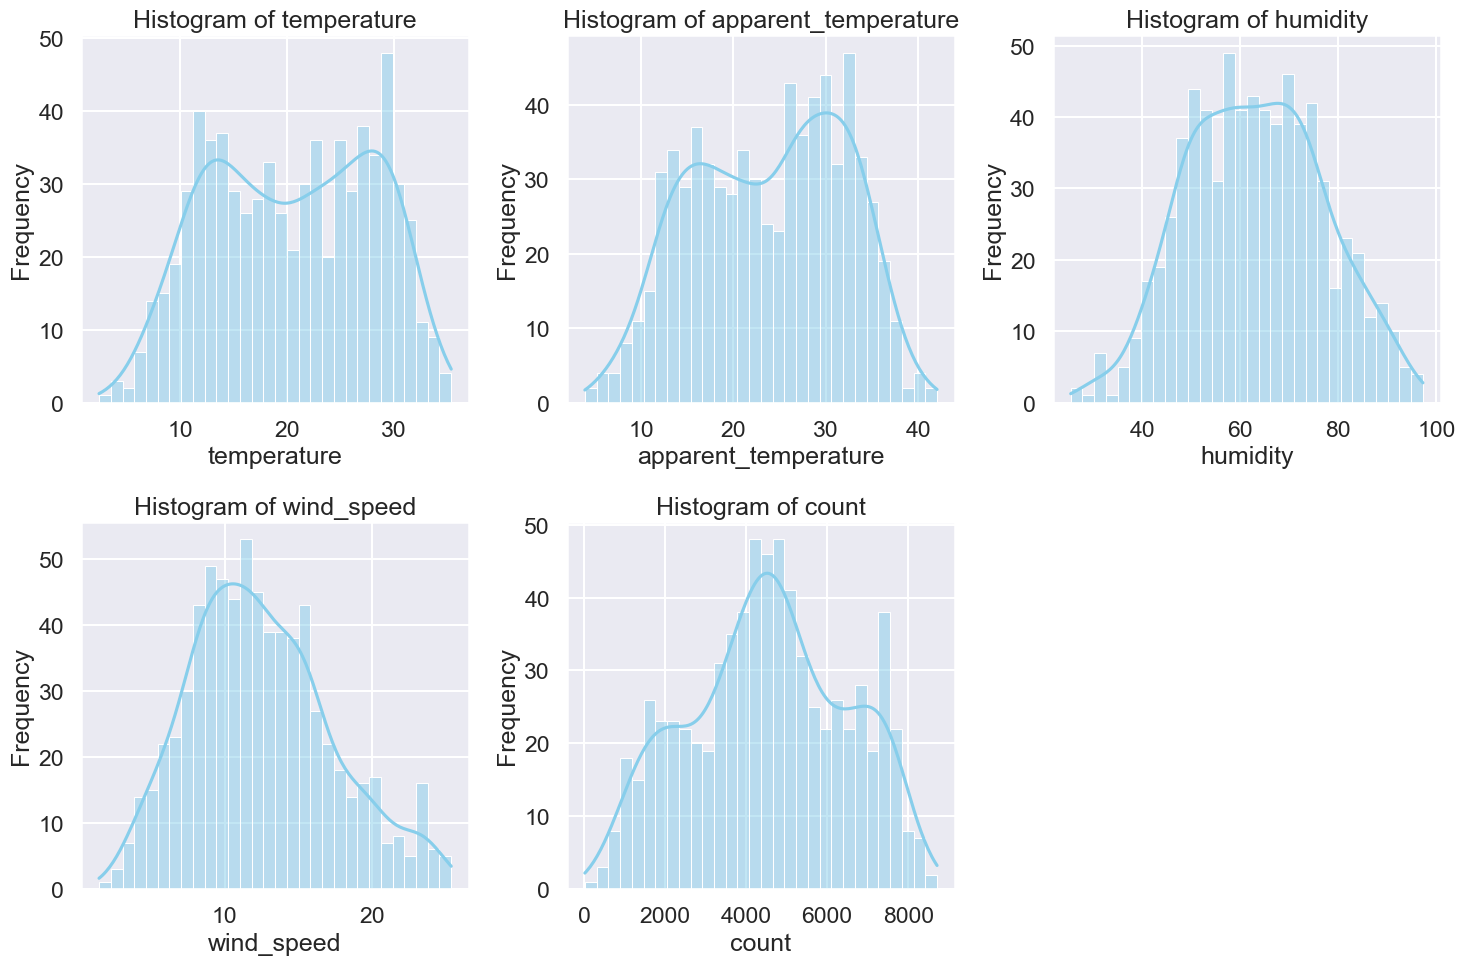

In [33]:
# Create a figure and axes
plt.figure(figsize=(15, 10))

# Loop through numerical columns and plot histograms
for i, column in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(bike_sharing[column], bins=30, color='skyblue', edgecolor='white', kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout to fit all subplots
plt.tight_layout()
plt.show()

In [34]:
bike_sharing['temperature'].skew()

-0.07195707343366815

In [35]:
bike_sharing['apparent_temperature'].skew()

-0.1431973182843936

In [36]:
bike_sharing['humidity'].skew()

0.05512601081969183

In [37]:
bike_sharing['wind_speed'].skew()

0.4402628212970665

In [38]:
bike_sharing['count'].skew()

-0.06133149338229405

#### OBSERVATIONS

1. `temperature`, `apparent_temperature` and `count` have **Multiple Peaks** and relatively **Low Skewness**.

2. `humidity` has **Low Skewness** and `wind_speed` has a **Moderate Positive Skewness**.

3. Highest Frequency of `count` is observed around 4000.

### CATEGORICAL FEATURES

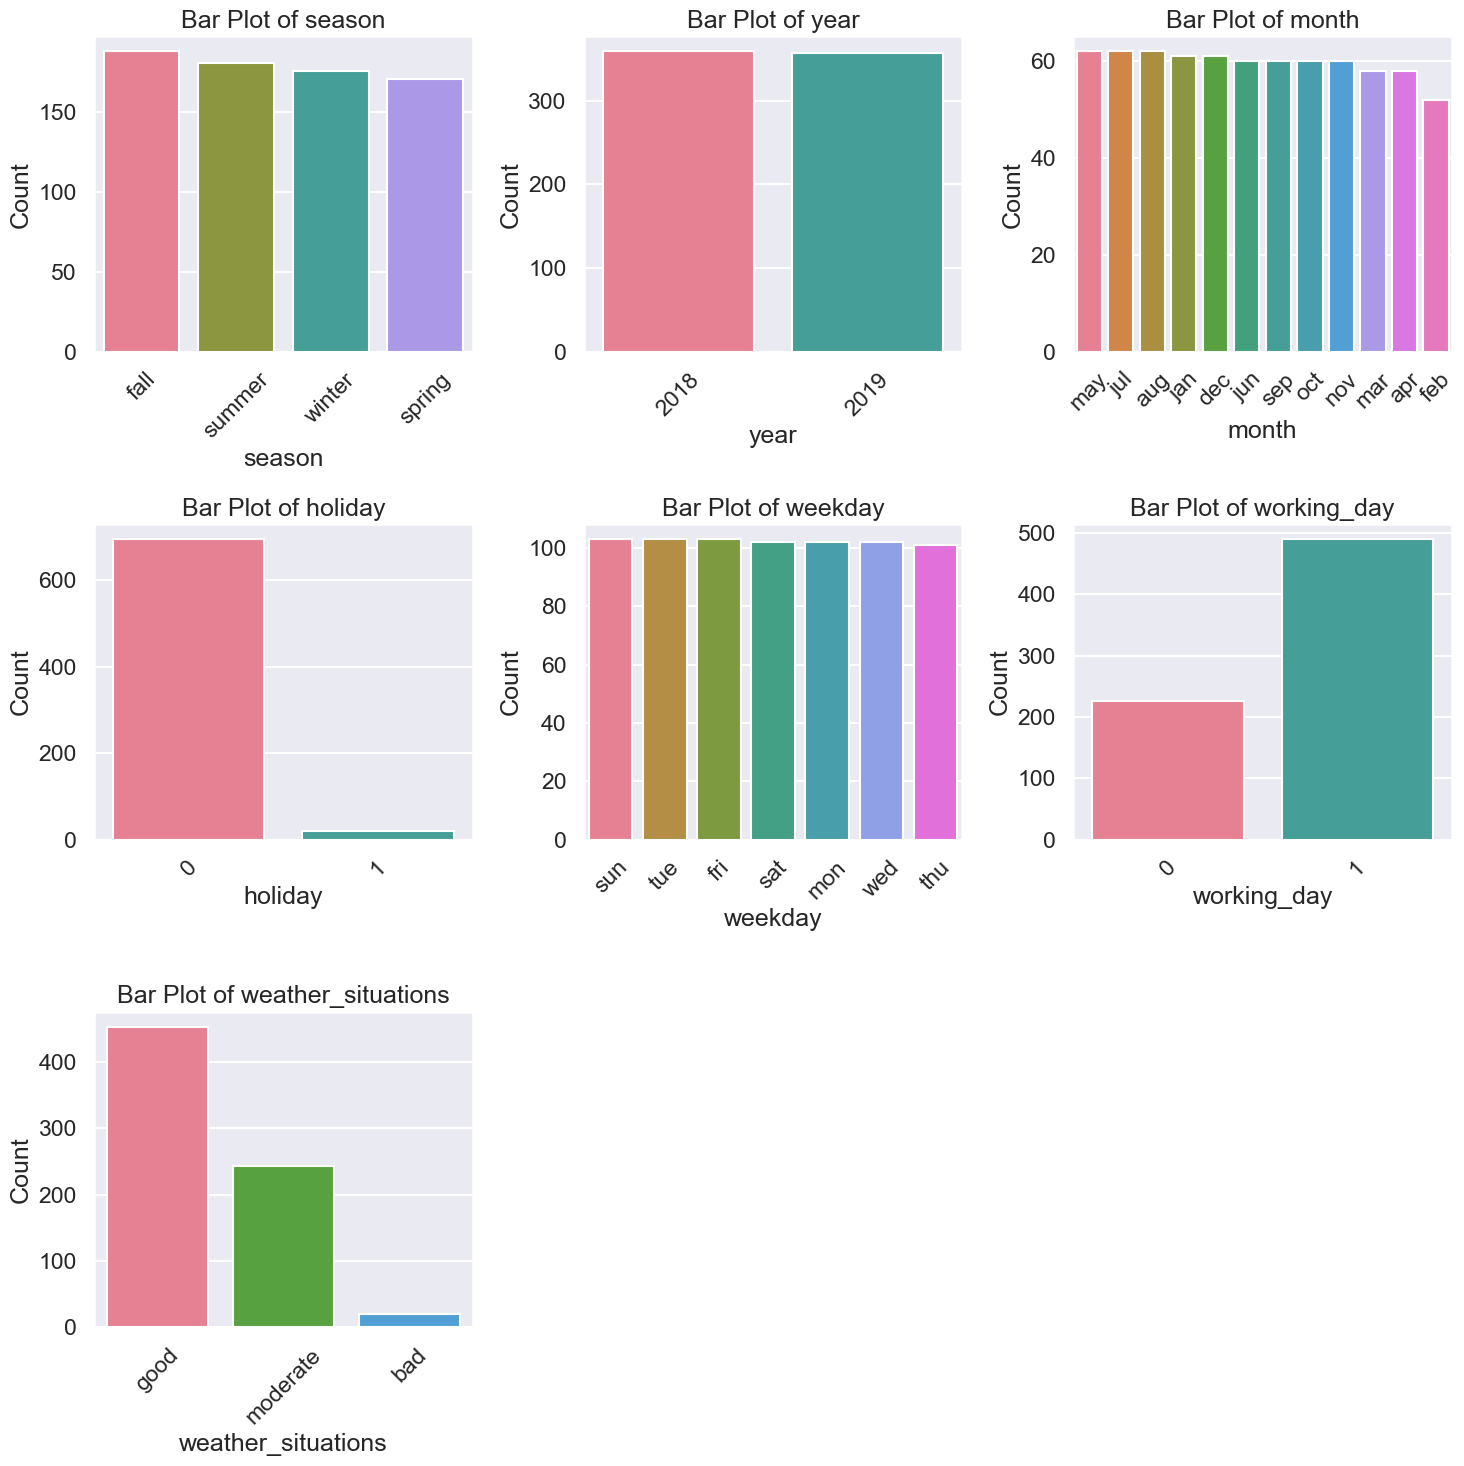

In [39]:
# Create a figure and axes
plt.figure(figsize=(15, 15))

# Loop through categorical columns and plot bar plots
for i, column in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    
    # Calculate counts of each category
    count_data = bike_sharing[column].value_counts()
    
    # Create a bar plot
    sns.barplot(x=count_data.index, y=count_data.values, palette='husl')
    
    # Set title and labels
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='center')

# Adjust layout to fit all subplots
plt.tight_layout()
plt.show()

#### OBSERVATIONS

1. Demand is higher on the days when weather situations are **GOOD**.
2. Demand is higher on the **working days** and lower on the holidays and weekends.
3. Season, Year, Month, and Weekday has no significant impact on the demand for bikes.

## **<a id='bivariate-analysis'>B. BIVARIATE ANALYSIS<a/>**  [▲](#top)

### CORRELATION BETWEEN NUMERICAL FEATURES

***Correlation Criteria:*** Correlation Coefficient (r) measures the strength and direction of the linear relationship between two variables. It ranges from -1 to 1, where:

- 1: Perfect positive linear relationship
- -1: Perfect negative linear relationship
- 0: No linear relationship

***Common Criteria:***

- |r| < 0.1: Weak correlation; the relationship between the variables is minimal.
- 0.1 ≤ |r| < 0.3: Moderate correlation; some relationship exists, but it's not very strong.
- 0.3 ≤ |r| < 0.5: Strong correlation; there is a notable relationship between the variables.
- |r| ≥ 0.5: Very strong correlation; the variables are highly related.

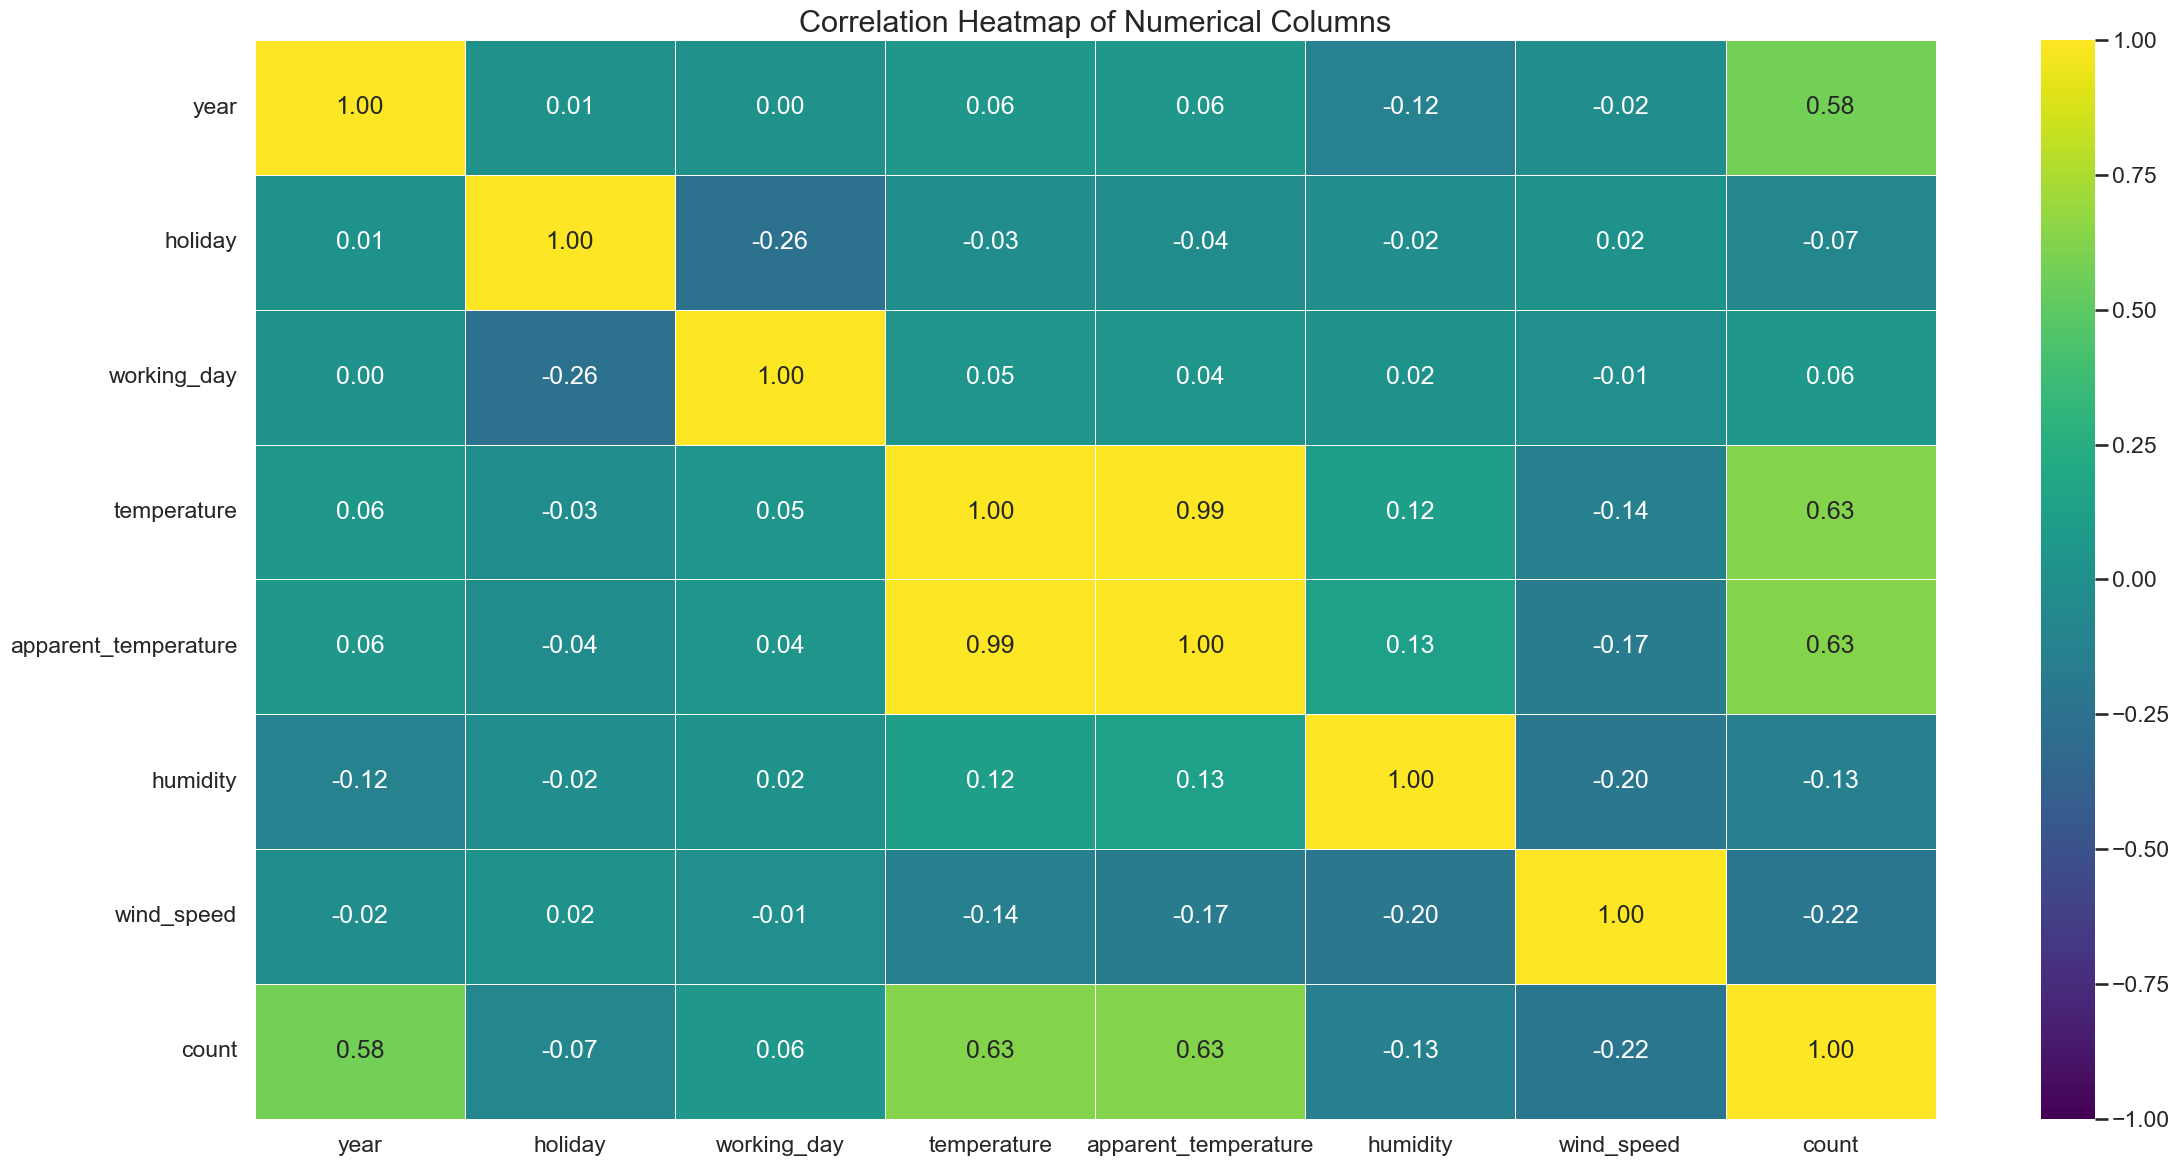

In [40]:
# Compute correlation matrix
corr_matrix = bike_sharing.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(24, 12))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis', vmin=-1, vmax=1, linewidths=0.5)

# Add titles and labels
plt.title('Correlation Heatmap of Numerical Columns', fontsize=22)
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

In [41]:
bike_sharing['apparent_temperature'].corr(bike_sharing['temperature'])

0.9917319563911691

#### OBSERVATIONS

1. `count` shows significant positive correlations with `temperature` and `apparent_temperature`, moderate correlation with `year` and moderate inverse correlation with `wind_speed`.

2. Given that `temperature` and `apparent_temperature` are highly correlated with each other (approximately 1), we should consider dropping `apparent_temperature` before performing linear regression. This is because including both features in the model can lead to **multicollinearity**, which inflates the variance of the coefficient estimates and makes the model's predictions unstable and less interpretable. By dropping one of these highly correlated features, we can reduce multicollinearity, leading to more reliable and interpretable regression coefficients.

3.  `working_day` and `holiday` have a moderate negative correlation. 
4. `humidity` has moderate correlation with `wind_speed`, `year`, `temperature`, `apparent_teperature` and `count`. Hence it must be check for multicollinearity.

#### HANDLING UNWANTED MULTICOLLINEARITY

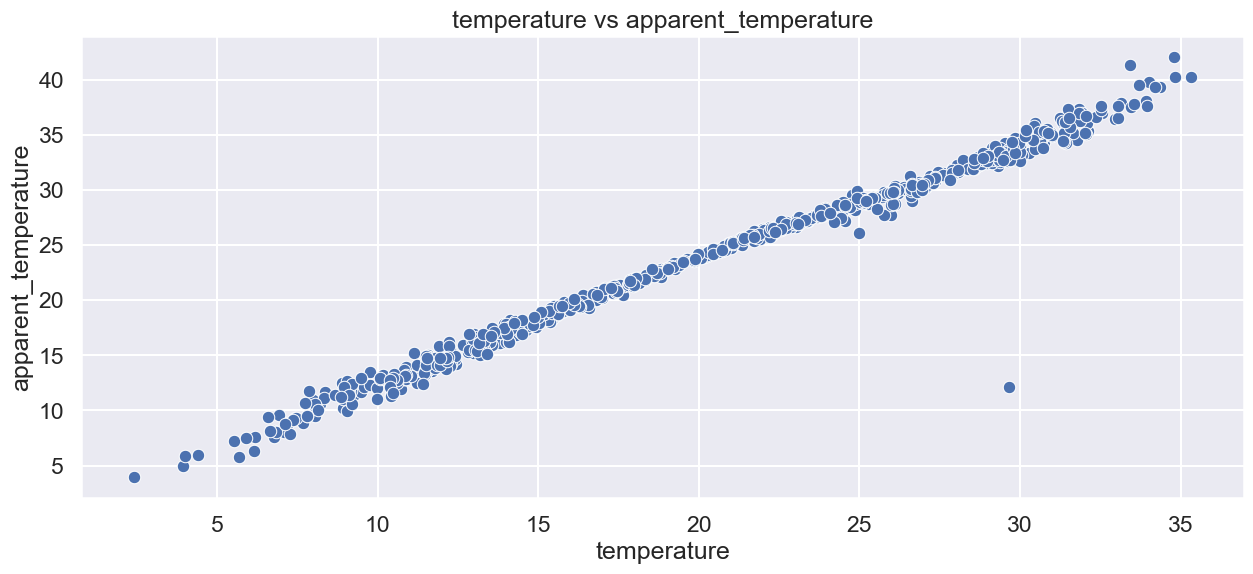

In [42]:
# Create a figure and axes
plt.figure(figsize=(15, 6))

# Create a scatterplot for `temperature` vs `apparent_temperature`
sns.scatterplot(x='temperature', y='apparent_temperature', data=bike_sharing)
plt.xlabel('temperature')
plt.ylabel('apparent_temperature')
plt.title(f'temperature vs apparent_temperature')

plt.show()

> Infering from the above correlation, it is appropriate to drop `apparent_temperature` as it has perfect correlation with `temperature`

In [43]:
bike_sharing.shape

(716, 12)

In [44]:
# Dropping `apparent_temperature`
bike_sharing.drop(columns='apparent_temperature', inplace=True)
num_cols.remove('apparent_temperature')

In [45]:
bike_sharing.shape

(716, 11)

### TARGET VS NUMERICAL FEATURES

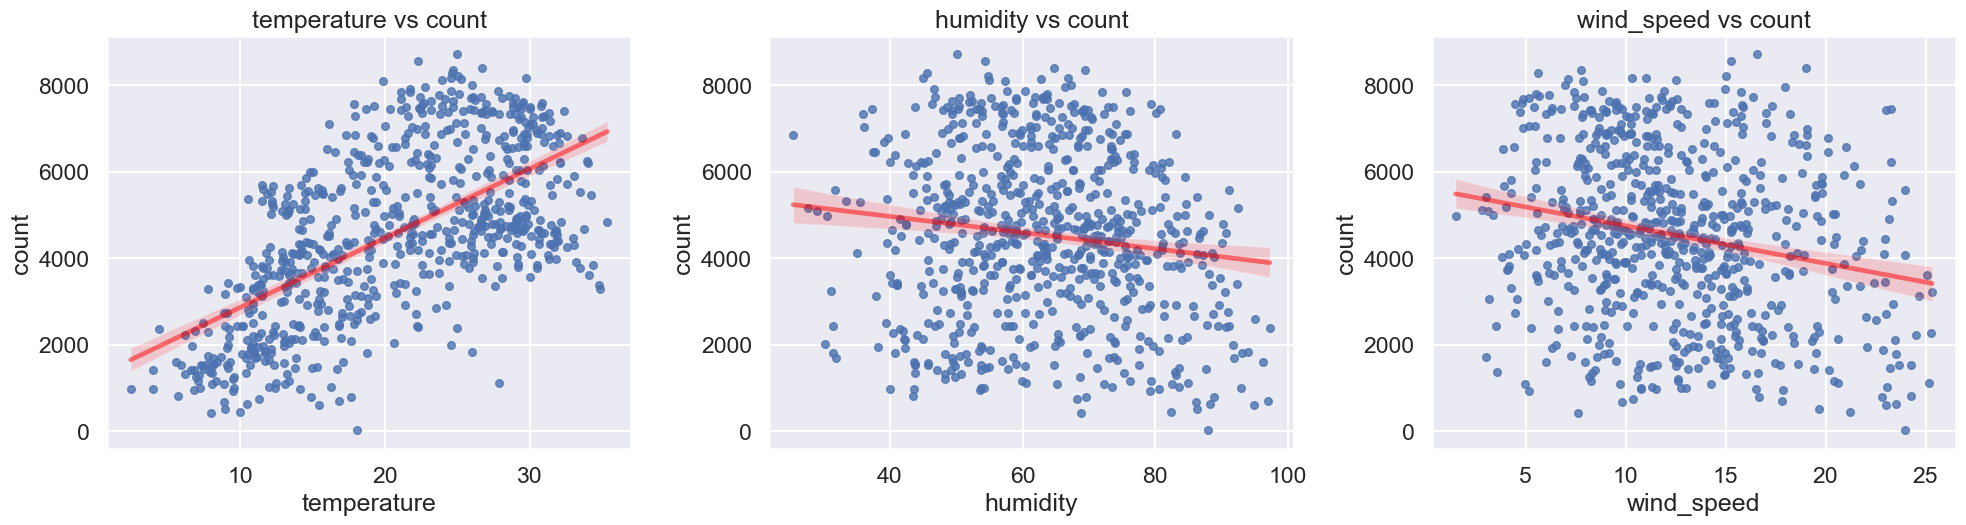

In [46]:
# Create a figure and axes
plt.figure(figsize=(20, 10))

# Create a regplot for each numerical column
y_col = 'count'
for i, x_col in enumerate(num_cols):
    if x_col is not 'count':
        plt.subplot(2, 3, i + 1)
        sns.regplot(x=x_col, y=y_col, data=bike_sharing, scatter_kws={'s':30}, line_kws={'color':'red', 'alpha':0.5})
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.title(f'{x_col} vs {y_col}')

# Adjust layout to fit all subplots
plt.tight_layout()
plt.show()

### TARGET VS CATEGORICAL FEATURES

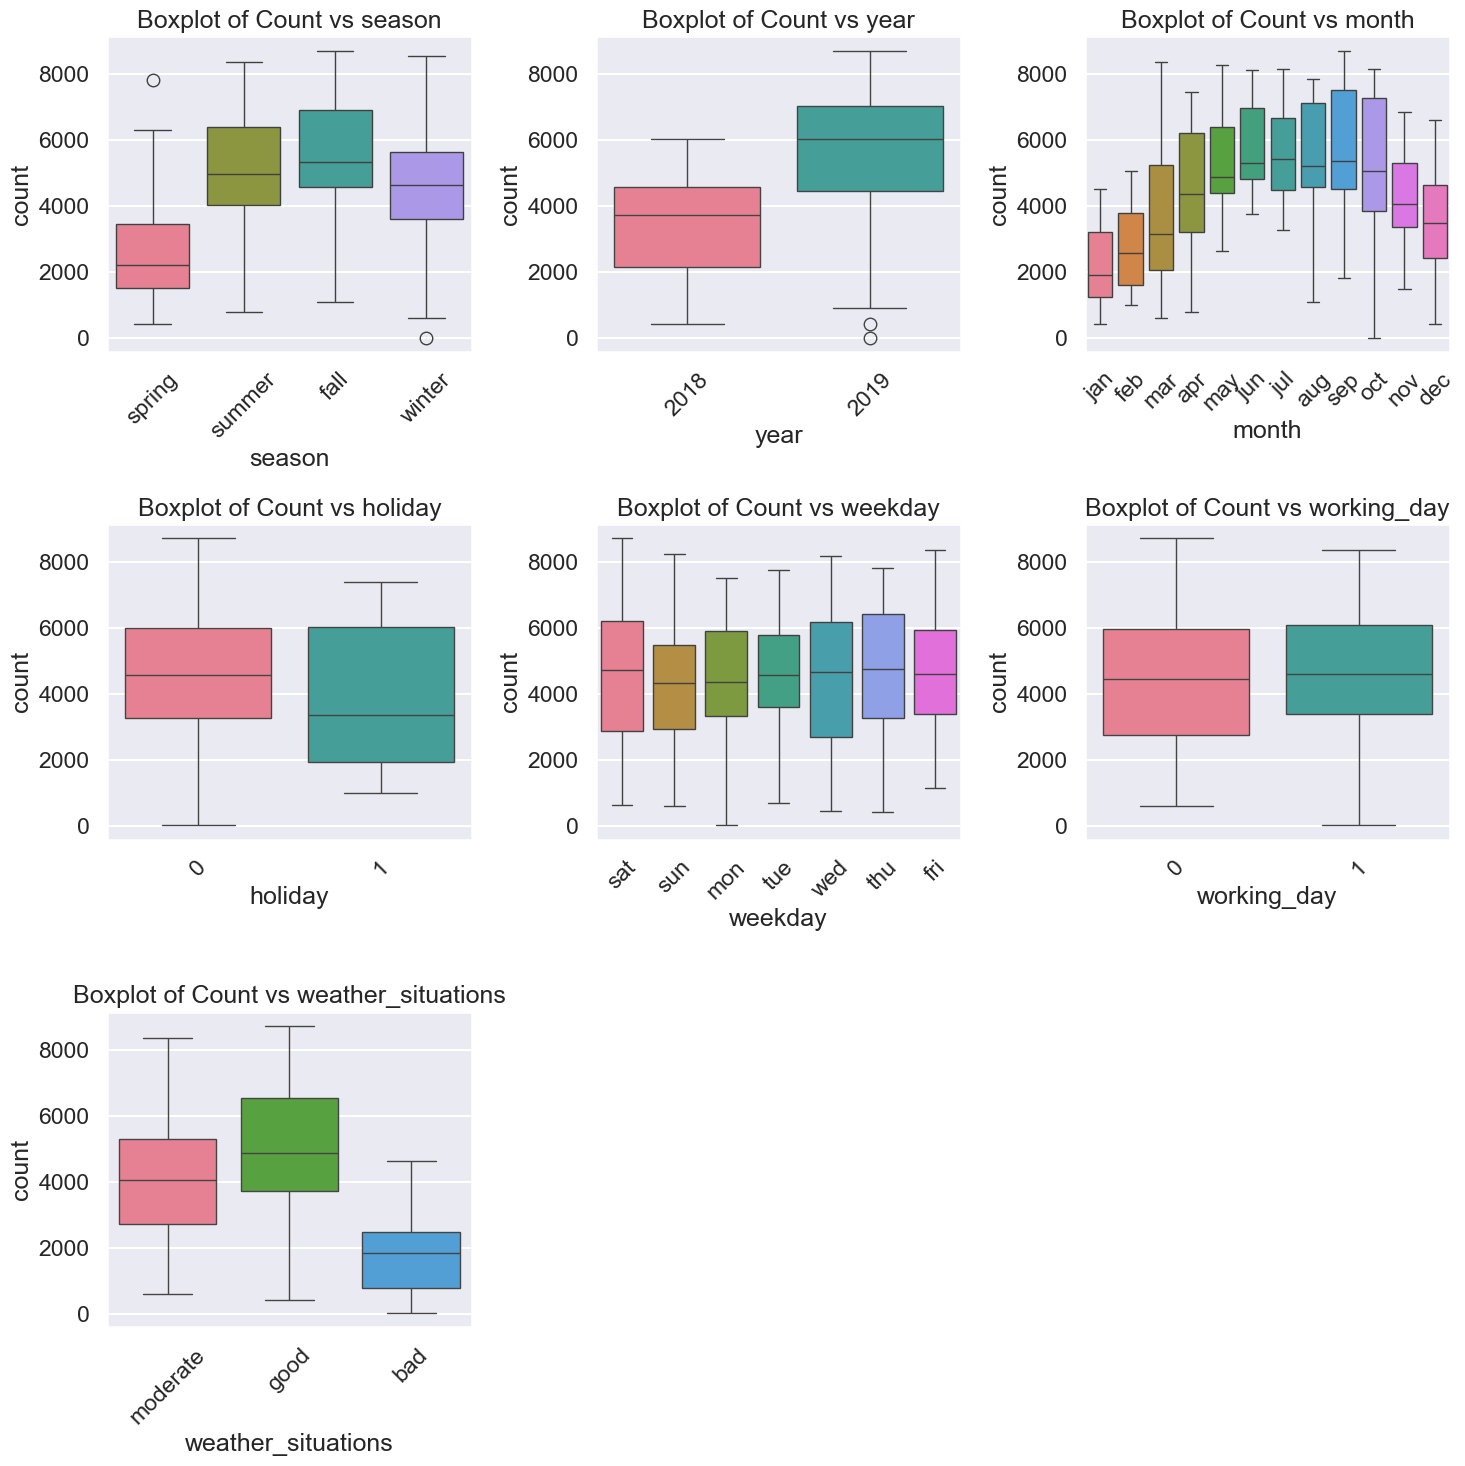

In [47]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 15))

# Create a boxplot for each categorical column
for i, column in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)  
    sns.boxplot(x=column, y='count', data=bike_sharing, palette='husl')
    plt.title(f'Boxplot of Count vs {column}')
    plt.xticks(rotation=45, ha='center')

# Adjust layout to fit all subplots
plt.tight_layout()
plt.show()

#### OBSERVATIONS

1. Demand for bike rentals is highest in the **Fall Season**.
2. There is **Year-on-Year Increase** in demand between 2018 and 2019.
3. Demand is highest in the Dry months of **June-October**.
4. Though demand is low on Holidays, the boxplot shows high variability in distribution.
5. **Good Weather Situations** contribute to Higher demands.
6. Demand is variable by weekdays, working days and hence shows no interesting trends.

# **<a id='feature-engineering'>4. FEATURE ENGINEERING<a/>**  [▲](#top)

## **<a id='feature-encoding'>A. FEATURE ENCODING<a/>**  [▲](#top)

In [48]:
bike_sharing.head()

season  year month  holiday weekday  working_day weather_situations  \
0  spring  2018   jan        0     sat            0           moderate   
1  spring  2018   jan        0     sun            0           moderate   
2  spring  2018   jan        0     mon            1               good   
3  spring  2018   jan        0     tue            1               good   
4  spring  2018   jan        0     wed            1               good   

   temperature  humidity  wind_speed  count  
0    14.110847   80.5833   10.749882    985  
1    14.902598   69.6087   16.652113    801  
2     8.050924   43.7273   16.636703   1349  
3     8.200000   59.0435   10.739832   1562  
4     9.305237   43.6957   12.522300   1600

In [49]:
# The following code performs 3 things:
# 1) Creates Dummy variables
# 2) Drops the original variable for which the dummies were created
# 3) Drops the first dummy variable for each set of dummies created

bike_sharing = pd.get_dummies(data=bike_sharing, 
                              columns=['season', 'year','month'], 
                              drop_first=True,
                              dtype=int)

# Different approach for `weather_situations`, `weekday`
# All the three dummies created from `weather_situations` were significantly correlated to each other.
# Hence we remove the variables later on.
bike_sharing = pd.get_dummies(data=bike_sharing, 
                              columns=['weather_situations', 'weekday'],
                              dtype=int)
bike_sharing.head()

holiday  working_day  temperature  humidity  wind_speed  count  \
0        0            0    14.110847   80.5833   10.749882    985   
1        0            0    14.902598   69.6087   16.652113    801   
2        0            1     8.050924   43.7273   16.636703   1349   
3        0            1     8.200000   59.0435   10.739832   1562   
4        0            1     9.305237   43.6957   12.522300   1600   

   season_spring  season_summer  season_winter  year_2019  month_aug  \
0              1              0              0          0          0   
1              1              0              0          0          0   
2              1              0              0          0          0   
3              1              0              0          0          0   
4              1              0              0          0          0   

   month_dec  month_feb  month_jan  month_jul  month_jun  month_mar  \
0          0          0          1          0          0          0   
1          0          0          1          0          0          0   
2          0          0          1          0          0          0   
3          0          0          1          0          0          0   
4          0          0          1          0          0          0   

   month_may  month_nov  month_oct  month_sep  weather_situations_bad  \
0          0          0          0          0                       0   
1          0          0          0          0                       0   
2          0          0          0          0                       0   
3          0          0          0          0                       0   
4          0          0          0          0                       0   

   weather_situations_good  weather_situations_moderate  weekday_fri  \
0                        0                            1            0   
1                        0                            1            0   
2                        1                            0            0   
3                        1                            0            0   
4                        1                            0            0   

   weekday_mon  weekday_sat  weekday_sun  weekday_thu  weekday_tue  \
0            0            1            0            0            0   
1            0            0            1            0            0   
2            1            0            0            0            0   
3            0            0            0            0            1   
4            0            0            0            0            0   

   weekday_wed  
0            0  
1            0  
2            0  
3            0  
4            1

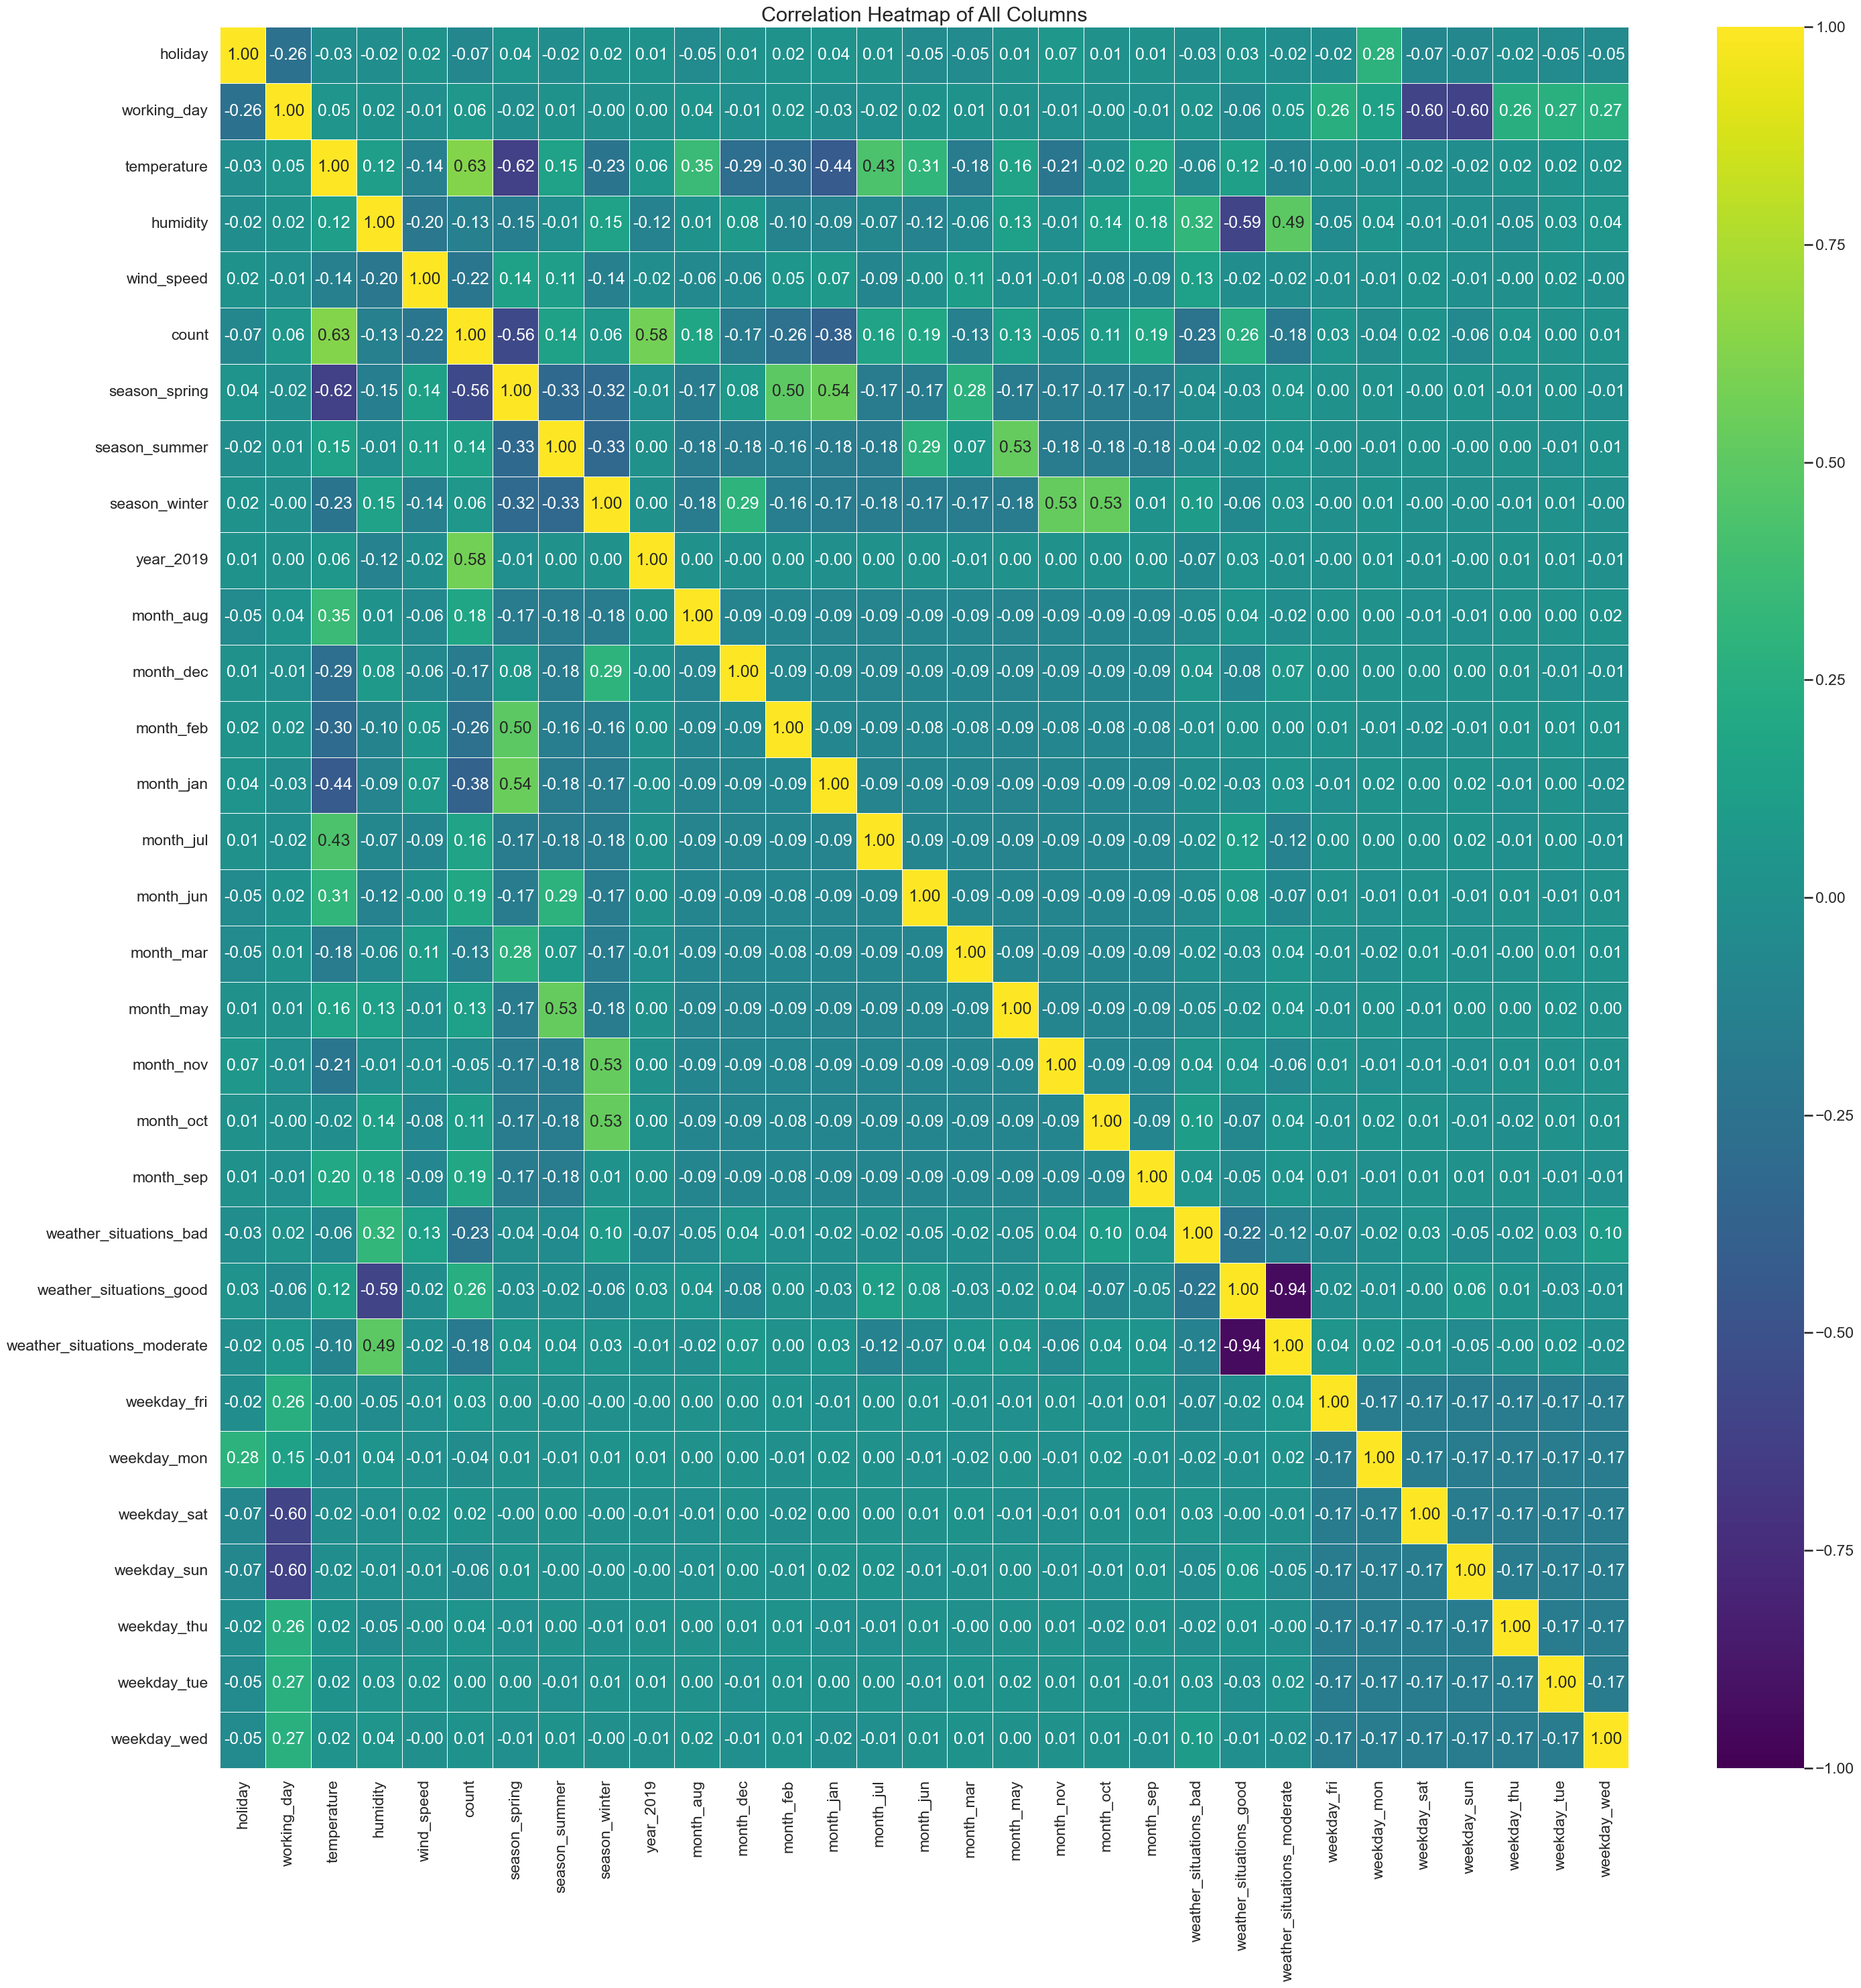

In [50]:
# Compute correlation matrix
corr_matrix = bike_sharing.corr()

# Set up the matplotlib figure
plt.figure(figsize=(30, 30))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis', vmin=-1, vmax=1, linewidths=0.5)

# Add titles and labels
plt.title('Correlation Heatmap of All Columns', fontsize=22)
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

***Correlation Criteria:***

- |r| < 0.1: Weak correlation; the relationship between the variables is minimal.
- 0.1 ≤ |r| < 0.3: Moderate correlation; some relationship exists, but it's not very strong.
- 0.3 ≤ |r| < 0.5: Strong correlation; there is a notable relationship between the variables.
- |r| ≥ 0.5: Very strong correlation; the variables are highly related.

#### OBSERVATIONS

1. **Count Variable:** Very Strong positive correlations with `temperature` and `year_2019`. Very Strong negative correlation with `season_spring`. 
2. **Season Spring and Temperature:** `season_spring` and `temperature` have a very strong negative correlation. Calculate VIF to check if including `season_spring` introduces multicollinearity with `temperature`.
3. **Weather Situations Dummies:** `weather_situations_moderate` has very strong negative correlation to `weather_situations_good`. Moreover, it is logically expected that `weather_situations_moderate` will be correlated to the other two, we need to drop it.
4. **Weather Situations and Humidity:** `humidity` has strong positive correlation with `weather_situations_moderate` and Moderate positive correlation exists between  and .
5. **Weekdays, Working Days and Holidays:** `working_day` has strong negative correlation to `weekday_sat` and `weekday_sun`, and moderate correlations to other weekdays and holidays.

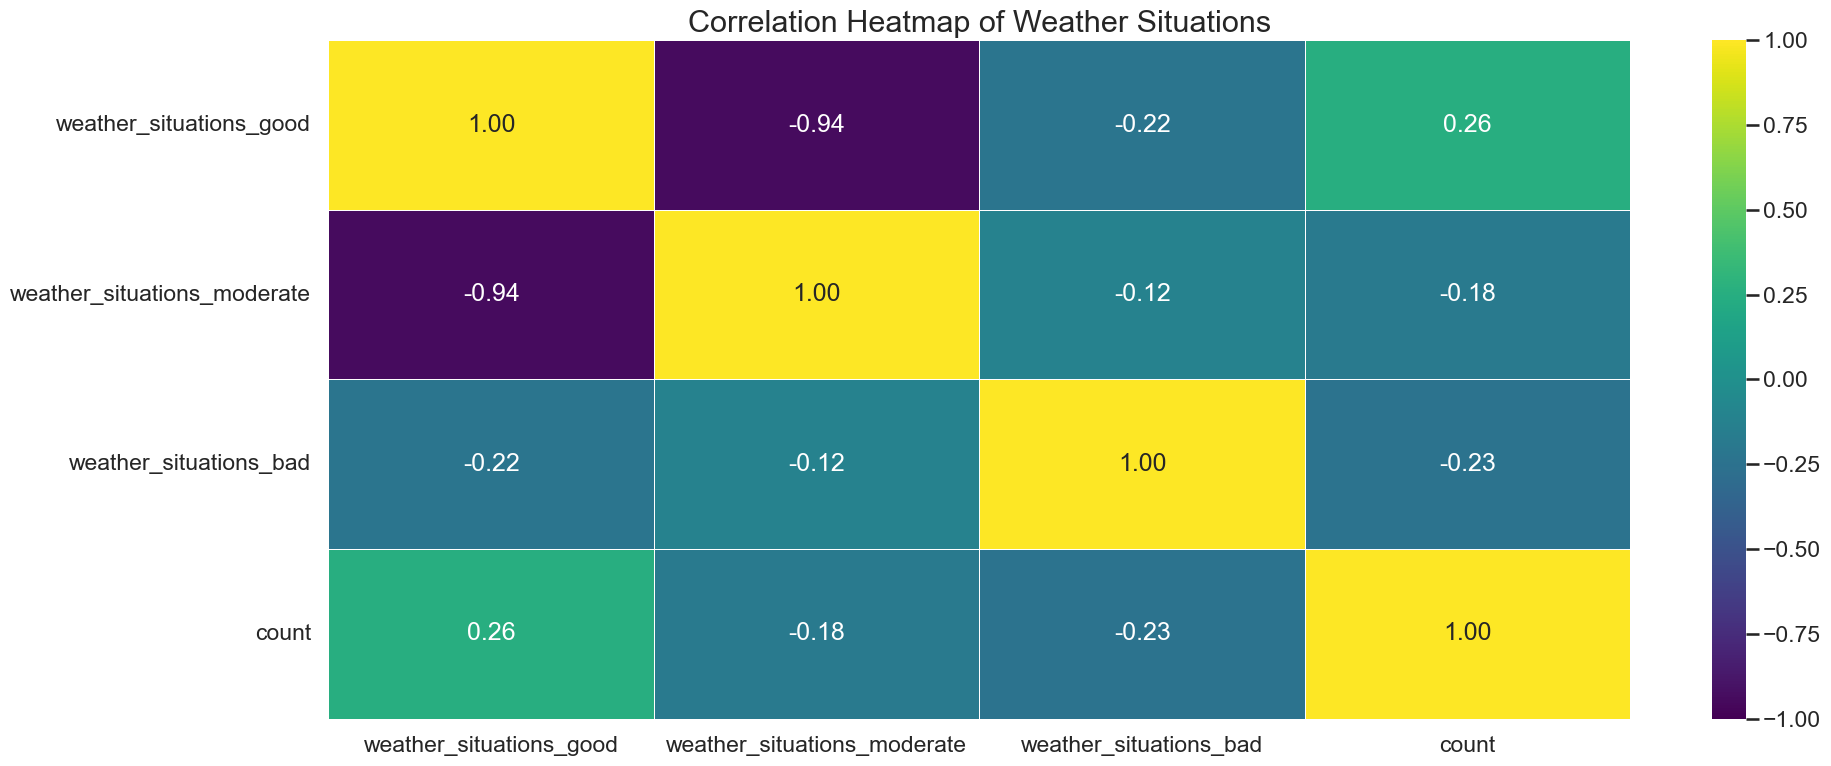

In [51]:
# Compute correlation matrix
corr_matrix = bike_sharing[['weather_situations_good', 'weather_situations_moderate', 'weather_situations_bad', 'count']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis', vmin=-1, vmax=1, linewidths=0.5)

# Add titles and labels
plt.title('Correlation Heatmap of Weather Situations', fontsize=22)
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

In [52]:
# Dropping `weather_situations_moderate` since `count` has least correlation with this.
bike_sharing.drop('weather_situations_moderate', axis=1, inplace=True)

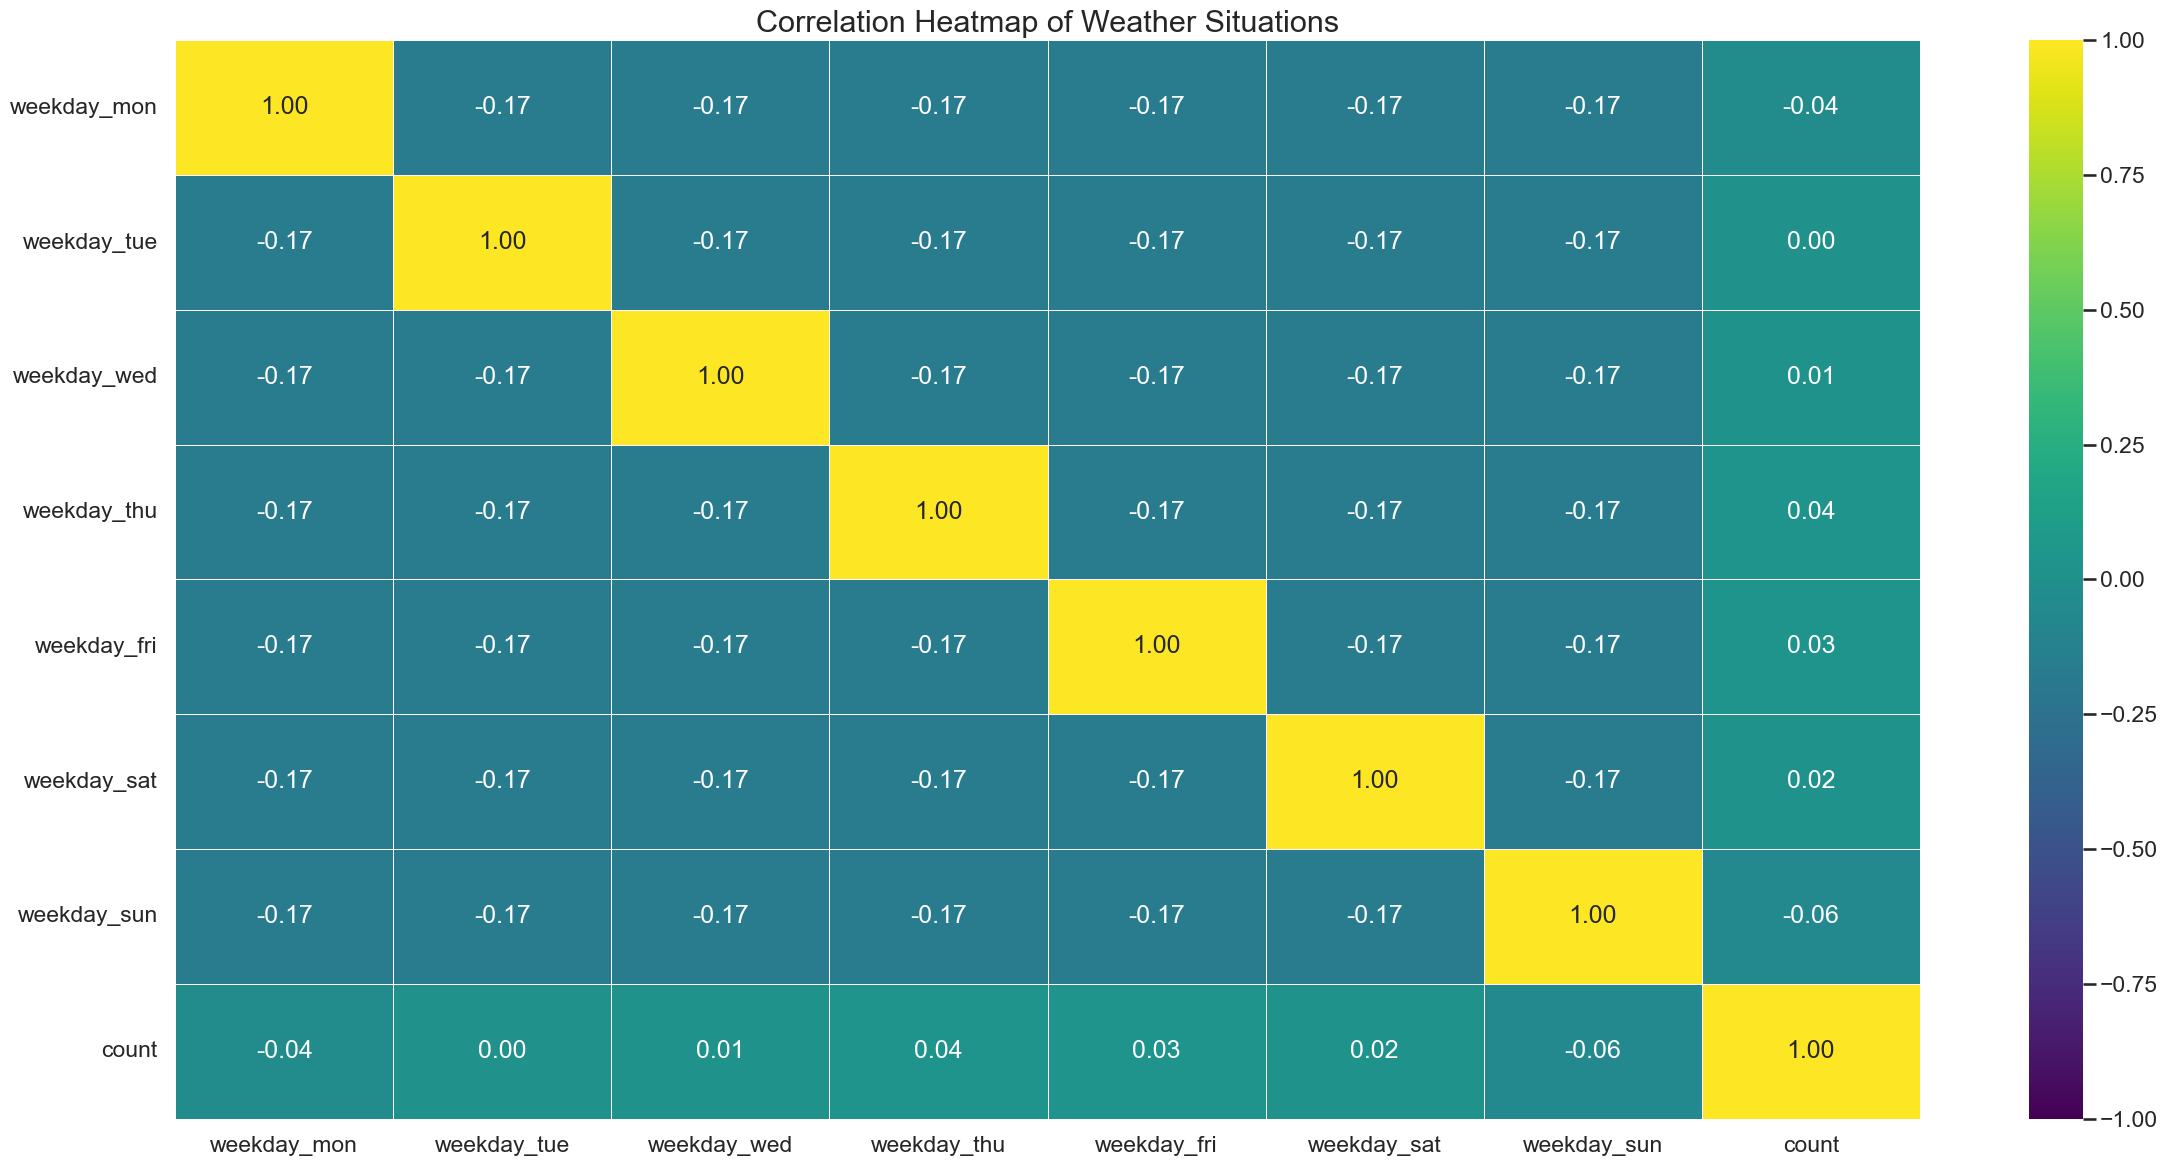

In [53]:
# Compute correlation matrix
corr_matrix = bike_sharing[['weekday_mon', 'weekday_tue', 'weekday_wed', 'weekday_thu', 
                            'weekday_fri', 'weekday_sat', 'weekday_sun', 'count']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(24, 12))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis', vmin=-1, vmax=1, linewidths=0.5)

# Add titles and labels
plt.title('Correlation Heatmap of Weather Situations', fontsize=22)
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

In [54]:
# Dropping `weekday_tue` since `count` has least correlation with this.
bike_sharing.drop(['weekday_tue'], axis=1, inplace=True)

##  **<a id='feature-scaling'>B. FEATURE SCALING<a/>**  [▲](#top)

### TRAIN – TEST SPLIT

In [55]:
boom_bikes=bike_sharing.copy()

#Train Test split with 70:30 ratio
df_train, df_test = train_test_split(boom_bikes, train_size=0.7, random_state=100)

df_train.shape, df_test.shape

((501, 29), (215, 29))

### SCALE NUMERICAL FEATURES

#### Concept applied:

- **`fit():`** Computes parameters (e.g., mean, variance) from the data. You use `fit()` when you want to learn the parameters of the scaler or transformer based on the training data.
- **`transform():`** Applies the computed parameters to scale or transform data. You use `transform()` when you want to apply the learned scaling or transformation to new data, typically the test set.
- **`fit_transform():`** Combines fitting and transforming in one step for convenience. You use `fit_transform()` on the training data to simultaneously learn the parameters and transform the data. This is useful for preprocessing training data.

In [56]:
# Check data before scaling
df_train.head()

holiday  working_day  temperature  humidity  wind_speed  count  \
728        0            0    10.489153   48.3333   23.500518   1796   
541        0            1    25.864153   37.3333   23.292014   7442   
116        0            1    25.420000   83.5417   20.917400   3872   
718        0            1    13.530000   66.7917    8.875021   4128   
496        0            0    23.130847   48.0417    8.249911   7429   

     season_spring  season_summer  season_winter  year_2019  month_aug  \
728              1              0              0          1          0   
541              0              0              0          1          0   
116              0              1              0          0          0   
718              0              0              1          1          0   
496              0              1              0          1          0   

     month_dec  month_feb  month_jan  month_jul  month_jun  month_mar  \
728          1          0          0          0          0          0   
541          0          0          0          0          1          0   
116          0          0          0          0          0          0   
718          1          0          0          0          0          0   
496          0          0          0          0          0          0   

     month_may  month_nov  month_oct  month_sep  weather_situations_bad  \
728          0          0          0          0                       0   
541          0          0          0          0                       0   
116          0          0          0          0                       0   
718          0          0          0          0                       0   
496          1          0          0          0                       0   

     weather_situations_good  weekday_fri  weekday_mon  weekday_sat  \
728                        1            0            0            0   
541                        1            0            0            0   
116                        0            0            0            0   
718                        0            0            0            0   
496                        1            0            0            1   

     weekday_sun  weekday_thu  weekday_wed  
728            1            0            0  
541            0            0            0  
116            0            0            1  
718            0            1            0  
496            0            0            0

In [57]:
scaler = MinMaxScaler()

# Fit and Transform the Training Set
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

# Check data after scaling
df_train.head()

holiday  working_day  temperature  humidity  wind_speed     count  \
728        0            0     0.252441  0.293114    0.923102  0.204096   
541        0            1     0.733702  0.126342    0.914353  0.853659   
116        0            1     0.719799  0.826912    0.814718  0.442936   
718        0            1     0.347624  0.572964    0.309436  0.472388   
496        0            0     0.648145  0.288693    0.283207  0.852163   

     season_spring  season_summer  season_winter  year_2019  month_aug  \
728              1              0              0          1          0   
541              0              0              0          1          0   
116              0              1              0          0          0   
718              0              0              1          1          0   
496              0              1              0          1          0   

     month_dec  month_feb  month_jan  month_jul  month_jun  month_mar  \
728          1          0          0          0          0          0   
541          0          0          0          0          1          0   
116          0          0          0          0          0          0   
718          1          0          0          0          0          0   
496          0          0          0          0          0          0   

     month_may  month_nov  month_oct  month_sep  weather_situations_bad  \
728          0          0          0          0                       0   
541          0          0          0          0                       0   
116          0          0          0          0                       0   
718          0          0          0          0                       0   
496          1          0          0          0                       0   

     weather_situations_good  weekday_fri  weekday_mon  weekday_sat  \
728                        1            0            0            0   
541                        1            0            0            0   
116                        0            0            0            0   
718                        0            0            0            0   
496                        1            0            0            1   

     weekday_sun  weekday_thu  weekday_wed  
728            1            0            0  
541            0            0            0  
116            0            0            1  
718            0            1            0  
496            0            0            0

### DIVIDE INTO FEATURES AND TARGET VARIABLES

In [58]:
# Separate features and target in the training set
X_train = df_train.drop('count', axis=1)
y_train = df_train['count']

X_train.shape, y_train.shape

((501, 28), (501,))

## **<a id='feature-selection'>C. FEATURE SELECTION<a/>**  [▲](#top)

### AUTOMATED FEATURE ELIMINATION (Using RFE)

***Recursive Feature Elimination (RFE)*** is a feature selection technique that iteratively removes the least important features to improve model performance. It works by training the model, ranking features based on their importance, and eliminating those with the lowest rankings until a specified number of features remains. RFE helps reduce model complexity, prevent overfitting, and enhance interpretability by focusing on the most relevant predictors.

In [59]:
def perform_rfe(lr_model, X, y, n_features_to_select):
    """
    Perform Recursive Feature Elimination (RFE) with the provided linear regression model.

    Parameters:
    lr_model (object): The linear regression model to use with RFE. Should be an instance of sklearn's LinearRegression or similar.
    X (pd.DataFrame): DataFrame containing the feature set.
    y (pd.Series): Series containing the target variable.
    n_features_to_select (int): Number of features to select.

    Returns:
    pd.DataFrame: DataFrame with feature rankings and selection status.
    """
    # Initialize the RFE model
    rfe = RFE(estimator=lr_model, n_features_to_select=n_features_to_select)
    
    # Fit RFE
    rfe = rfe.fit(X, y)
    
    # Get the ranking of features
    ranking = rfe.ranking_
    
    # Get the selected features
    selected_features = X.columns[rfe.support_]
    
    # Create a DataFrame to display the ranking and selection status
    feature_df = pd.DataFrame({
        'Feature': X.columns,
        'Ranking': ranking,
        'Selected': ['Yes' if selected else 'No' for selected in rfe.support_]
    })
    
    return feature_df.sort_values(by='Ranking')

### MANUAL FEATURE ELIMINATION (Using p–value and VIF)

***P-Value*** assesses the statistical significance of each feature in the model. A low p-value indicates that the feature is statistically significant in explaining the variability of the target variable.

**Common Criteria:**

- **`p-value < 0.01`**: Strong evidence against the null hypothesis; feature is highly significant.
- **`0.01 ≤ p-value < 0.05`**: Moderate evidence against the null hypothesis; feature is statistically significant.
- **`0.05 ≤ p-value < 0.10`**: Weak evidence against the null hypothesis; feature may be considered marginally significant.
- **`p-value ≥ 0.10`**: Weak evidence against the null hypothesis; feature is typically considered not significant and may be excluded.

---

***Variance Inflation Factor (VIF)*** measures how much the variance of an estimated regression coefficient increases due to multicollinearity. High VIF values indicate a high degree of multicollinearity.

**Common Criteria:**

1. **`VIF < 5`**: Generally considered acceptable; indicates low multicollinearity.
2. **`5 ≤ VIF < 10`**: Indicates moderate multicollinearity; may require attention or further investigation.
3. **`VIF ≥ 10`**: High multicollinearity; usually suggests that the feature should be considered for removal or further analysis.

---

### Analysis of P-Value and VIF Combinations

1. **High p-value, High VIF** (BAD FEATURES): The feature is not statistically significant and suffers from high multicollinearity. This combination suggests that the feature is not a useful predictor and is influenced by other features. It becomes a candidate for removal from the model due to both lack of significance and problematic multicollinearity.

2. **High p-value, Low VIF**(LOW PRIORITY FEATURES): The feature is not statistically significant but does not suffer from multicollinearity. This combination indicates that while the feature does not contribute significantly to explaining the target variable, it is not affected by multicollinearity. It might be worth considering for removal due to its lack of significance, but multicollinearity is not a concern.

3. **Low p-value, High VIF**(MODERATE PRIORITY FEATURES): The feature is statistically significant but has high multicollinearity. This combination suggests that while the feature is important in explaining the target variable, it is highly correlated with other features, which could inflate its coefficient estimates. It may be useful to retain the feature but consider techniques to address multicollinearity, such as removing correlated features or applying dimensionality reduction techniques.

4. **Low p-value, Low VIF** (GOOD FEATURES): The feature is statistically significant and does not suffer from multicollinearity. This is an ideal scenario where the feature is both a strong predictor and well-behaved in terms of collinearity. Features in this category are generally retained in the model as they provide valuable and reliable information.


In [60]:
def calculate_pvalues_and_vif(X, lr_model):
    """
    Calculate and return a DataFrame with Variance Inflation Factor (VIF) and p-values for each feature in the DataFrame.
    
    Parameters:
    X (pd.DataFrame): DataFrame containing the feature set.
    lr_model (statsmodels.regression.linear_model.OLS): Fitted linear regression model.
    
    Returns:
    pd.DataFrame: DataFrame with features, their corresponding VIF values, and p-values, sorted by VIF and p-value.
    """
    # Add a constant to the model (intercept)
    X_with_const = sm.add_constant(X)
    
    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X_with_const.columns
    vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
    
    # Get p-values of the features
    p_values = round(lr_model.pvalues, 4)
    
    # Create a DataFrame to display the p-values
    p_value_df = pd.DataFrame({
        'Feature': X_with_const.columns,
        'P-Value': p_values
    })
    
    # Merge the VIF and p-value DataFrames
    merged_df = pd.merge(vif_data, p_value_df, on='Feature')
    
    # Sort the DataFrame by VIF (descending) and p-value (ascending)
    feature_df = merged_df.sort_values(by=['P-Value', 'VIF'], ascending=[False, False])
    
    return feature_df

# **<a id='model-building'>5. MODEL BUILDING<a/>**  [▲](#top)

### FUNCTION TO BUILD A LINEAR REGRESSION MODEL

In [61]:
def build_lr_model(X, y, method='statsmodels'):
    """
    Build and fit a linear regression model using the specified method.

    Parameters:
    X (pd.DataFrame): DataFrame containing the feature set.
    y (pd.Series): Series containing the target variable.
    method (str): The method to use for building the model. Options are:
                  - 'statsmodels': Uses statsmodels OLS to fit the model.
                  - 'sklearn': Uses sklearn's LinearRegression to fit the model.

    Returns:
    model: The fitted model object. The type of object returned depends on the method used:
           - If 'statsmodels', returns a sm.OLS object.
           - If 'sklearn', returns a sklearn.linear_model.LinearRegression object.
    """
    if method == 'sklearn':
        lr_model = LinearRegression()
        lr_model.fit(X, y)
        # Print summary statistics for sklearn model
        print('Linear Regression Model (sklearn):')
        print(f'Intercept: {lr_model.intercept_}')
        # Create a DataFrame for feature names and coefficients
        coef_df = pd.DataFrame({
            'Feature': X.columns,
            'Coefficient': lr_model.coef_
        })
        print(coef_df)
    elif method == 'statsmodels':
        # Add a constant to the model (intercept)
        X_with_const = sm.add_constant(X)
        # Fit the model using statsmodels OLS
        lr_model = sm.OLS(y, X_with_const).fit()
        # Print the summary statistics for statsmodels model
        print('Linear Regression Model (statsmodels):')
        print(lr_model.summary())
    else:
        raise ValueError('Invalid method specified. Use \'statsmodels\' or \'sklearn\'.')
    
    return lr_model

In [62]:
# Dictionary for all fitted models
models = {}

# np.of predictors
no_of_predictors = {}

# linear regressions features
lr_features = {}
lr_features['lr_model_1'] = selected_features = X_train.columns

In [63]:
def evaluate_model_performance(lr_model, X, y, lr_features):
    """
    Evaluates the performance of a linear regression model using various metrics.

    Parameters:
    lr_model: The trained linear regression model.
    X: The feature set.
    y: The actual target values.
    lr_features: The list of features.

    Returns:
    dict: A dictionary containing various performance metrics.
    """

    # Predict the values for the data using the final model
    y_pred = lr_model.predict(X[lr_features])

    # Calculate residuals
    residuals = y - y_pred

    # Calculate performance metrics
    mae = metrics.mean_absolute_error(y, y_pred)
    mse = metrics.mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y, y_pred)
    explained_variance = metrics.explained_variance_score(y, y_pred)
    median_ae = metrics.median_absolute_error(y, y_pred)
    mape = metrics.mean_absolute_percentage_error(y, y_pred)

    # Calculate Adjusted R-squared
    n = len(y)  # Number of observations
    p = X.shape[1]  # Number of predictors (features)
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    # Residual Analysis metrics
    mean_residuals = np.mean(residuals)
    std_residuals = np.std(residuals)

    # Predictive summary
    predictive_summary = {
        'Mean of Residuals': mean_residuals,
        'Standard Deviation of Residuals': std_residuals,
        'Mean Absolute Error (MAE)': mae,
        'Mean Squared Error (MSE)': mse,
        'Root Mean Squared Error (RMSE)': rmse,
        'Mean Absolute Percentage Error (MAPE)': mape,
        'R^2 Score': r2,
        'Adjusted R^2': adj_r2,
        'Explained Variance Score': explained_variance,
        'Median Absolute Error': median_ae
    }

    # Print predictive summary
    for metric, value in predictive_summary.items():
        print(f'{metric}: {value:.4f}')

    return predictive_summary

## **<a id='model-1'>MODEL 1<a/>**  [▲](#top)

In Model 1, we used all the features and performed the Manual Feature Elimination method to eliminate the features.

In [64]:
# Select the required features
X_train_enhanced = X_train[selected_features]
no_of_predictors['lr_model_1'] = len(selected_features)

# Build another linear regression model
models['lr_model_1'] = lr_model_1 = build_lr_model(X_train_enhanced, y_train)
feature_df = calculate_pvalues_and_vif(X_train_enhanced, lr_model_1)
feature_df

Linear Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     108.7
Date:                Sun, 18 Aug 2024   Prob (F-statistic):          8.61e-184
Time:                        12:55:38   Log-Likelihood:                 528.87
No. Observations:                 501   AIC:                            -1002.
Df Residuals:                     473   BIC:                            -883.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

Feature        VIF  P-Value
1                   holiday        inf   0.9824
10                month_aug   6.234004   0.8344
15                month_jun   2.970786   0.7746
7             season_summer   8.296988   0.7287
16                month_mar   3.155911   0.6375
19                month_oct   5.907266   0.6107
27              weekday_thu   1.838518   0.5877
28              weekday_wed   1.823241   0.4040
24              weekday_mon   2.031289   0.3248
12                month_feb   4.438640   0.3182
14                month_jul   6.624984   0.2945
23              weekday_fri   1.857429   0.2410
17                month_may   2.403330   0.1888
11                month_dec   5.812239   0.0457
20                month_sep   5.336898   0.0405
13                month_jan   6.099402   0.0388
18                month_nov   6.835622   0.0151
6             season_spring  10.520144   0.0134
26              weekday_sun        inf   0.0105
2               working_day        inf   0.0000
25              weekday_sat        inf   0.0000
8             season_winter   8.694446   0.0000
3               temperature   7.561200   0.0000
4                  humidity   2.269373   0.0000
22  weather_situations_good   1.737463   0.0000
5                wind_speed   1.235196   0.0000
21   weather_situations_bad   1.217516   0.0000
9                 year_2019   1.074277   0.0000
0                     const   0.000000   0.0000

In [65]:
# High VIF and High P-Value = Bad Features
feature_df[(feature_df['VIF'] > 5) & (feature_df['P-Value'] > 0.05)]

Feature       VIF  P-Value
1         holiday       inf   0.9824
10      month_aug  6.234004   0.8344
7   season_summer  8.296988   0.7287
19      month_oct  5.907266   0.6107
14      month_jul  6.624984   0.2945

In [66]:
# High VIF and High P-Value = less Significant Features
feature_df[(feature_df['VIF'] > 5) | (feature_df['P-Value'] > 0.05)]

Feature        VIF  P-Value
1         holiday        inf   0.9824
10      month_aug   6.234004   0.8344
15      month_jun   2.970786   0.7746
7   season_summer   8.296988   0.7287
16      month_mar   3.155911   0.6375
19      month_oct   5.907266   0.6107
27    weekday_thu   1.838518   0.5877
28    weekday_wed   1.823241   0.4040
24    weekday_mon   2.031289   0.3248
12      month_feb   4.438640   0.3182
14      month_jul   6.624984   0.2945
23    weekday_fri   1.857429   0.2410
17      month_may   2.403330   0.1888
11      month_dec   5.812239   0.0457
20      month_sep   5.336898   0.0405
13      month_jan   6.099402   0.0388
18      month_nov   6.835622   0.0151
6   season_spring  10.520144   0.0134
26    weekday_sun        inf   0.0105
2     working_day        inf   0.0000
25    weekday_sat        inf   0.0000
8   season_winter   8.694446   0.0000
3     temperature   7.561200   0.0000

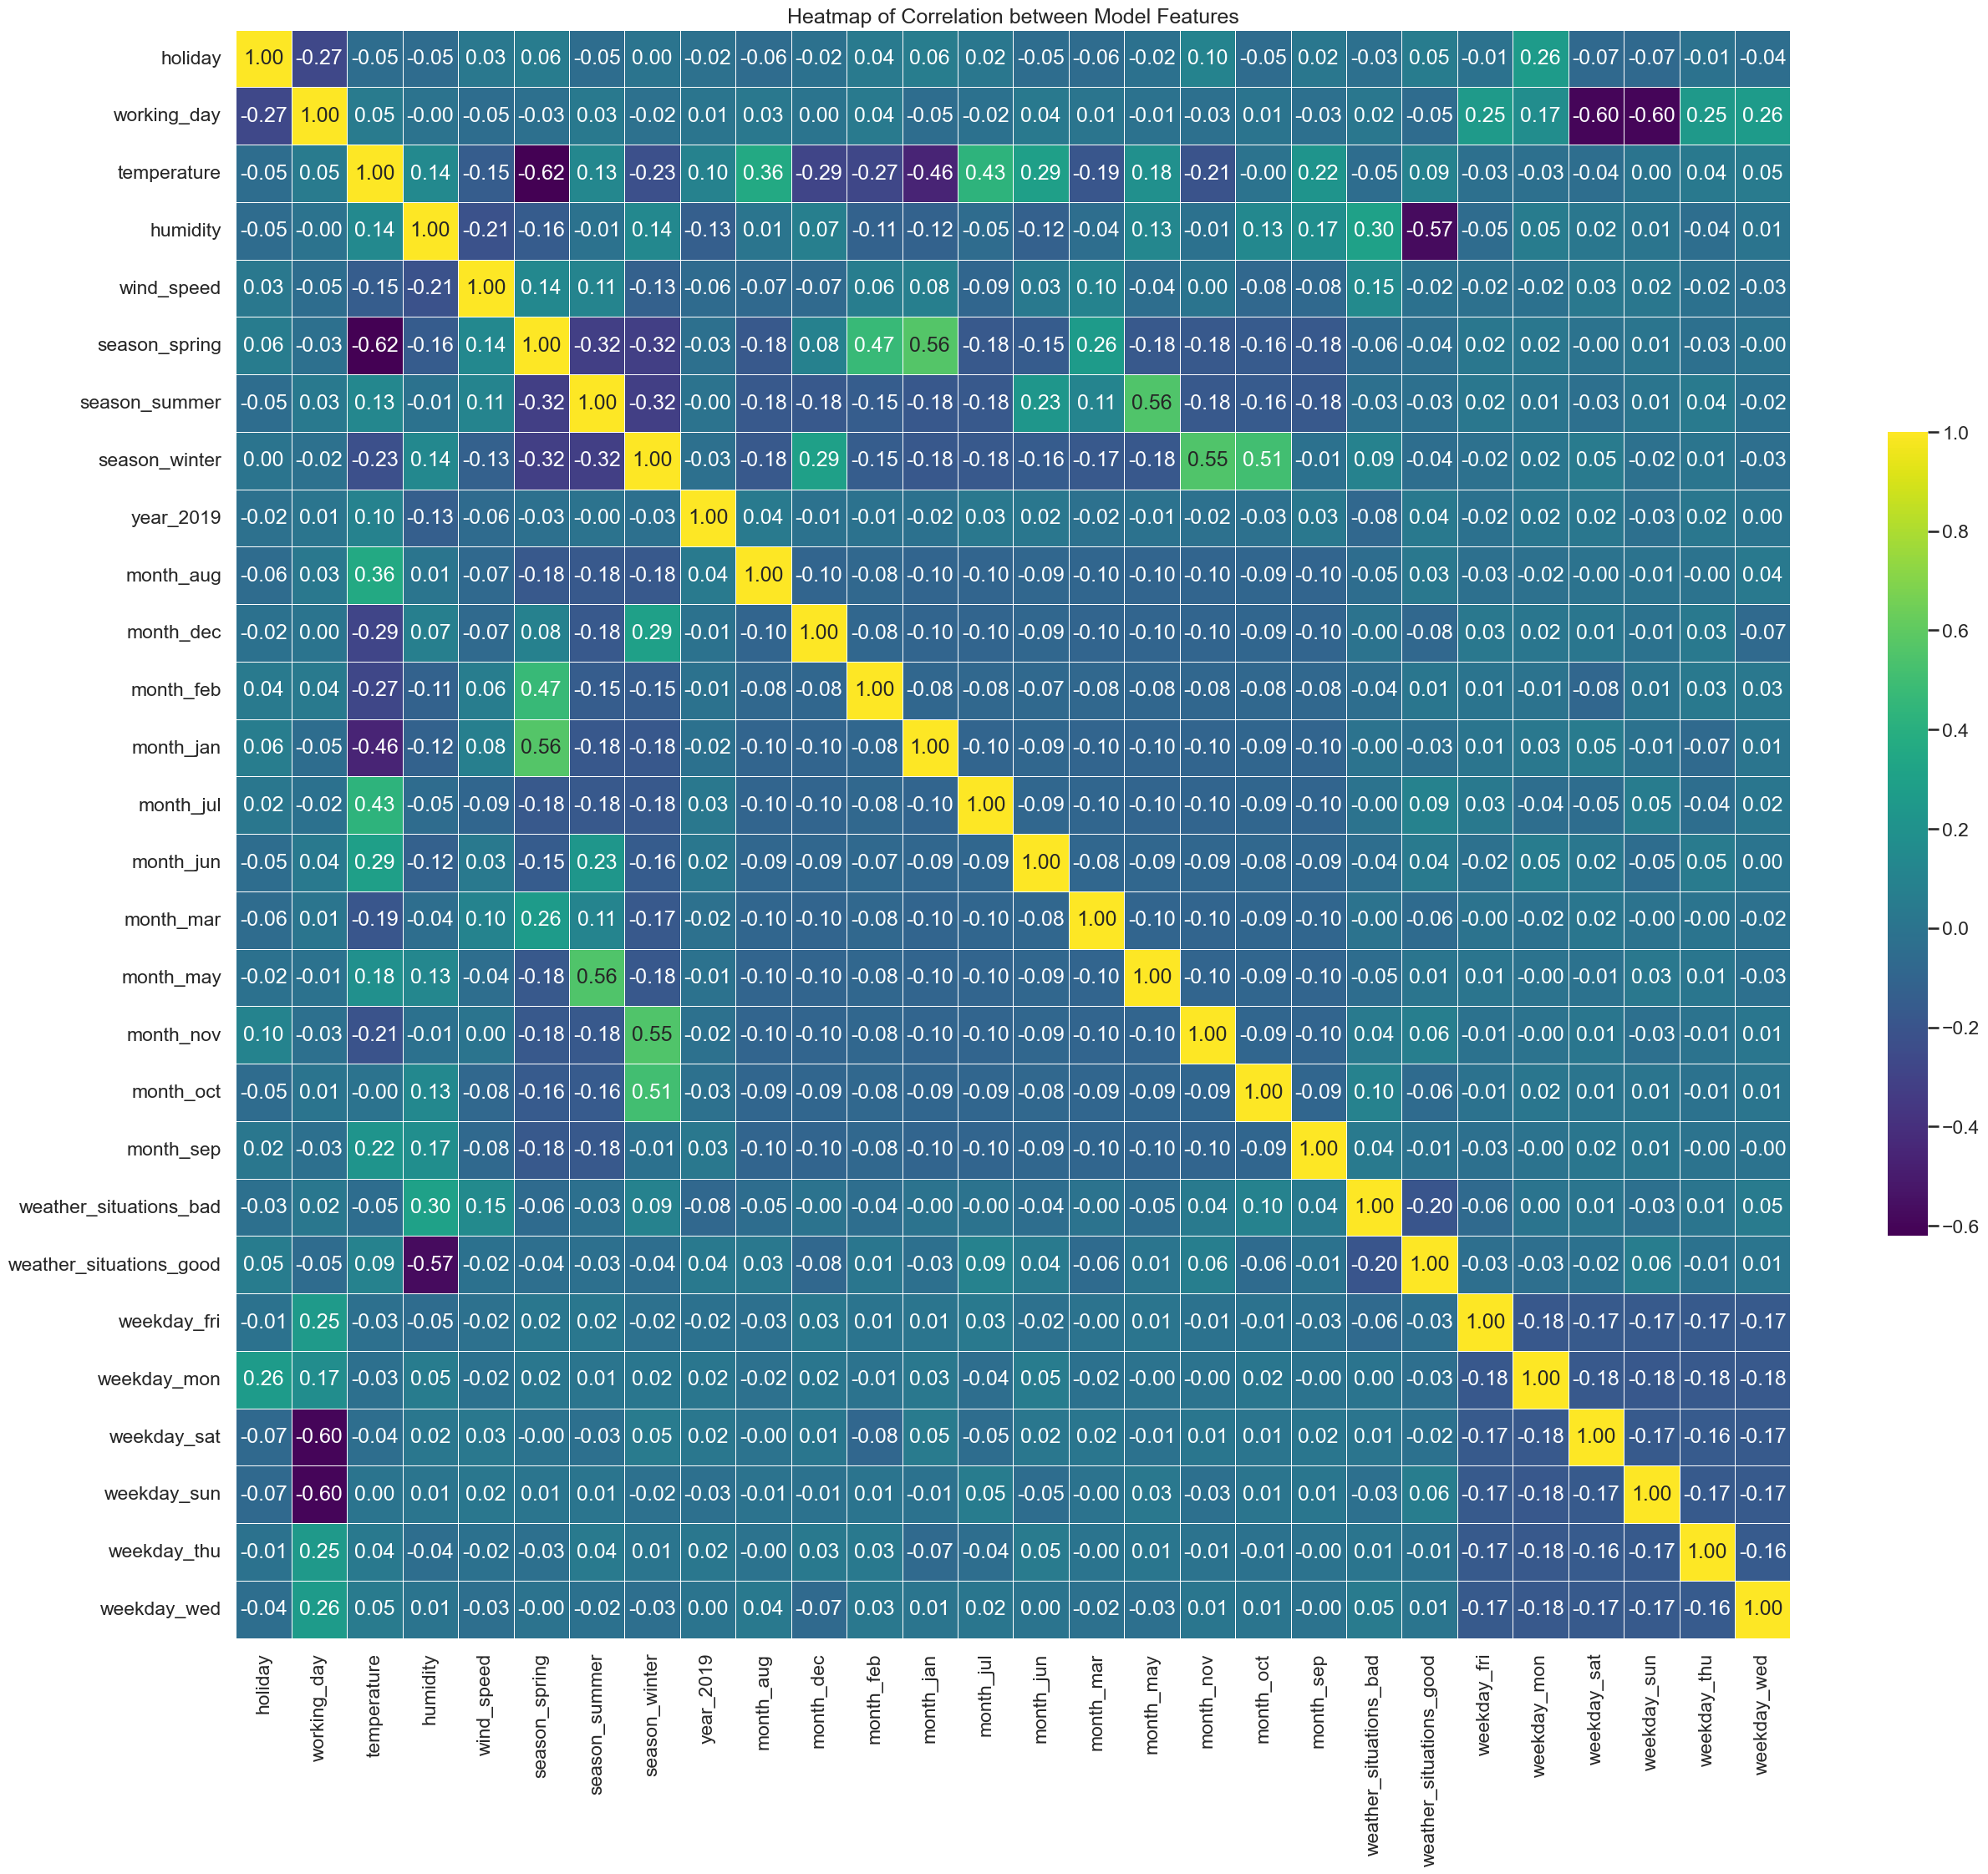

In [67]:
# Calculate the correlation matrix
corr_matrix = X_train[selected_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(30, 25))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=.5, cbar_kws={"shrink": .5})

# Add title
plt.title('Heatmap of Correlation between Model Features')

# Show the plot
plt.show()

#### OBSERVATIONS

1. `holiday`, `month_aug`, `season_summer`, `month_oct`, `month_jul` have high VIF and high p-value hence it should be removed.
2. `working_day` has strong correlations with `weekday_sat`, and `weekday_sun`, and a high VIF and low p-value. Hence we can drop `working_day`. Even logically as well if a day is a working day it cannot be saturday or sunday.
3. `season_spring` has very strong correlations with `temperature` and `month_jan` and has a high VIF hence it should be removed.
4. `weather_situations_good` and `humidity` have high correlations hence it should be dropped on account of multicollinearity.
5. `month_nov` has high correlations with `season_winter` and also has a high VIF. Hence, it should be dropped.
6. `month_jan` has high correlations with `temperature` and also has a high VIF. Hence, it should be dropped.

In [68]:
# Exclude 'holiday', 'month_aug', 'season_summer', 'month_oct', 'month_jul', 'working_day', 'season_spring', 'weather_situations_good', 'month_nov', 'month_jan' from the list of features
exclude_features = ['holiday', 'month_aug', 'season_summer', 'month_oct', 'month_jul', 'working_day', 'season_spring', 'weather_situations_good', 'month_nov', 'month_jan', 'const']
lr_features['lr_model_2'] = selected_features = feature_df.loc[~feature_df['Feature'].isin(exclude_features), 
                                                               'Feature'].tolist()
selected_features

['month_jun',
 'month_mar',
 'weekday_thu',
 'weekday_wed',
 'weekday_mon',
 'month_feb',
 'weekday_fri',
 'month_may',
 'month_dec',
 'month_sep',
 'weekday_sun',
 'weekday_sat',
 'season_winter',
 'temperature',
 'humidity',
 'wind_speed',
 'weather_situations_bad',
 'year_2019']

## **<a id='model-2'>MODEL 2<a/>**  [▲](#top)

In Model 2, we used the selected features from the above Model and computed p-Values and VIF.

In [69]:
# Select the required features
X_train_enhanced = X_train[selected_features]
no_of_predictors['lr_model_2'] = len(selected_features)

# Build another linear regression model
models['lr_model_2'] = lr_model_2 = build_lr_model(X_train_enhanced, y_train)
feature_df = calculate_pvalues_and_vif(X_train_enhanced, lr_model_2)
feature_df

Linear Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     134.1
Date:                Sun, 18 Aug 2024   Prob (F-statistic):          1.63e-174
Time:                        12:55:41   Log-Likelihood:                 483.31
No. Observations:                 501   AIC:                            -928.6
Df Residuals:                     482   BIC:                            -848.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

Feature        VIF  P-Value
4              weekday_wed   1.811095   0.5971
7              weekday_fri   1.823760   0.4836
3              weekday_thu   1.808168   0.4315
6                month_feb   1.254295   0.3697
9                month_dec   1.243345   0.3544
1                month_jun   1.219850   0.2932
12             weekday_sat   1.827007   0.1092
5              weekday_mon   1.904557   0.0944
11             weekday_sun   1.811692   0.0590
2                month_mar   1.207429   0.0045
0                    const  38.187000   0.0000
14             temperature   1.683210   0.0000
13           season_winter   1.351330   0.0000
15                humidity   1.348295   0.0000
17  weather_situations_bad   1.187045   0.0000
8                month_may   1.186061   0.0000
16              wind_speed   1.158601   0.0000
10               month_sep   1.151175   0.0000
18               year_2019   1.046266   0.0000

In [70]:
# Low VIF and High P-Value = Less Significant Features - remove one at a time
feature_df[(feature_df['P-Value'] > 0.05) | (feature_df['VIF'] > 5)]

Feature        VIF  P-Value
4   weekday_wed   1.811095   0.5971
7   weekday_fri   1.823760   0.4836
3   weekday_thu   1.808168   0.4315
6     month_feb   1.254295   0.3697
9     month_dec   1.243345   0.3544
1     month_jun   1.219850   0.2932
12  weekday_sat   1.827007   0.1092
5   weekday_mon   1.904557   0.0944
11  weekday_sun   1.811692   0.0590
0         const  38.187000   0.0000

Now, we used the selected features from Model 1 and performed the Recursive Feature Elimination (RFE) method to select the top features

In [71]:
# Select the required features
X_train_enhanced = X_train[selected_features]

# Build linear regression model using sklearn
lr_model_2_sk = build_lr_model(X_train_enhanced, y_train, method='sklearn')
predictive_summary = evaluate_model_performance(lr_model_2_sk, X_train, y_train, selected_features)
feature_df = perform_rfe(lr_model_2_sk, X_train_enhanced, y_train, n_features_to_select=17)
feature_df

Linear Regression Model (sklearn):
Intercept: 0.19475423839324202
                   Feature  Coefficient
0                month_jun     0.019149
1                month_mar     0.047064
2              weekday_thu    -0.012827
3              weekday_wed     0.008573
4              weekday_mon    -0.026518
5                month_feb    -0.017027
6              weekday_fri     0.011335
7                month_may     0.081290
8                month_dec    -0.015185
9                month_sep     0.098985
10             weekday_sun    -0.030503
11             weekday_sat     0.026123
12           season_winter     0.131847
13             temperature     0.592647
14                humidity    -0.200390
15              wind_speed    -0.126097
16  weather_situations_bad    -0.141774
17               year_2019     0.225109
Mean of Residuals: -0.0000
Standard Deviation of Residuals: 0.0922
Mean Absolute Error (MAE): 0.0704
Mean Squared Error (MSE): 0.0085
Root Mean Squared Error (RMSE): 0.0922
M

Feature  Ranking Selected
0                month_jun        1      Yes
15              wind_speed        1      Yes
14                humidity        1      Yes
13             temperature        1      Yes
12           season_winter        1      Yes
11             weekday_sat        1      Yes
10             weekday_sun        1      Yes
9                month_sep        1      Yes
8                month_dec        1      Yes
7                month_may        1      Yes
6              weekday_fri        1      Yes
5                month_feb        1      Yes
4              weekday_mon        1      Yes
2              weekday_thu        1      Yes
1                month_mar        1      Yes
16  weather_situations_bad        1      Yes
17               year_2019        1      Yes
3              weekday_wed        2       No

In [72]:
# Exclude Not Selected features from the list of features
lr_features['lr_model_3'] = selected_features = feature_df.loc[feature_df['Selected'] == 'Yes', 'Feature'].tolist()
selected_features

['month_jun',
 'wind_speed',
 'humidity',
 'temperature',
 'season_winter',
 'weekday_sat',
 'weekday_sun',
 'month_sep',
 'month_dec',
 'month_may',
 'weekday_fri',
 'month_feb',
 'weekday_mon',
 'weekday_thu',
 'month_mar',
 'weather_situations_bad',
 'year_2019']

## **<a id='model-3'>MODEL 3<a/>**  [▲](#top)

In Model 3, we used the selected features from the above Model and computed p-Values and VIF.

In [73]:
# Select the required features
X_train_enhanced = X_train[selected_features]
no_of_predictors['lr_model_3'] = len(selected_features)

# Build another linear regression model
models['lr_model_3'] = lr_model_3 = build_lr_model(X_train_enhanced, y_train)
feature_df = calculate_pvalues_and_vif(X_train_enhanced, lr_model_3)
feature_df

Linear Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     142.2
Date:                Sun, 18 Aug 2024   Prob (F-statistic):          1.55e-175
Time:                        12:55:41   Log-Likelihood:                 483.17
No. Observations:                 501   AIC:                            -930.3
Df Residuals:                     483   BIC:                            -854.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

Feature        VIF  P-Value
11             weekday_fri   1.327294   0.6183
12               month_feb   1.254284   0.3685
9                month_dec   1.242008   0.3448
1                month_jun   1.218607   0.2849
14             weekday_thu   1.320712   0.2143
6              weekday_sat   1.337312   0.1202
13             weekday_mon   1.357903   0.0206
7              weekday_sun   1.318582   0.0113
15               month_mar   1.205765   0.0047
0                    const  33.194950   0.0000
4              temperature   1.682816   0.0000
5            season_winter   1.350431   0.0000
3                 humidity   1.348272   0.0000
10               month_may   1.185859   0.0000
16  weather_situations_bad   1.185842   0.0000
2               wind_speed   1.154573   0.0000
8                month_sep   1.150943   0.0000
17               year_2019   1.046086   0.0000

In [74]:
# Low VIF and High P-Value = Less Significant Features - remove one at a time
feature_df[(feature_df['P-Value'] > 0.05) | (feature_df['VIF'] > 5)]

Feature        VIF  P-Value
11  weekday_fri   1.327294   0.6183
12    month_feb   1.254284   0.3685
9     month_dec   1.242008   0.3448
1     month_jun   1.218607   0.2849
14  weekday_thu   1.320712   0.2143
6   weekday_sat   1.337312   0.1202
0         const  33.194950   0.0000

Now, we used the selected features from Model 2 and performed the Recursive Feature Elimination (RFE) method to select the top features

In [75]:
# Select the required features
X_train_enhanced = X_train[selected_features]

# Build linear regression model using sklearn
lr_model_3_sk = build_lr_model(X_train_enhanced, y_train, method='sklearn')
predictive_summary = evaluate_model_performance(lr_model_3_sk, X_train, y_train, selected_features)
feature_df = perform_rfe(lr_model_3_sk, X_train_enhanced, y_train, n_features_to_select=16)
feature_df

Linear Regression Model (sklearn):
Intercept: 0.1997180624006597
                   Feature  Coefficient
0                month_jun     0.019457
1               wind_speed    -0.126780
2                 humidity    -0.200440
3              temperature     0.592460
4            season_winter     0.131692
5              weekday_sat     0.021666
6              weekday_sun    -0.034950
7                month_sep     0.098865
8                month_dec    -0.015469
9                month_may     0.081180
10             weekday_fri     0.006873
11               month_feb    -0.017057
12             weekday_mon    -0.031003
13             weekday_thu    -0.017301
14               month_mar     0.046741
15  weather_situations_bad    -0.141270
16               year_2019     0.225168
Mean of Residuals: 0.0000
Standard Deviation of Residuals: 0.0922
Mean Absolute Error (MAE): 0.0705
Mean Squared Error (MSE): 0.0085
Root Mean Squared Error (RMSE): 0.0922
Mean Absolute Percentage Error (MAPE): 3370

Feature  Ranking Selected
0                month_jun        1      Yes
14               month_mar        1      Yes
13             weekday_thu        1      Yes
12             weekday_mon        1      Yes
11               month_feb        1      Yes
9                month_may        1      Yes
15  weather_situations_bad        1      Yes
8                month_dec        1      Yes
6              weekday_sun        1      Yes
5              weekday_sat        1      Yes
4            season_winter        1      Yes
3              temperature        1      Yes
2                 humidity        1      Yes
1               wind_speed        1      Yes
7                month_sep        1      Yes
16               year_2019        1      Yes
10             weekday_fri        2       No

In [76]:
# Exclude Not Selected features from the list of features
lr_features['lr_model_4'] = selected_features = feature_df.loc[feature_df['Selected'] == 'Yes', 'Feature'].tolist()
selected_features

['month_jun',
 'month_mar',
 'weekday_thu',
 'weekday_mon',
 'month_feb',
 'month_may',
 'weather_situations_bad',
 'month_dec',
 'weekday_sun',
 'weekday_sat',
 'season_winter',
 'temperature',
 'humidity',
 'wind_speed',
 'month_sep',
 'year_2019']

## **<a id='model-4'>MODEL 4<a/>**  [▲](#top)

In Model 4, we used the selected features from the above Model and computed p-Values and VIF.

In [77]:
# Select the required features
X_train_enhanced = X_train[selected_features]
no_of_predictors['lr_model_4'] = len(selected_features)

# Build another linear regression model
models['lr_model_4'] = lr_model_4 = build_lr_model(X_train_enhanced, y_train)
feature_df = calculate_pvalues_and_vif(X_train_enhanced, lr_model_4)
feature_df

Linear Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     151.3
Date:                Sun, 18 Aug 2024   Prob (F-statistic):          1.40e-176
Time:                        12:55:42   Log-Likelihood:                 483.04
No. Observations:                 501   AIC:                            -932.1
Df Residuals:                     484   BIC:                            -860.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

Feature        VIF  P-Value
5                month_feb   1.253226   0.3603
8                month_dec   1.239825   0.3548
1                month_jun   1.218269   0.2808
10             weekday_sat   1.176830   0.1404
3              weekday_thu   1.163990   0.1320
4              weekday_mon   1.181852   0.0075
2                month_mar   1.205589   0.0047
9              weekday_sun   1.157286   0.0039
0                    const  31.165275   0.0000
12             temperature   1.678820   0.0000
11           season_winter   1.349913   0.0000
13                humidity   1.347378   0.0000
6                month_may   1.184584   0.0000
7   weather_situations_bad   1.181930   0.0000
14              wind_speed   1.154113   0.0000
15               month_sep   1.150917   0.0000
16               year_2019   1.046006   0.0000

In [78]:
# Low VIF and High P-Value = Less Significant Features - remove one at a time
feature_df[(feature_df['P-Value'] > 0.05) | (feature_df['VIF'] > 5)]

Feature        VIF  P-Value
5     month_feb   1.253226   0.3603
8     month_dec   1.239825   0.3548
1     month_jun   1.218269   0.2808
10  weekday_sat   1.176830   0.1404
3   weekday_thu   1.163990   0.1320
0         const  31.165275   0.0000

Now, we used the selected features from Model 3 and performed the Recursive Feature Elimination (RFE) method to select the top features

In [79]:
# Select the required features
X_train_enhanced = X_train[selected_features]

# Build linear regression model using sklearn
lr_model_4_sk = build_lr_model(X_train_enhanced, y_train, method='sklearn')
predictive_summary = evaluate_model_performance(lr_model_4_sk, X_train, y_train, selected_features)
feature_df = perform_rfe(lr_model_4_sk, X_train_enhanced, y_train, n_features_to_select=15)
feature_df

Linear Regression Model (sklearn):
Intercept: 0.20269951203776443
                   Feature  Coefficient
0                month_jun     0.019608
1                month_mar     0.046642
2              weekday_thu    -0.019690
3              weekday_mon    -0.033400
4                month_feb    -0.017331
5                month_may     0.081441
6   weather_situations_bad    -0.142126
7                month_dec    -0.015127
8              weekday_sun    -0.037346
9              weekday_sat     0.019262
10           season_winter     0.131581
11             temperature     0.591899
12                humidity    -0.200738
13              wind_speed    -0.126997
14               month_sep     0.098903
15               year_2019     0.225131
Mean of Residuals: 0.0000
Standard Deviation of Residuals: 0.0923
Mean Absolute Error (MAE): 0.0705
Mean Squared Error (MSE): 0.0085
Root Mean Squared Error (RMSE): 0.0923
Mean Absolute Percentage Error (MAPE): 3359732607233.7197
R^2 Score: 0.8334
Adjust

Feature  Ranking Selected
0                month_jun        1      Yes
1                month_mar        1      Yes
2              weekday_thu        1      Yes
3              weekday_mon        1      Yes
4                month_feb        1      Yes
5                month_may        1      Yes
6   weather_situations_bad        1      Yes
8              weekday_sun        1      Yes
9              weekday_sat        1      Yes
10           season_winter        1      Yes
11             temperature        1      Yes
12                humidity        1      Yes
13              wind_speed        1      Yes
14               month_sep        1      Yes
15               year_2019        1      Yes
7                month_dec        2       No

In [80]:
# Exclude Not Selected features from the list of features
lr_features['lr_model_5'] = selected_features = feature_df.loc[feature_df['Selected'] == 'Yes', 'Feature'].tolist()
selected_features

['month_jun',
 'month_mar',
 'weekday_thu',
 'weekday_mon',
 'month_feb',
 'month_may',
 'weather_situations_bad',
 'weekday_sun',
 'weekday_sat',
 'season_winter',
 'temperature',
 'humidity',
 'wind_speed',
 'month_sep',
 'year_2019']

## **<a id='model-5'>MODEL 5<a/>**  [▲](#top)

In Model 5, we used the selected features from the above Model and computed p-Values and VIF.

In [81]:
# Select the required features
X_train_enhanced = X_train[selected_features]
no_of_predictors['lr_model_5'] = len(selected_features)

# Build another linear regression model
models['lr_model_5'] = lr_model_5 = build_lr_model(X_train_enhanced, y_train)
feature_df = calculate_pvalues_and_vif(X_train_enhanced, lr_model_5)
feature_df

Linear Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     161.4
Date:                Sun, 18 Aug 2024   Prob (F-statistic):          1.66e-177
Time:                        12:55:42   Log-Likelihood:                 482.59
No. Observations:                 501   AIC:                            -933.2
Df Residuals:                     485   BIC:                            -865.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

Feature        VIF  P-Value
5                month_feb   1.217965   0.4409
1                month_jun   1.218235   0.2829
9              weekday_sat   1.176682   0.1376
3              weekday_thu   1.160298   0.1186
4              weekday_mon   1.181847   0.0075
8              weekday_sun   1.157244   0.0038
2                month_mar   1.176755   0.0027
0                    const  30.001504   0.0000
11             temperature   1.536622   0.0000
12                humidity   1.332202   0.0000
10           season_winter   1.327072   0.0000
6                month_may   1.178866   0.0000
7   weather_situations_bad   1.177081   0.0000
13              wind_speed   1.151012   0.0000
14               month_sep   1.143465   0.0000
15               year_2019   1.044952   0.0000

In [82]:
# Low VIF and High P-Value = Less Significant Features - remove one at a time
feature_df[(feature_df['P-Value'] > 0.05) | (feature_df['VIF'] > 5)]

Feature        VIF  P-Value
5    month_feb   1.217965   0.4409
1    month_jun   1.218235   0.2829
9  weekday_sat   1.176682   0.1376
3  weekday_thu   1.160298   0.1186
0        const  30.001504   0.0000

Now, we used the selected features from Model 4 and performed the Recursive Feature Elimination (RFE) method to select the top features

In [83]:
# Select the required features
X_train_enhanced = X_train[selected_features]

# Build linear regression model using sklearn
lr_model_5_sk = build_lr_model(X_train_enhanced, y_train, method='sklearn')
predictive_summary = evaluate_model_performance(lr_model_5_sk, X_train, y_train, selected_features)
feature_df = perform_rfe(lr_model_5_sk, X_train_enhanced, y_train, n_features_to_select=14)
feature_df

Linear Regression Model (sklearn):
Intercept: 0.19850901987984054
                   Feature  Coefficient
0                month_jun     0.019519
1                month_mar     0.048996
2              weekday_thu    -0.020371
3              weekday_mon    -0.033423
4                month_feb    -0.014390
5                month_may     0.082468
6   weather_situations_bad    -0.140357
7              weekday_sun    -0.037418
8              weekday_sat     0.019397
9            season_winter     0.130217
10             temperature     0.598115
11                humidity    -0.203017
12              wind_speed    -0.125950
13               month_sep     0.100087
14               year_2019     0.224878
Mean of Residuals: -0.0000
Standard Deviation of Residuals: 0.0923
Mean Absolute Error (MAE): 0.0705
Mean Squared Error (MSE): 0.0085
Root Mean Squared Error (RMSE): 0.0923
Mean Absolute Percentage Error (MAPE): 3341098621176.7241
R^2 Score: 0.8331
Adjusted R^2: 0.8232
Explained Variance Score

Feature  Ranking Selected
0                month_jun        1      Yes
1                month_mar        1      Yes
2              weekday_thu        1      Yes
3              weekday_mon        1      Yes
5                month_may        1      Yes
6   weather_situations_bad        1      Yes
7              weekday_sun        1      Yes
8              weekday_sat        1      Yes
9            season_winter        1      Yes
10             temperature        1      Yes
11                humidity        1      Yes
12              wind_speed        1      Yes
13               month_sep        1      Yes
14               year_2019        1      Yes
4                month_feb        2       No

In [84]:
# Exclude Not Selected features from the list of features
lr_features['lr_model_6'] = selected_features = feature_df.loc[feature_df['Selected'] == 'Yes', 'Feature'].tolist()
selected_features

['month_jun',
 'month_mar',
 'weekday_thu',
 'weekday_mon',
 'month_may',
 'weather_situations_bad',
 'weekday_sun',
 'weekday_sat',
 'season_winter',
 'temperature',
 'humidity',
 'wind_speed',
 'month_sep',
 'year_2019']

## **<a id='model-6'>MODEL 6<a/>**  [▲](#top)

In Model 6, we used the selected features from the above Model and computed p-Values and VIF.

In [85]:
# Select the required features
X_train_enhanced = X_train[selected_features]
no_of_predictors['lr_model_6'] = len(selected_features)

# Build another linear regression model
models['lr_model_6'] = lr_model_6 = build_lr_model(X_train_enhanced, y_train)
feature_df = calculate_pvalues_and_vif(X_train_enhanced, lr_model_6)
feature_df

Linear Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     173.0
Date:                Sun, 18 Aug 2024   Prob (F-statistic):          1.66e-178
Time:                        12:55:42   Log-Likelihood:                 482.29
No. Observations:                 501   AIC:                            -934.6
Df Residuals:                     486   BIC:                            -871.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

Feature        VIF  P-Value
1                month_jun   1.215132   0.2650
8              weekday_sat   1.168662   0.1201
3              weekday_thu   1.159029   0.1123
4              weekday_mon   1.181285   0.0078
7              weekday_sun   1.157099   0.0039
2                month_mar   1.122242   0.0012
0                    const  27.532270   0.0000
10             temperature   1.394956   0.0000
11                humidity   1.332105   0.0000
9            season_winter   1.228275   0.0000
6   weather_situations_bad   1.175828   0.0000
5                month_may   1.166202   0.0000
12              wind_speed   1.150960   0.0000
13               month_sep   1.141210   0.0000
14               year_2019   1.044872   0.0000

In [86]:
# Low VIF and High P-Value = Less Significant Features - remove one at a time
feature_df[(feature_df['P-Value'] > 0.05) | (feature_df['VIF'] > 5)]

Feature        VIF  P-Value
1    month_jun   1.215132   0.2650
8  weekday_sat   1.168662   0.1201
3  weekday_thu   1.159029   0.1123
0        const  27.532270   0.0000

Now, we used the selected features from Model 5 and performed the Recursive Feature Elimination (RFE) method to select the top features

In [87]:
# Select the required features
X_train_enhanced = X_train[selected_features]

# Build linear regression model using sklearn
lr_model_6_sk = build_lr_model(X_train_enhanced, y_train, method='sklearn')
predictive_summary = evaluate_model_performance(lr_model_6_sk, X_train, y_train, selected_features)
feature_df = perform_rfe(lr_model_6_sk, X_train_enhanced, y_train, n_features_to_select=13)
feature_df

Linear Regression Model (sklearn):
Intercept: 0.19342647862566942
                   Feature  Coefficient
0                month_jun     0.020226
1                month_mar     0.051692
2              weekday_thu    -0.020703
3              weekday_mon    -0.033214
4                month_may     0.083741
5   weather_situations_bad    -0.139609
6              weekday_sun    -0.037307
7              weekday_sat     0.020228
8            season_winter     0.132579
9              temperature     0.603280
10                humidity    -0.202865
11              wind_speed    -0.125837
12               month_sep     0.100630
13               year_2019     0.224821
Mean of Residuals: 0.0000
Standard Deviation of Residuals: 0.0924
Mean Absolute Error (MAE): 0.0706
Mean Squared Error (MSE): 0.0085
Root Mean Squared Error (RMSE): 0.0924
Mean Absolute Percentage Error (MAPE): 3349617495037.6255
R^2 Score: 0.8329
Adjusted R^2: 0.8230
Explained Variance Score: 0.8329
Median Absolute Error: 0.0575


Feature  Ranking Selected
1                month_mar        1      Yes
2              weekday_thu        1      Yes
3              weekday_mon        1      Yes
4                month_may        1      Yes
5   weather_situations_bad        1      Yes
6              weekday_sun        1      Yes
7              weekday_sat        1      Yes
8            season_winter        1      Yes
9              temperature        1      Yes
10                humidity        1      Yes
11              wind_speed        1      Yes
12               month_sep        1      Yes
13               year_2019        1      Yes
0                month_jun        2       No

In [88]:
# Exclude Not Selected features from the list of features
lr_features['lr_model_7'] = selected_features = feature_df.loc[feature_df['Selected'] == 'Yes', 'Feature'].tolist()
selected_features

['month_mar',
 'weekday_thu',
 'weekday_mon',
 'month_may',
 'weather_situations_bad',
 'weekday_sun',
 'weekday_sat',
 'season_winter',
 'temperature',
 'humidity',
 'wind_speed',
 'month_sep',
 'year_2019']

## **<a id='model-7'>MODEL 7<a/>**  [▲](#top)

In Model 7, we used the selected features from the above Model and computed p-Values and VIF.

In [89]:
# Select the required features
X_train_enhanced = X_train[selected_features]
no_of_predictors['lr_model_7'] = len(selected_features)

# Build another linear regression model
models['lr_model_7'] = lr_model_7 = build_lr_model(X_train_enhanced, y_train)
feature_df = calculate_pvalues_and_vif(X_train_enhanced, lr_model_7)
feature_df

Linear Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     186.1
Date:                Sun, 18 Aug 2024   Prob (F-statistic):          2.22e-179
Time:                        12:55:42   Log-Likelihood:                 481.65
No. Observations:                 501   AIC:                            -935.3
Df Residuals:                     487   BIC:                            -876.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

Feature        VIF  P-Value
2              weekday_thu   1.154239   0.1287
7              weekday_sat   1.161786   0.1002
3              weekday_mon   1.171179   0.0102
6              weekday_sun   1.157085   0.0038
1                month_mar   1.114231   0.0016
0                    const  27.487904   0.0000
10                humidity   1.316589   0.0000
9              temperature   1.251395   0.0000
8            season_winter   1.212090   0.0000
5   weather_situations_bad   1.175778   0.0000
11              wind_speed   1.149761   0.0000
4                month_may   1.127672   0.0000
12               month_sep   1.108320   0.0000
13               year_2019   1.043490   0.0000

In [90]:
# Low VIF and High P-Value = Less Significant Features - remove one at a time
feature_df[(feature_df['P-Value'] > 0.05) | (feature_df['VIF'] > 5)]

Feature        VIF  P-Value
2  weekday_thu   1.154239   0.1287
7  weekday_sat   1.161786   0.1002
0        const  27.487904   0.0000

In [91]:
# Select the required features
X_train_enhanced = X_train[selected_features]

# Build linear regression model using sklearn
lr_model_7_sk = build_lr_model(X_train_enhanced, y_train, method='sklearn')
predictive_summary = evaluate_model_performance(lr_model_7_sk, X_train, y_train, selected_features)
feature_df = perform_rfe(lr_model_7_sk, X_train_enhanced, y_train, n_features_to_select=12)
feature_df

Linear Regression Model (sklearn):
Intercept: 0.19244129845305658
                   Feature  Coefficient
0                month_mar     0.050198
1              weekday_thu    -0.019770
2              weekday_mon    -0.031930
3                month_may     0.080530
4   weather_situations_bad    -0.139391
5              weekday_sun    -0.037355
6              weekday_sat     0.021340
7            season_winter     0.131197
8              temperature     0.610800
9                 humidity    -0.205639
10              wind_speed    -0.125053
11               month_sep     0.097633
12               year_2019     0.224473
Mean of Residuals: 0.0000
Standard Deviation of Residuals: 0.0925
Mean Absolute Error (MAE): 0.0707
Mean Squared Error (MSE): 0.0086
Root Mean Squared Error (RMSE): 0.0925
Mean Absolute Percentage Error (MAPE): 3356085908130.7026
R^2 Score: 0.8324
Adjusted R^2: 0.8225
Explained Variance Score: 0.8324
Median Absolute Error: 0.0564


Feature  Ranking Selected
0                month_mar        1      Yes
2              weekday_mon        1      Yes
3                month_may        1      Yes
4   weather_situations_bad        1      Yes
5              weekday_sun        1      Yes
6              weekday_sat        1      Yes
7            season_winter        1      Yes
8              temperature        1      Yes
9                 humidity        1      Yes
10              wind_speed        1      Yes
11               month_sep        1      Yes
12               year_2019        1      Yes
1              weekday_thu        2       No

In [92]:
# Exclude Not Selected features from the list of features
lr_features['lr_model_8'] = selected_features = feature_df.loc[feature_df['Selected'] == 'Yes', 'Feature'].tolist()
selected_features

['month_mar',
 'weekday_mon',
 'month_may',
 'weather_situations_bad',
 'weekday_sun',
 'weekday_sat',
 'season_winter',
 'temperature',
 'humidity',
 'wind_speed',
 'month_sep',
 'year_2019']

## **<a id='model-8'>MODEL 8<a/>**  [▲](#top)

In Model 8, we used the selected features from the above Model and computed p-Values and VIF.

In [93]:
# Select the required features
X_train_enhanced = X_train[selected_features]
no_of_predictors['lr_model_8'] = len(selected_features)

# Build another linear regression model
models['lr_model_8'] = lr_model_8 = build_lr_model(X_train_enhanced, y_train)
feature_df = calculate_pvalues_and_vif(X_train_enhanced, lr_model_8)
feature_df

Linear Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     200.9
Date:                Sun, 18 Aug 2024   Prob (F-statistic):          4.83e-180
Time:                        12:55:42   Log-Likelihood:                 480.46
No. Observations:                 501   AIC:                            -934.9
Df Residuals:                     488   BIC:                            -880.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

Feature        VIF  P-Value
6              weekday_sat   1.087991   0.0367
2              weekday_mon   1.090894   0.0246
5              weekday_sun   1.083238   0.0095
1                month_mar   1.113999   0.0017
0                    const  26.889530   0.0000
9                 humidity   1.314863   0.0000
8              temperature   1.250575   0.0000
7            season_winter   1.210419   0.0000
4   weather_situations_bad   1.175207   0.0000
10              wind_speed   1.149648   0.0000
3                month_may   1.126696   0.0000
11               month_sep   1.108253   0.0000
12               year_2019   1.043118   0.0000

In [94]:
# Low VIF and High P-Value = Less Significant Features - remove one at a time
feature_df[(feature_df['P-Value'] > 0.05) | (feature_df['VIF'] > 5)]

Feature       VIF  P-Value
0   const  26.88953      0.0

Now we can see that we don't have any column that has low significance. Hence, we checked the correlation between the features using a heatmap.

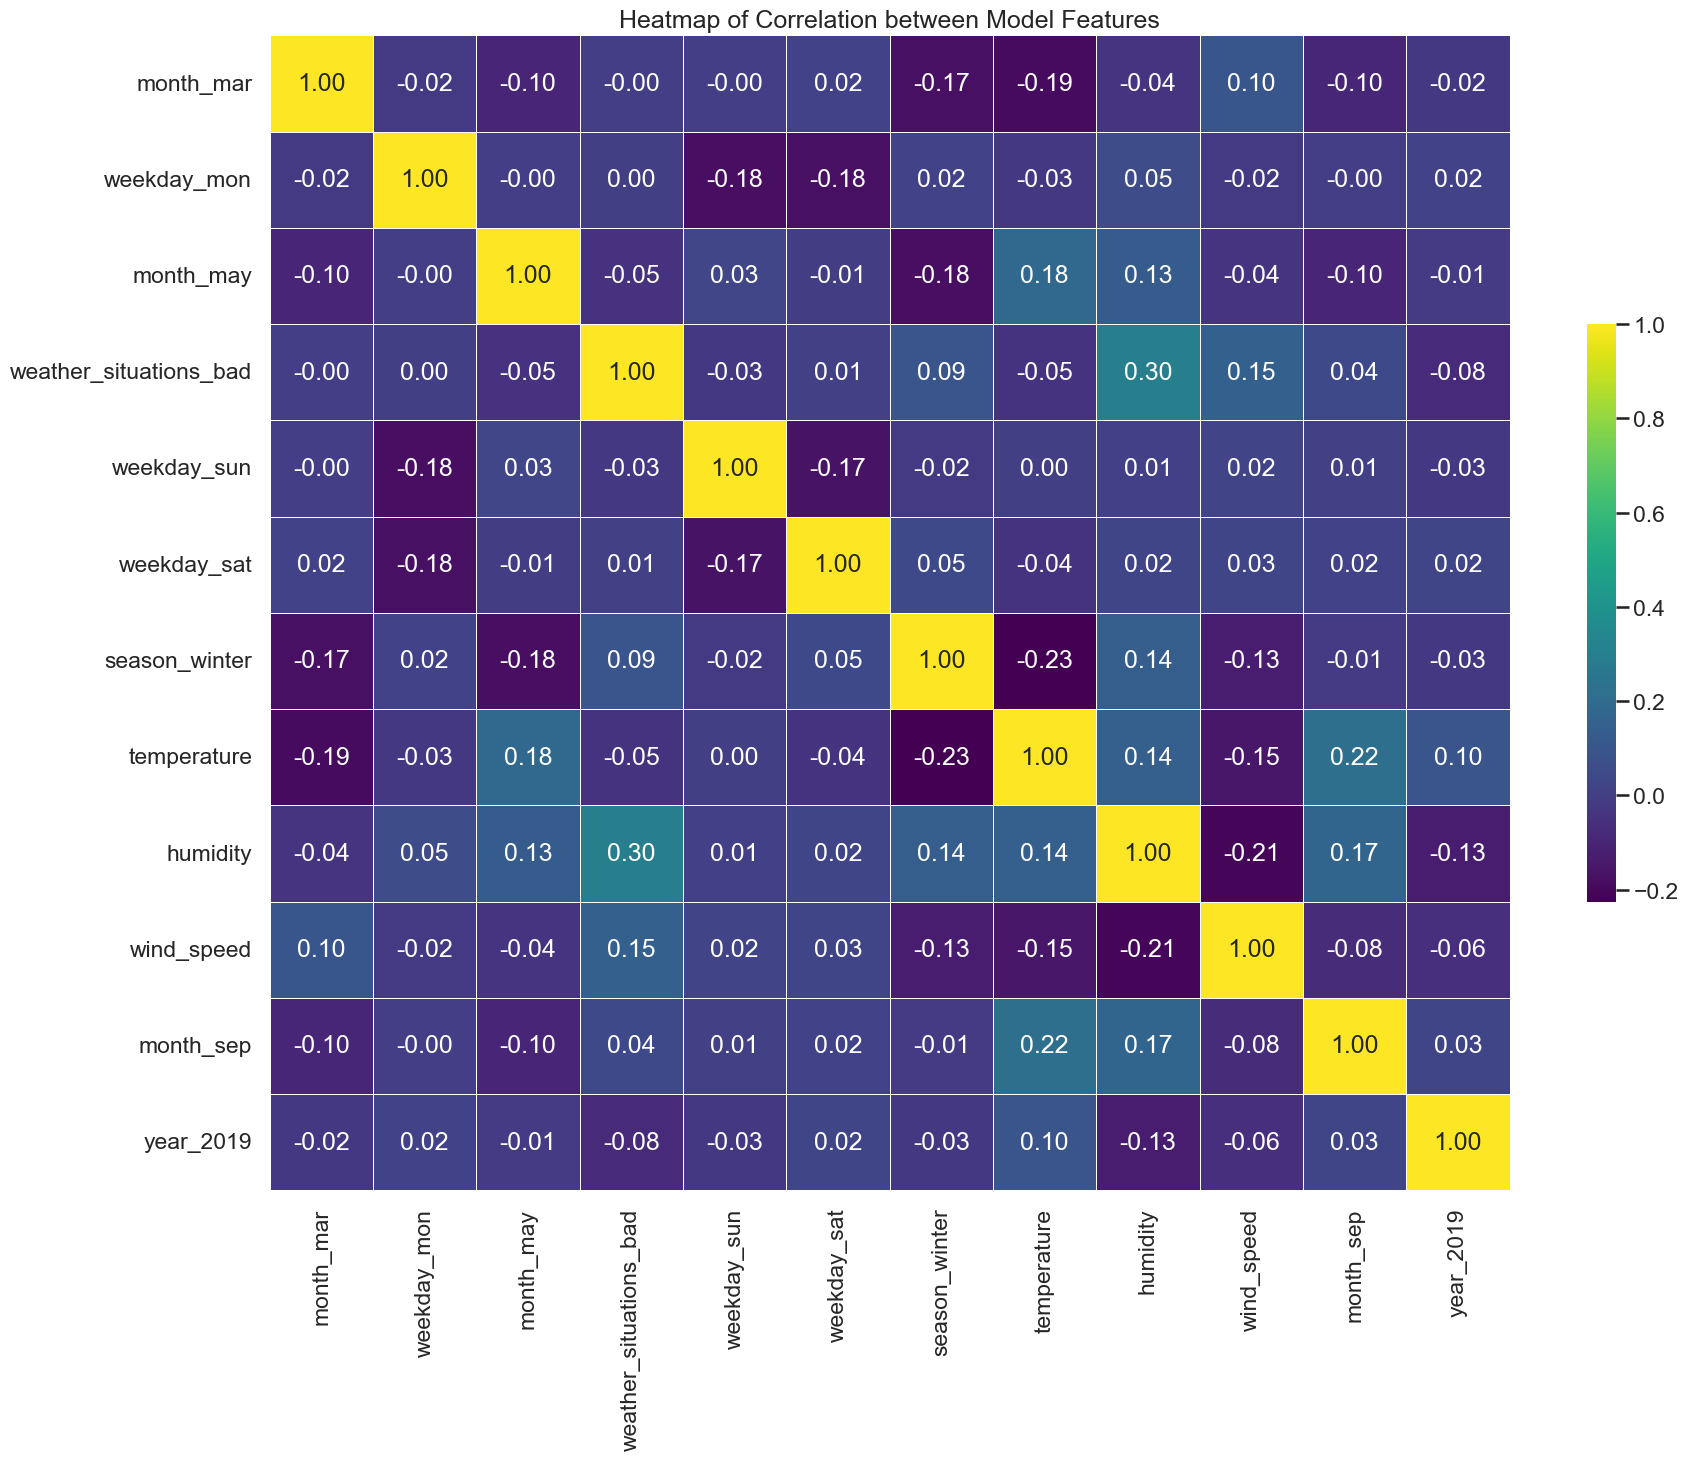

In [95]:
# Calculate the correlation matrix
corr_matrix = X_train[selected_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=.5, cbar_kws={"shrink": .5})

# Add title
plt.title('Heatmap of Correlation between Model Features')

# Show the plot
plt.show()

### Now, we can see that there is no significant correlation between the features and all the features have low p-value and low VIF. Hence this is the final model.

In [96]:
# Select the required features
X_train_enhanced = X_train[selected_features]

# Build linear regression model using sklearn
lr_model_8_sk = build_lr_model(X_train_enhanced, y_train, method='sklearn')
predictive_summary = evaluate_model_performance(lr_model_8_sk, X_train, y_train, selected_features)

Linear Regression Model (sklearn):
Intercept: 0.1875062478508861
                   Feature  Coefficient
0                month_mar     0.049851
1              weekday_mon    -0.026995
2                month_may     0.079833
3   weather_situations_bad    -0.140388
4              weekday_sun    -0.032413
5              weekday_sat     0.026309
6            season_winter     0.130591
7              temperature     0.610025
8                 humidity    -0.204377
9               wind_speed    -0.124725
10               month_sep     0.097449
11               year_2019     0.224227
Mean of Residuals: -0.0000
Standard Deviation of Residuals: 0.0927
Mean Absolute Error (MAE): 0.0706
Mean Squared Error (MSE): 0.0086
Root Mean Squared Error (RMSE): 0.0927
Mean Absolute Percentage Error (MAPE): 3348991129210.4541
R^2 Score: 0.8316
Adjusted R^2: 0.8217
Explained Variance Score: 0.8316
Median Absolute Error: 0.0569


In [97]:
final_model = lr_model_8_sk
final_model_sm = lr_model_8
final_features = lr_features['lr_model_8']
X_train_final = X_train[lr_features['lr_model_8']]

# **<a id='model-evaluation'>6. MODEL EVALUATION<a/>**  [▲](#top)

## **<a id='residual-analysis'>RESIDUAL ANALYSIS OF ALL MODELS<a/>**  [▲](#top)

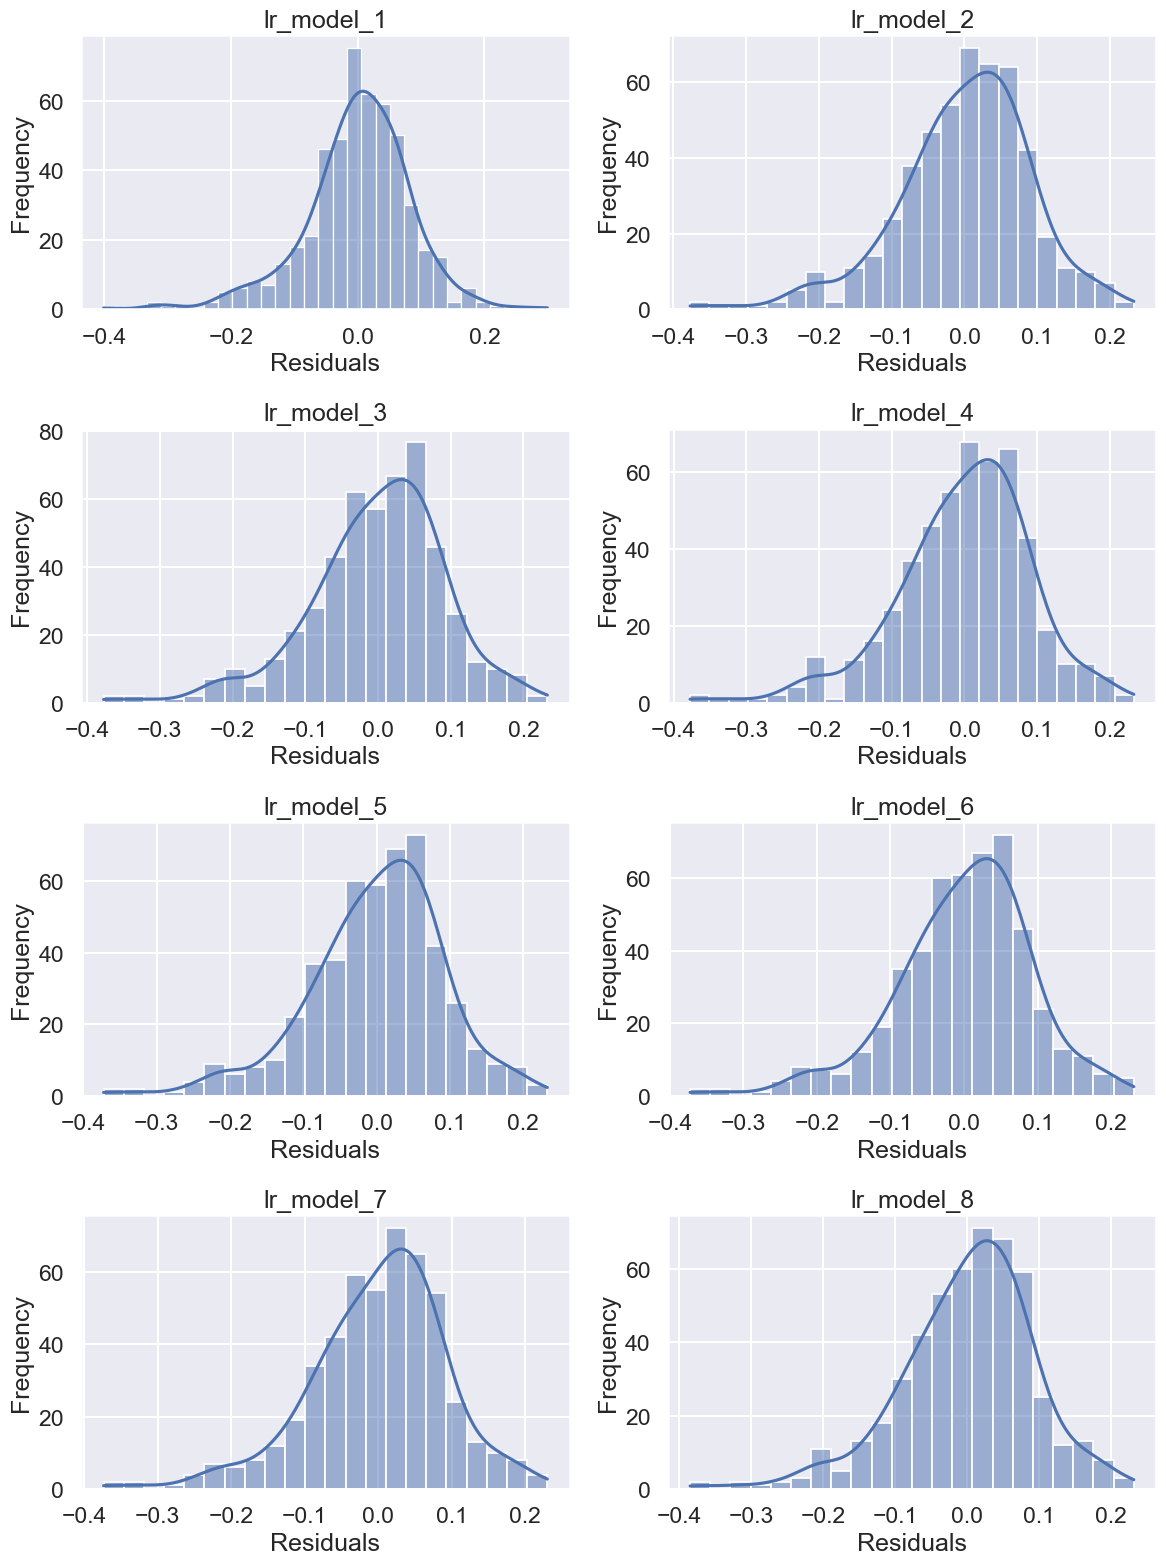

In [98]:
# Dynamic Grid Calculations
num_models = len(models)
num_columns = 2
num_rows = (num_models + num_columns - 1) // num_columns
plt.figure(figsize=(num_columns * 6, num_rows * 4))

for i, (name, model) in enumerate(models.items(), start=1):
    # For statsmodels models
    plt.subplot(num_rows, num_columns, i)
    sns.histplot(model.resid, kde=True)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title(name)

plt.tight_layout()
plt.show()

#### OBSERVATIONS

1. **Residual Distributions:** All models exhibit residuals that approximate a normal distribution, suggesting these models fit the data well.

2. **Variance Analysis:** Models 1 through 9 have low residual variance, indicating stable and consistent predictions. This indicates the ability to generalize well to the data.

3. **Residual Characteristics:** The residuals of Models 1 through 8 display a slight left shoulder. This feature might indicate potential overfitting or the influence of outliers. It suggests that the models might be overly complex and capturing outliers in the data trend.

## **<a id='model-assessment-and-comparison'>MODEL ASSESSMENT AND COMPARISON<a/>**  [▲](#top)

In [99]:
# Evaluate R-squared values
results = []

for name, model in models.items():
    # For statsmodels models
    results.append({
        "Model": name,
        "R-squared": model.rsquared,
        "Adjusted R-squared": model.rsquared_adj,
        "AIC": model.aic,
        "BIC": model.bic,
        "F-statistic": model.fvalue,
        "No. of Predictors": no_of_predictors[name],
    })

results_df = pd.DataFrame(results)
round(results_df, 4)

Model  R-squared  Adjusted R-squared        AIC       BIC  \
0  lr_model_1     0.8612              0.8533 -1001.7428 -883.6778   
1  lr_model_2     0.8336              0.8273  -928.6225 -848.5070   
2  lr_model_3     0.8335              0.8276  -930.3318 -854.4329   
3  lr_model_4     0.8334              0.8279  -932.0740 -860.3917   
4  lr_model_5     0.8331              0.8279  -933.1868 -865.7211   
5  lr_model_6     0.8329              0.8281  -934.5726 -871.3235   
6  lr_model_7     0.8324              0.8280  -935.2906 -876.2581   
7  lr_model_8     0.8316              0.8275  -934.9141 -880.0983   

   F-statistic  No. of Predictors  
0     108.7257                 28  
1     134.1017                 18  
2     142.1856                 17  
3     151.2915                 16  
4     161.3677                 15  
5     172.9956                 14  
6     186.1135                 13  
7     200.8885                 12

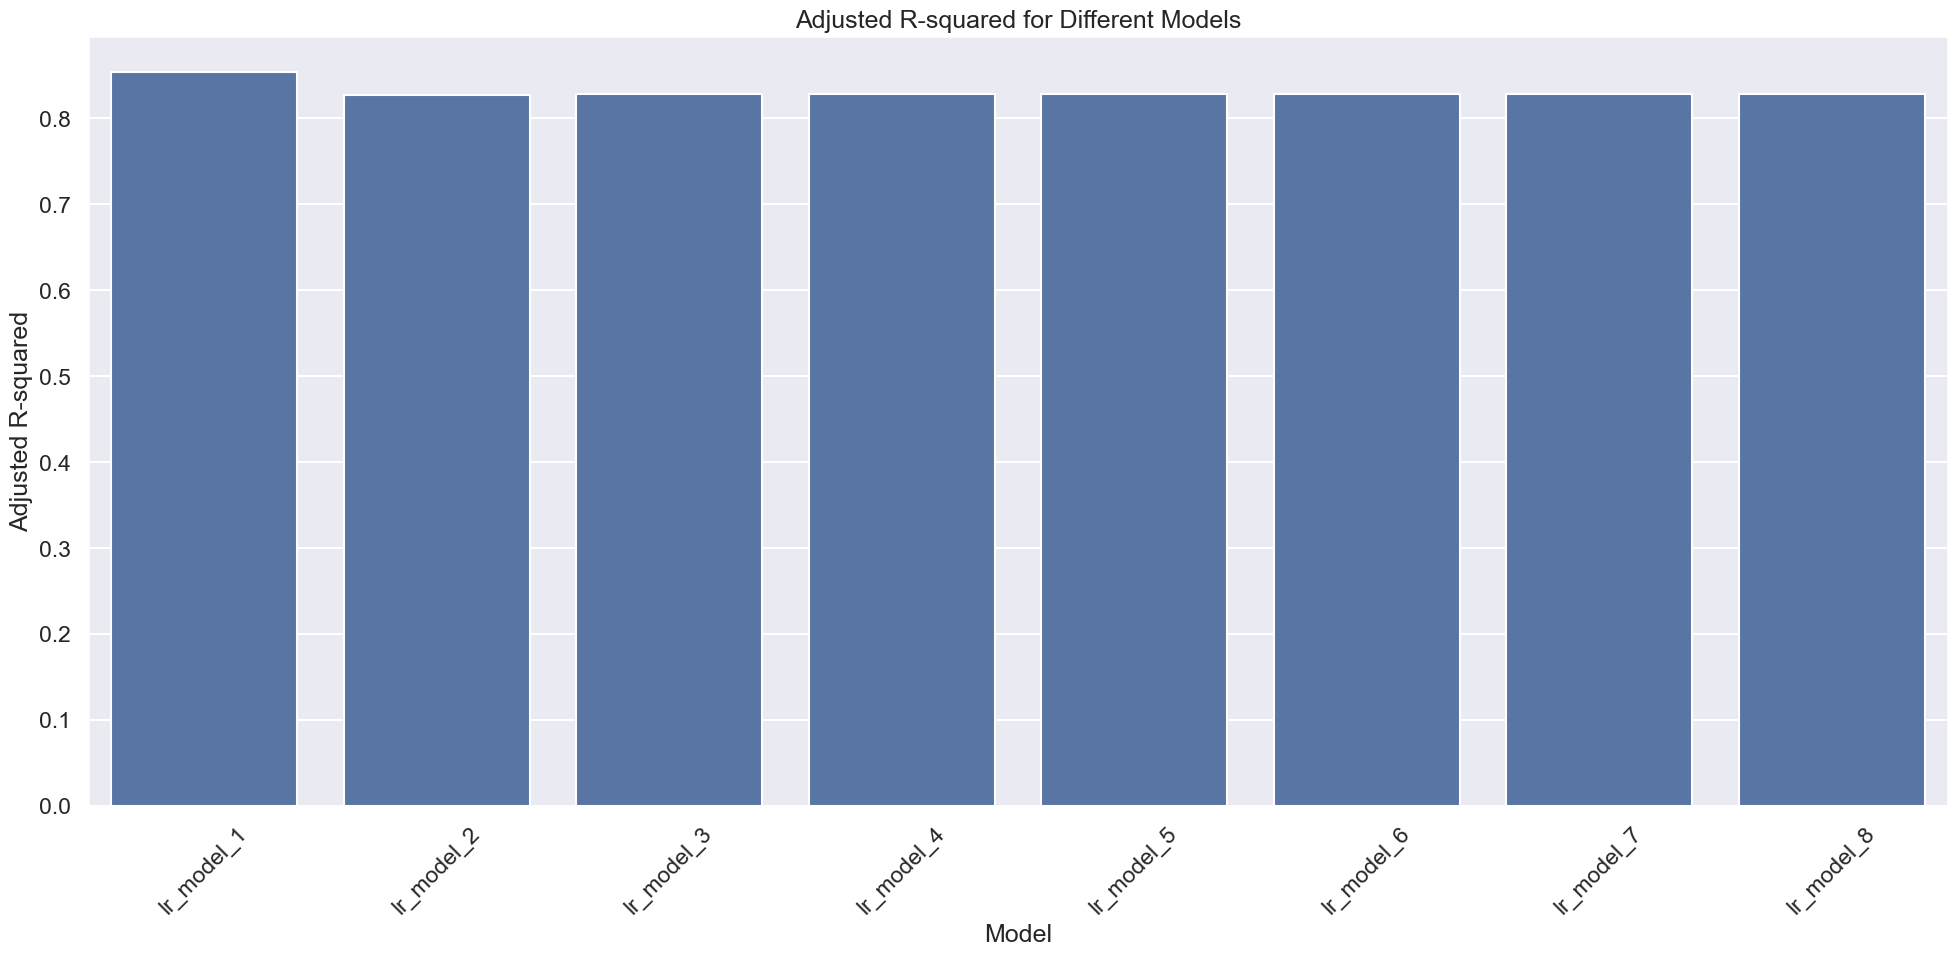

In [100]:
# Plotting Adjusted R-squared for each model
plt.figure(figsize=(24, 10))
ax = sns.barplot(x="Model", y="Adjusted R-squared", data=results_df)
plt.xticks(rotation=45)
plt.title("Adjusted R-squared for Different Models")
plt.show()

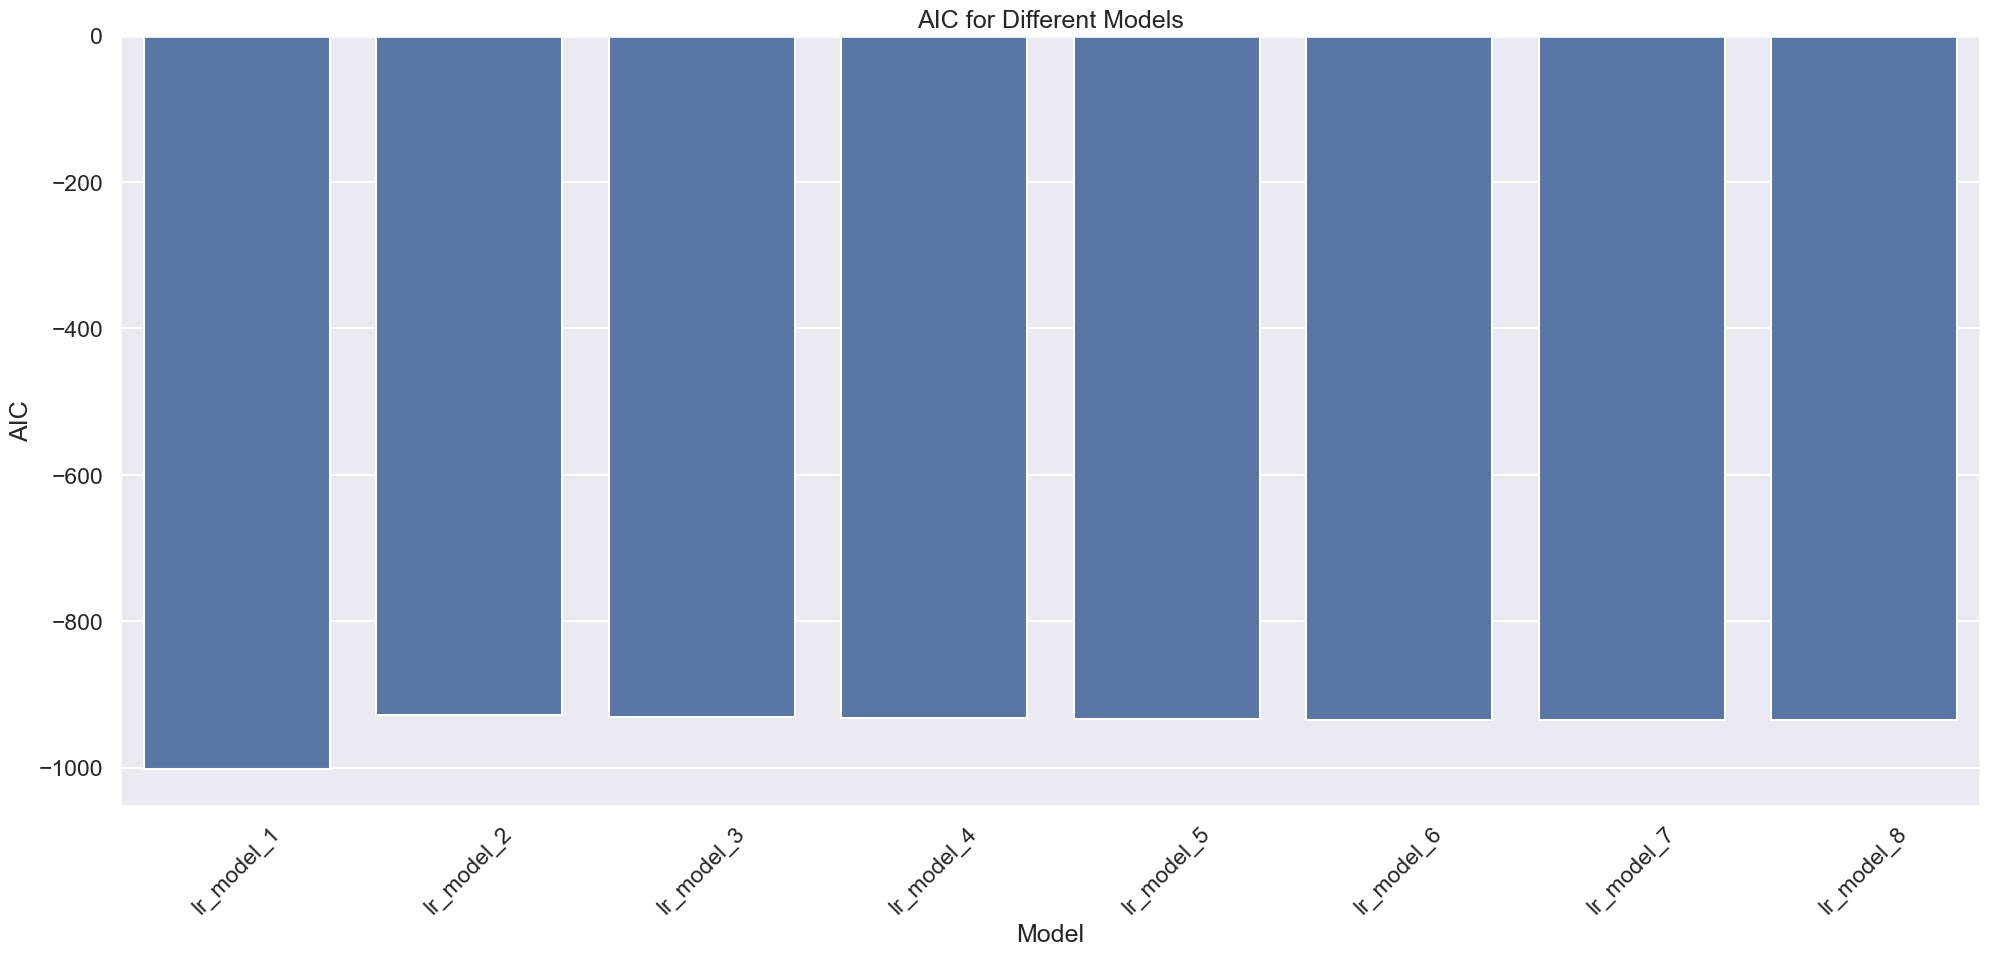

In [101]:
# Plotting AIC for each model
plt.figure(figsize=(24, 10))
ax = sns.barplot(x="Model", y="AIC", data=results_df)
plt.xticks(rotation=45)
plt.title("AIC for Different Models")

plt.show()

## **<a id='check-model-assumptions'>CHECK MODEL ASSUMPTIONS<a/>**  [▲](#top)

1. **Linearity:** The relationship between the independent variables (features) and the dependent variable (target) is linear.
2. **Homoscedasticity:** Residuals have constant variance (i.e., they are homoscedastic).
3. **Independence:** Residuals (errors) are independent of each other.
4. **Normality of Residuals:** Residuals are normally distributed.

### RESIDUALS VS. FITTED VALUES

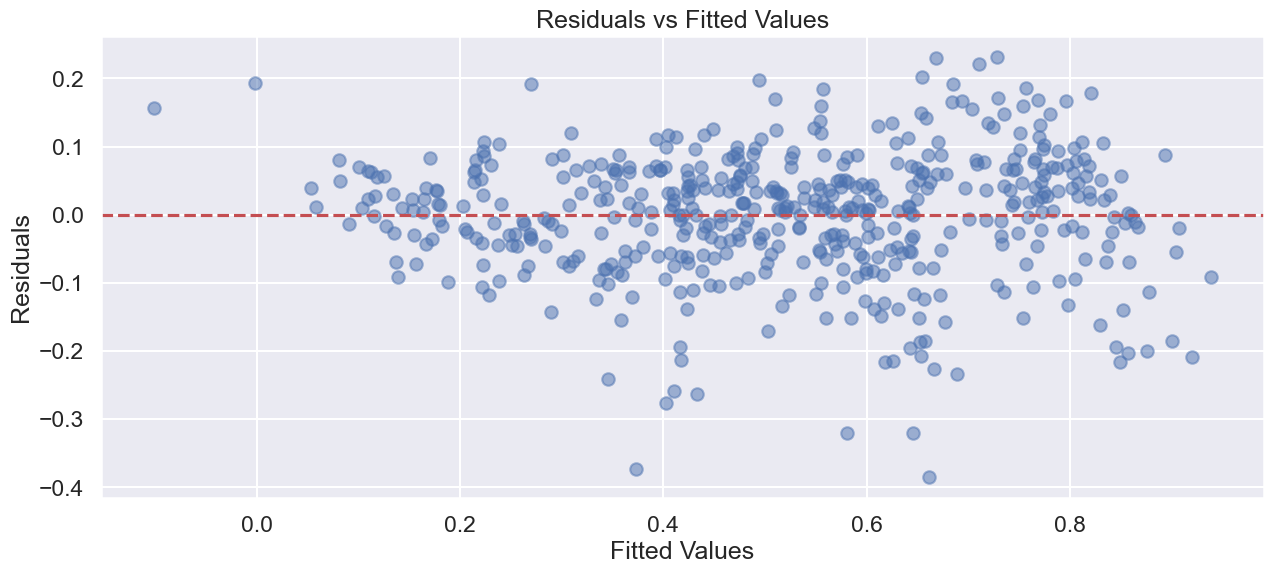

In [102]:
# Get fitted values and residuals
fitted_values = final_model_sm.fittedvalues
residuals = final_model_sm.resid

# Plot Residuals vs Fitted
plt.figure(figsize=(15, 6))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

#### OBSERVATIONS

1. Fitted Values are linear about the Target Variable.
2. Variance is constant about the mean.
3. There are some outliers on the negative residual axis.

In [103]:
from scipy.stats import zscore

# Calculate Z-scores
z_scores = zscore(residuals)

# Identify outliers (absolute Z-score greater than 3)
outliers = pd.Series(residuals[abs(z_scores) > 3])
outliers

690   -0.385076
498   -0.321056
692   -0.321013
666   -0.372556
dtype: float64

In [104]:
# Filter X_train to get rows corresponding to outliers
bike_sharing_outliers = bike_sharing.loc[outliers.index]
bike_sharing_outliers

holiday  working_day  temperature  humidity  wind_speed  count  \
690        1            0    13.940000   58.0417    3.542344   2425   
498        0            1    23.506653   78.9583   14.250364   2843   
692        0            0    11.411653   40.4583   25.250357   2277   
666        0            1    18.040000   88.0000   23.999400     22   

     season_spring  season_summer  season_winter  year_2019  month_aug  \
690              0              0              1          1          0   
498              0              1              0          1          0   
692              0              0              1          1          0   
666              0              0              1          1          0   

     month_dec  month_feb  month_jan  month_jul  month_jun  month_mar  \
690          0          0          0          0          0          0   
498          0          0          0          0          0          0   
692          0          0          0          0          0          0   
666          0          0          0          0          0          0   

     month_may  month_nov  month_oct  month_sep  weather_situations_bad  \
690          0          1          0          0                       0   
498          1          0          0          0                       0   
692          0          1          0          0                       0   
666          0          0          1          0                       1   

     weather_situations_good  weekday_fri  weekday_mon  weekday_sat  \
690                        1            0            0            0   
498                        0            0            1            0   
692                        1            0            0            1   
666                        0            0            1            0   

     weekday_sun  weekday_thu  weekday_wed  
690            0            1            0  
498            0            0            0  
692            0            0            0  
666            0            0            0

### INDEPENDENCE OF FEATURES

In [105]:
# Multicollinearity Check
feature_df = calculate_pvalues_and_vif(X_train_final, final_model_sm)
feature_df

Feature        VIF  P-Value
6              weekday_sat   1.087991   0.0367
2              weekday_mon   1.090894   0.0246
5              weekday_sun   1.083238   0.0095
1                month_mar   1.113999   0.0017
0                    const  26.889530   0.0000
9                 humidity   1.314863   0.0000
8              temperature   1.250575   0.0000
7            season_winter   1.210419   0.0000
4   weather_situations_bad   1.175207   0.0000
10              wind_speed   1.149648   0.0000
3                month_may   1.126696   0.0000
11               month_sep   1.108253   0.0000
12               year_2019   1.043118   0.0000

In [106]:
y_train_pred = final_model.predict(X_train_final)

#R-squared Value
round(metrics.r2_score(y_train,y_train_pred), 4)

0.8316

#### OBSERVATIONS 

1. There is no multicollinearity between the features, since VIF < 5 for all.
2. R-squared is 0.8316 which means the model explains a significant portion of the variability in the target variable, indicating a well-fitted model.

### NORMALITY CHECK

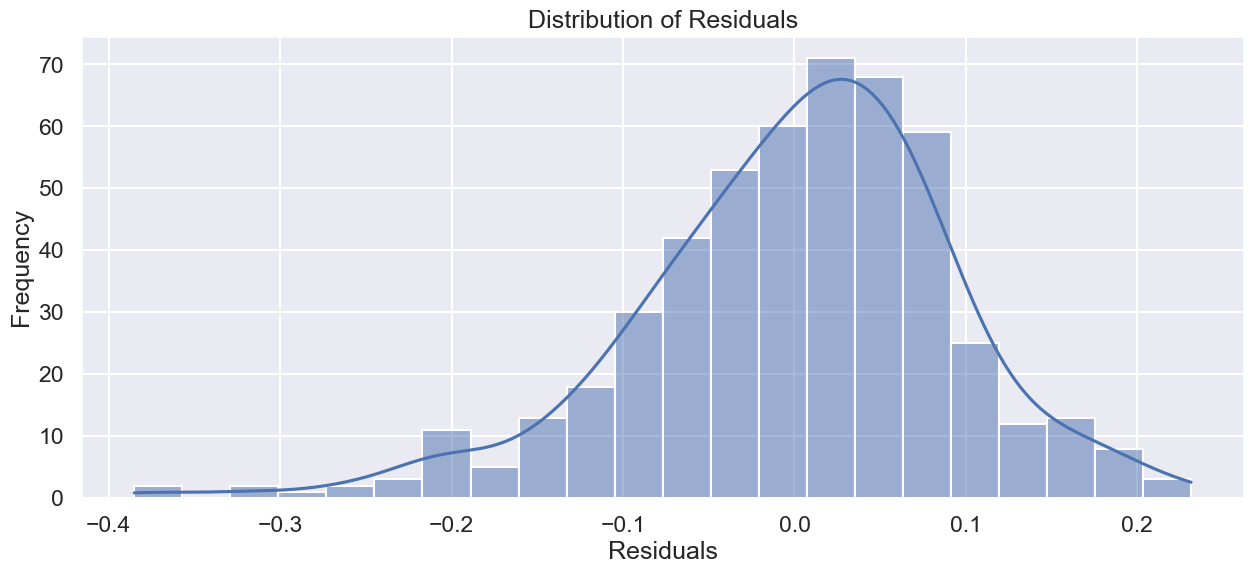

In [107]:
# Residual Analysis
plt.figure(figsize=(15, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [108]:
# Calculate the mean of residuals
mean_residuals = np.mean(residuals)
print(f"Mean of Residuals: {mean_residuals:.2f}")

Mean of Residuals: -0.00


In [109]:
# Calculate the median of residuals
median_residuals = np.median(residuals)
print(f"Median of Residuals: {median_residuals:.2f}")

Median of Residuals: 0.01


In [110]:
# Calculate the skew of residuals
skew_residuals = skew(residuals)
print(f"skew of Residuals: {skew_residuals:.2f}")

skew of Residuals: -0.66


#### OBSERVATIONS

1. **Mean = 0:** A mean of 0 for residuals suggests that, on average, the model’s predictions are neither overestimating nor underestimating the target values. This is a desirable property, as it means the model is unbiased.

2. **Normal Distribution:** If the residuals are normally distributed, it implies that the model errors are randomly distributed with no systematic patterns, which is another good indicator of a well-fitting model.

## **<a id='predictions-and-evaluation-on-the-test-set'>PREDICTIONS AND EVALUATION ON THE TEST SET<a/>**  [▲](#top)

In [111]:
# Final Model specifics:
# sklearn model name: 'final_model'
# statsmodels model name: 'final_model_sm'
# predictors: 'final_features'
# features: 'X_train_final'
# target: 'y_train'
# no. of predictors: 16
# R-squared: 0.857

In [112]:
final_model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     200.9
Date:                Sun, 18 Aug 2024   Prob (F-statistic):          4.83e-180
Time:                        12:55:49   Log-Likelihood:                 480.46
No. Observations:                 501   AIC:                            -934.9
Df Residuals:                     488   BIC:                            -880.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1875      0.022      8.613      0.000       0.145       0.230
month_mar                  0.0499      0.016      3.151      0.002       0.019       0.081
weekday_mon               -0.0270      0.012     -2.255      0.025      -0.051      -0.003
month_may                  0.0798      0.016      5.122      0.000       0.049       0.110
weather_situations_bad    -0.1404      0.030     -4.716      0.000      -0.199      -0.082
weekday_sun               -0.0324      0.012     -2.602      0.010      -0.057      -0.008
weekday_sat                0.0263      0.013      2.095      0.037       0.002       0.051
season_winter              0.1306      0.011     12.169      0.000       0.110       0.152
temperature                0.6100      0.020     30.621      0.000       0.571       0.649
humidity                  -0.2044      0.023     -8.916      0.000      -0.249      -0.159
wind_speed                -0.1247      0.022     -5.726      0.000      -0.168      -0.082
month_sep                  0.0974      0.016      6.241      0.000       0.067       0.128
year_2019                  0.2242      0.009     26.146      0.000       0.207       0.241
==============================================================================
Omnibus:                       48.456   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.197
Skew:                          -0.664   Prob(JB):                     7.73e-17
Kurtosis:                       4.338   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### SCALING THE TEST SET

In [113]:
# Check data before scaling
df_test.head()

holiday  working_day  temperature  humidity  wind_speed  count  \
583        0            1    30.169153   70.3750    7.832836   7273   
493        0            1    23.575000   74.4167   14.499604   4717   
294        0            0    17.322500   62.9167    6.208669   4308   
157        0            1    29.007500   59.7917   12.583136   4833   
670        0            1    14.555000   52.2083   17.833725   5847   

     season_spring  season_summer  season_winter  year_2019  month_aug  \
583              0              0              0          1          1   
493              0              1              0          1          0   
294              0              0              1          0          0   
157              0              1              0          0          0   
670              0              0              1          1          0   

     month_dec  month_feb  month_jan  month_jul  month_jun  month_mar  \
583          0          0          0          0          0          0   
493          0          0          0          0          0          0   
294          0          0          0          0          0          0   
157          0          0          0          0          1          0   
670          0          0          0          0          0          0   

     month_may  month_nov  month_oct  month_sep  weather_situations_bad  \
583          0          0          0          0                       0   
493          1          0          0          0                       0   
294          0          0          1          0                       0   
157          0          0          0          0                       0   
670          0          1          0          0                       0   

     weather_situations_good  weekday_fri  weekday_mon  weekday_sat  \
583                        0            0            0            0   
493                        0            0            0            0   
294                        1            0            0            1   
157                        1            0            0            0   
670                        1            1            0            0   

     weekday_sun  weekday_thu  weekday_wed  
583            0            0            0  
493            0            0            1  
294            0            0            0  
157            0            0            0  
670            0            0            0

In [114]:
# Transform the test set using the same scaler used to fit_transform the train data
df_test[num_cols] = scaler.transform(df_test[num_cols])  

# Check data after scaling
df_test.head()

holiday  working_day  temperature  humidity  wind_speed     count  \
583        0            1     0.868455  0.627290    0.265707  0.834215   
493        0            1     0.662048  0.688567    0.545436  0.540152   
294        0            0     0.466335  0.514214    0.197559  0.493097   
157        0            1     0.832094  0.466836    0.465023  0.553497   
670        0            1     0.379708  0.351863    0.685331  0.670156   

     season_spring  season_summer  season_winter  year_2019  month_aug  \
583              0              0              0          1          1   
493              0              1              0          1          0   
294              0              0              1          0          0   
157              0              1              0          0          0   
670              0              0              1          1          0   

     month_dec  month_feb  month_jan  month_jul  month_jun  month_mar  \
583          0          0          0          0          0          0   
493          0          0          0          0          0          0   
294          0          0          0          0          0          0   
157          0          0          0          0          1          0   
670          0          0          0          0          0          0   

     month_may  month_nov  month_oct  month_sep  weather_situations_bad  \
583          0          0          0          0                       0   
493          1          0          0          0                       0   
294          0          0          1          0                       0   
157          0          0          0          0                       0   
670          0          1          0          0                       0   

     weather_situations_good  weekday_fri  weekday_mon  weekday_sat  \
583                        0            0            0            0   
493                        0            0            0            0   
294                        1            0            0            1   
157                        1            0            0            0   
670                        1            1            0            0   

     weekday_sun  weekday_thu  weekday_wed  
583            0            0            0  
493            0            0            1  
294            0            0            0  
157            0            0            0  
670            0            0            0

In [115]:
# Separate features and target in the training set
X_test = df_test.drop('count', axis=1)
y_test = df_test['count']

X_test.shape, y_test.shape

((215, 28), (215,))

### PREDICT VALUES FOR TEST SET

In [116]:
final_features

['month_mar',
 'weekday_mon',
 'month_may',
 'weather_situations_bad',
 'weekday_sun',
 'weekday_sat',
 'season_winter',
 'temperature',
 'humidity',
 'wind_speed',
 'month_sep',
 'year_2019']

In [117]:
#Predict the values for test data using the final_model build using sklearn 
y_test_pred = final_model.predict(X_test[final_features])

# Calculate residuals
residuals = y_test - y_test_pred

# Calculate performance metrics
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_test_pred)
explained_variance = metrics.explained_variance_score(y_test, y_test_pred)
median_ae = metrics.median_absolute_error(y_test, y_test_pred)
mape = metrics.mean_absolute_percentage_error(y_test, y_test_pred)

# Calculate Adjusted R-squared
n = len(y_test)  # Number of observations
p = X_test.shape[1]  # Number of predictors (features)
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Residual Analysis metrics
residuals = y_test - y_test_pred  # Compute residuals
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)

# Predictive summary
predictive_summary = {
    'Mean of Residuals': mean_residuals,
    'Standard Deviation of Residuals': std_residuals,
    'Mean Absolute Error (MAE)': mae,
    'Mean Squared Error (MSE)': mse,
    'Root Mean Squared Error (RMSE)': rmse,
    'Mean Absolute Percentage Error (MAPE)': mape,
    'R^2 Score': r2,
    'Adjusted R^2': adj_r2,
    'Explained Variance Score': explained_variance,
    'Median Absolute Error': median_ae
}

# Print predictive summary
for metric, value in predictive_summary.items():
    print(f'{metric}: {value:.4f}')

Mean of Residuals: -0.0082
Standard Deviation of Residuals: 0.1062
Mean Absolute Error (MAE): 0.0773
Mean Squared Error (MSE): 0.0113
Root Mean Squared Error (RMSE): 0.1065
Mean Absolute Percentage Error (MAPE): 0.2007
R^2 Score: 0.7495
Adjusted R^2: 0.7118
Explained Variance Score: 0.7510
Median Absolute Error: 0.0528


#### OBSERVATIONS

R-squared of the `final_model` on the train data set was **0.8316** and on the test data set is **0.7495**

### MODEL PERFORMANCE EVALUATION

In [118]:
fitted_values = y_test_pred

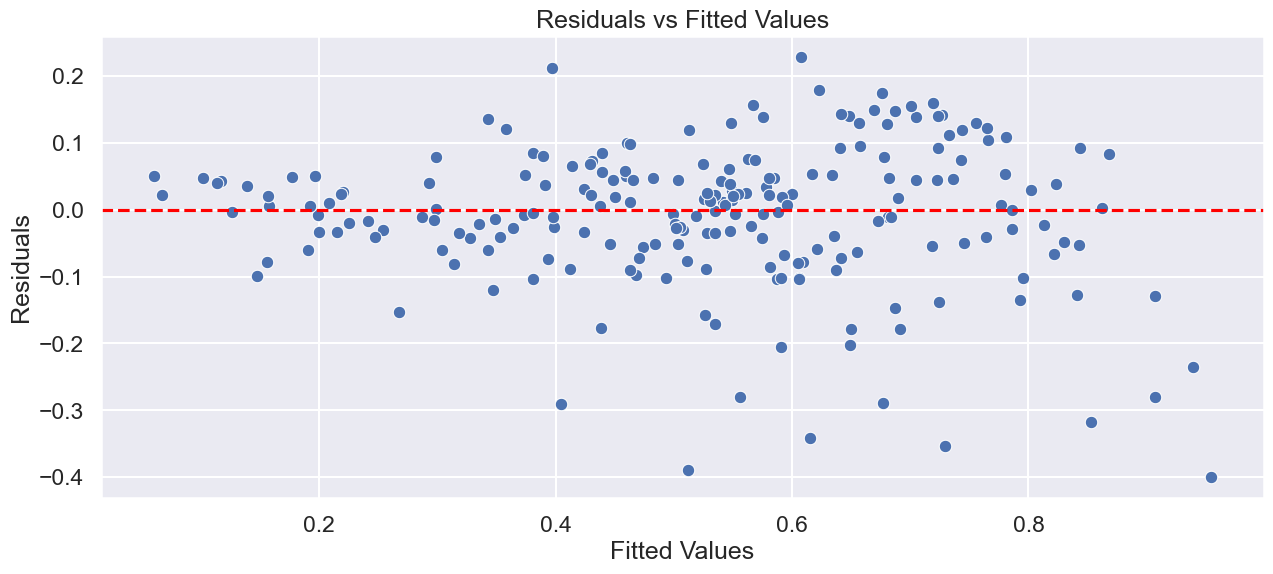

In [119]:
# Residual Plot
plt.figure(figsize=(15, 6))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

plt.show()

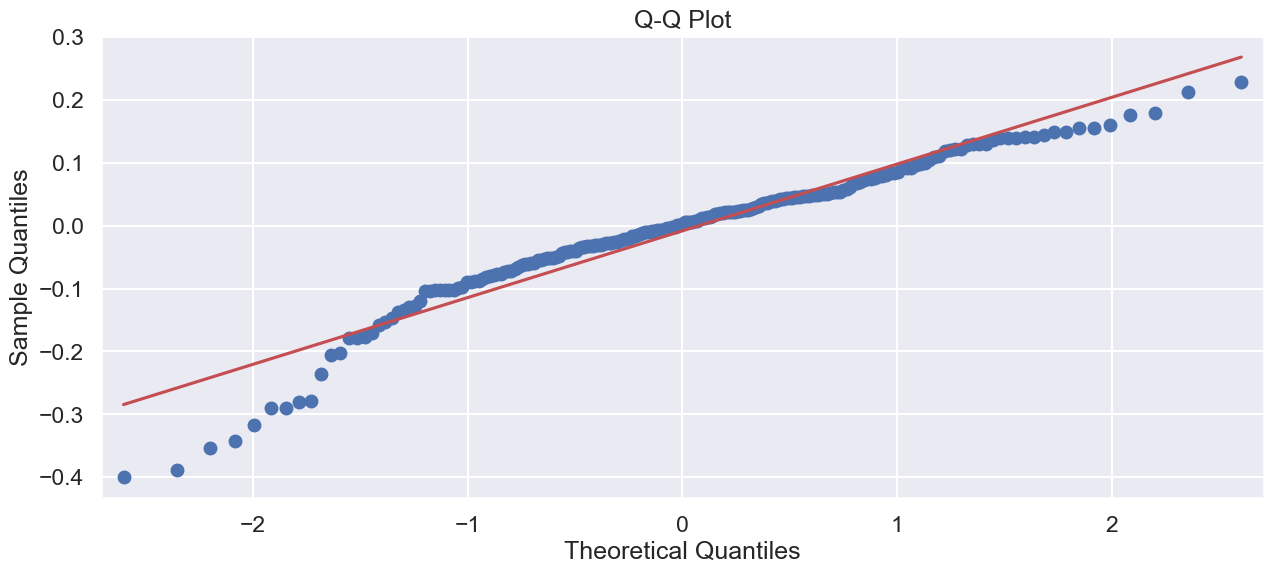

In [120]:
# Q-Q Plot
plt.figure(figsize=(15, 6))
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot')

plt.show()

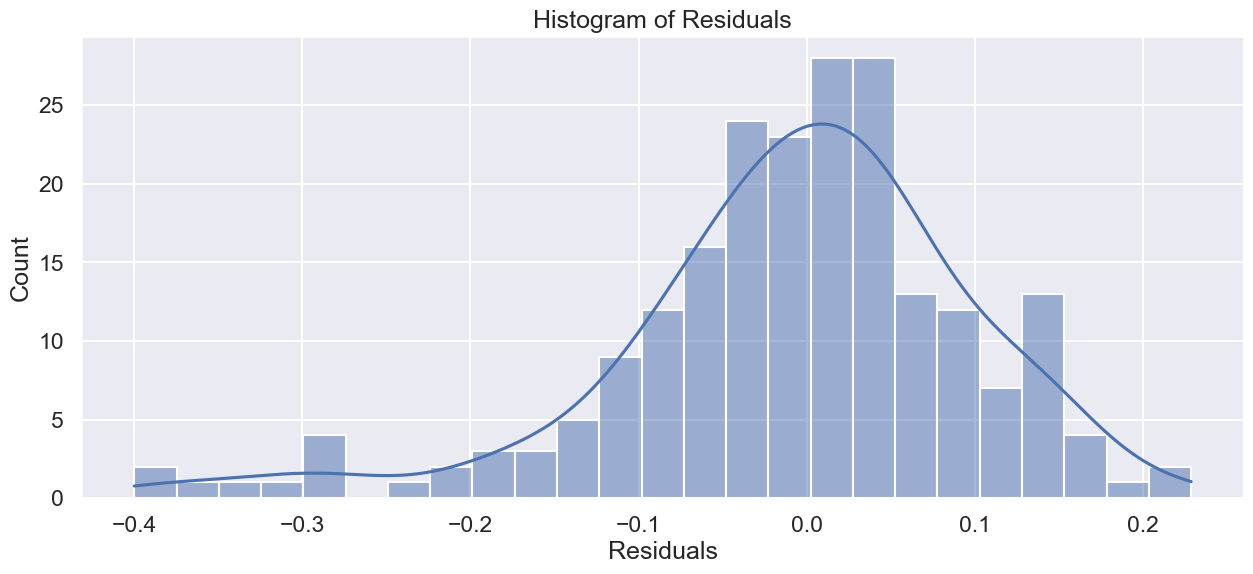

In [121]:
# Histogram of Residuals
plt.figure(figsize=(15, 6))
sns.histplot(residuals, kde=True, bins=25)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')

plt.show()

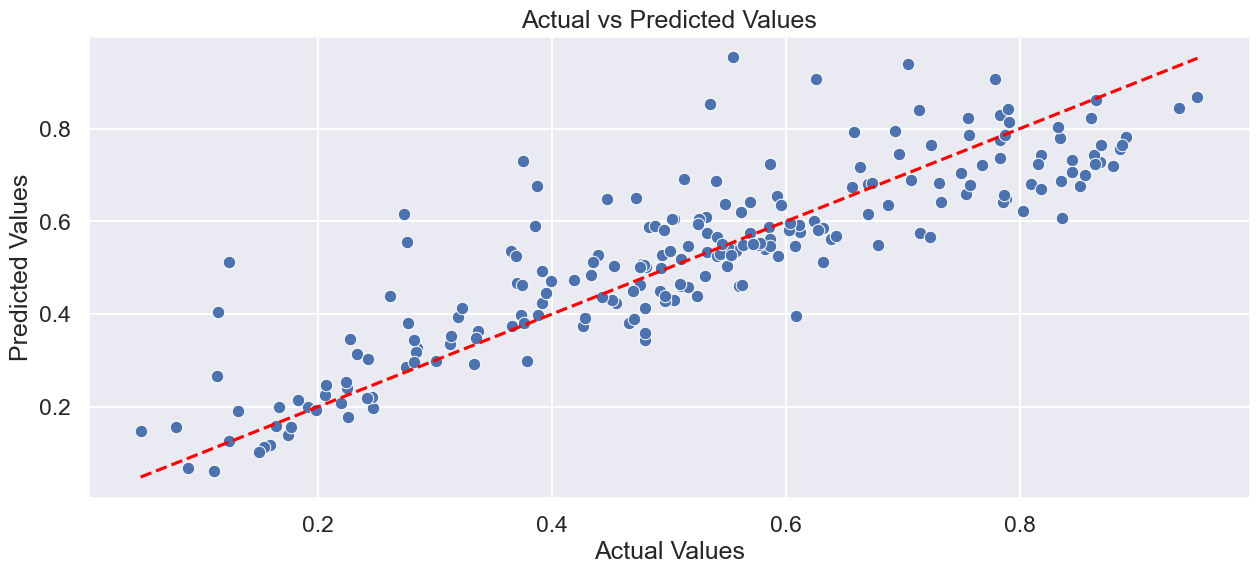

In [122]:
# Actual vs Predicted Plot
plt.figure(figsize=(15, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

plt.show()

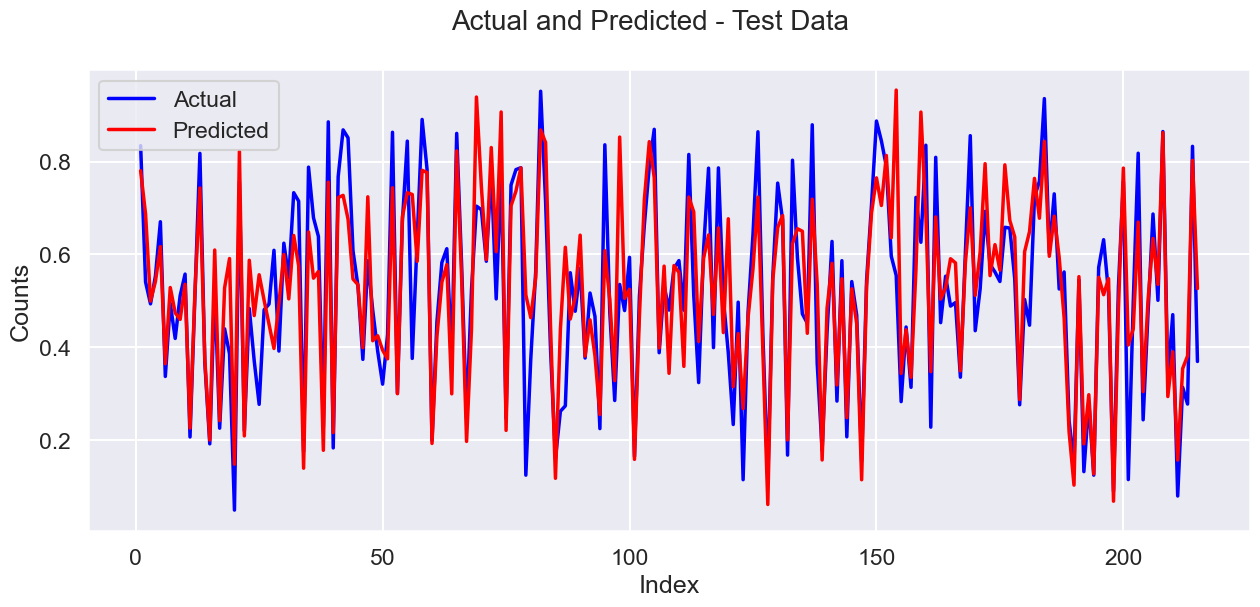

In [123]:
# Actual vs Predicted Values Over Index
fig = plt.figure(figsize=(15, 6))
c = [i for i in range(1, len(y_test) + 1)]
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-", label='Actual')
plt.plot(c, y_test_pred, color="red", linewidth=2.5, linestyle="-", label='Predicted')

# Titles and labels
fig.suptitle('Actual and Predicted - Test Data', fontsize=20)
plt.xlabel('Index')
plt.ylabel('Counts')
plt.legend()

plt.show()

# CONCLUSION: FINAL MODEL INTERPRETATION 

In [124]:
intercept_final = final_model.intercept_

print('Final Linear Regression Model (sklearn):')
print(f'Intercept: {round(intercept_final, 6)}')

Final Linear Regression Model (sklearn):
Intercept: 0.187506


In [125]:
# Create a DataFrame with feature names and coefficients
coefficients_df = pd.DataFrame({
    'Feature': final_features,
    'Coefficient': final_model.coef_,
    'Absolute Coefficient': np.abs(final_model.coef_)
})
coefficients_df.sort_values(by='Absolute Coefficient', ascending=False, inplace=True)
coefficients_df.index = range(1, len(coefficients_df) + 1)
coefficients_df.drop('Absolute Coefficient', axis=1, inplace=True)

# Print the DataFrame
print('Final Linear Regression Model (sklearn):')
coefficients_df

Final Linear Regression Model (sklearn):


Feature  Coefficient
1              temperature     0.610025
2                year_2019     0.224227
3                 humidity    -0.204377
4   weather_situations_bad    -0.140388
5            season_winter     0.130591
6               wind_speed    -0.124725
7                month_sep     0.097449
8                month_may     0.079833
9                month_mar     0.049851
10             weekday_sun    -0.032413
11             weekday_mon    -0.026995
12             weekday_sat     0.026309

In [126]:
final_model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     200.9
Date:                Sun, 18 Aug 2024   Prob (F-statistic):          4.83e-180
Time:                        12:55:51   Log-Likelihood:                 480.46
No. Observations:                 501   AIC:                            -934.9
Df Residuals:                     488   BIC:                            -880.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1875      0.022      8.613      0.000       0.145       0.230
month_mar                  0.0499      0.016      3.151      0.002       0.019       0.081
weekday_mon               -0.0270      0.012     -2.255      0.025      -0.051      -0.003
month_may                  0.0798      0.016      5.122      0.000       0.049       0.110
weather_situations_bad    -0.1404      0.030     -4.716      0.000      -0.199      -0.082
weekday_sun               -0.0324      0.012     -2.602      0.010      -0.057      -0.008
weekday_sat                0.0263      0.013      2.095      0.037       0.002       0.051
season_winter              0.1306      0.011     12.169      0.000       0.110       0.152
temperature                0.6100      0.020     30.621      0.000       0.571       0.649
humidity                  -0.2044      0.023     -8.916      0.000      -0.249      -0.159
wind_speed                -0.1247      0.022     -5.726      0.000      -0.168      -0.082
month_sep                  0.0974      0.016      6.241      0.000       0.067       0.128
year_2019                  0.2242      0.009     26.146      0.000       0.207       0.241
==============================================================================
Omnibus:                       48.456   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.197
Skew:                          -0.664   Prob(JB):                     7.73e-17
Kurtosis:                       4.338   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model Overview

We have a multiple linear regression model with the following equation:

```python
df.count = 0.187506 
            + (0.610025 * df.temperature) 
            + (0.224227 * df.year_2019)
            - (0.204377 * df.humidity)
            - (0.140388 * df.weather_situations_bad)
            + (0.130591 * df.season_winter)
            - (0.124725 * df.wind_speed)
            + (0.097449 * df.month_sep)
            + (0.079833 * df.month_may)
            + (0.049851 * df.month_mar)
            - (0.032413 * df.weekday_sun) 
            - (0.026995 * df.weekday_mon)
            + (0.026309 * df.weekday_sat)
```

### Intercept

- **Intercept: 0.187506** When all predictor variables (temperature, year_2019, humidity, weather_situations_bad, wind_speed, season_winter, month_sep, month_may, month_mar, weekday_sun, weekday_mon, weekday_sat) are zero, the expected value of the target variable is 0.187506. In practice, this value might not be directly interpretable, especially if some predictors cannot realistically be zero (e.g., temperature, humidity). It often serves as a baseline from which the effects of predictors are measured.

### Coefficients Interpretation

1. **Temperature (0.610025):** For each one-unit increase in temperature, the target variable increases by 0.610025 units, holding all other variables constant. This positive coefficient suggests that higher temperatures are associated with an increase in the target variable.

2. **Year 2019 (0.224227):** Being in the year 2019 (as opposed to another reference year) increases the target variable by 0.224227 units, holding other variables constant. This indicates that the target variable was higher in 2019 compared to the reference year.

3. **Humidity (-0.204377):** For each one-unit increase in humidity, the target variable decreases by 0.204377 units, holding all other variables constant. This negative coefficient implies that higher humidity is associated with a decrease in the target variable.

4. **Weather Situations Bad (-0.140388):** When weather situations are bad (relative to good weather, assuming binary coding), the target variable decreases by 0.140388 units, holding other variables constant. This suggests that bad weather situations are associated with a decrease in the target variable.

5. **Wind Speed (-0.124725):** For each one-unit increase in wind speed, the target variable decreases by 0.124725 units, holding all other variables constant. This negative coefficient suggests that higher wind speeds are associated with a decrease in the target variable.

6. **Season Winter (0.130591):** During the winter season (relative to another reference season), the target variable increases by 0.130591 units, holding other variables constant. This implies that winter is associated with an increase in the target variable compared to the reference season.

7. **Month September (0.097449):** In September (relative to the reference month), the target variable increases by 0.097449 units, holding other variables constant. This indicates that September is associated with an increase in the target variable compared to the reference month.

8. **Month May (0.079833):** In May (relative to the reference month), the target variable increases by 0.079833 units, holding other variables constant. This indicates that May is associated with an increase in the target variable compared to the reference month.

9. **Month March (0.049851):** In March (relative to the reference month), the target variable increases by 0.049851 units, holding other variables constant. This indicates that March is associated with an increase in the target variable compared to the reference month.

10. **Weekday Sunday (-0.032413):** On Sundays (relative to the reference weekday), the target variable decreases by 0.032413 units, holding other variables constant. This suggests that Sundays are associated with a decrease in the target variable compared to the reference weekday.

11. **Weekday Monday (-0.026995):** On Mondays (relative to the reference weekday), the target variable decreases by 0.026995 units, holding other variables constant. This suggests that Mondays are associated with a decrease in the target variable compared to the reference weekday.

12. **Weekday Saturday (0.026309):** On Saturdays (relative to the reference weekday), the target variable increases by 0.026309 units, holding other variables constant. This suggests that Saturdays are associated with an increase in the target variable compared to the reference weekday.

### Summary

- **Positive Coefficients:** `temperature`, `year_2019`, `season_winter`, `month_sep`, `month_may`, `month_mar`, and `weekday_sat` all have positive effects on the target variable, meaning that increases in these variables are associated with an increase in the target variable.
- **Negative Coefficients:** `humidity`, `weather_situations_bad`, `wind_speed`, `weekday_sun`, and `weekday_mon` have negative effects on the target variable, meaning that increases in these variables are associated with a decrease in the target variable.

In [127]:
# Extract Summary data for Hypothesis Testing on the coefficients
model_summary = final_model_sm.summary2().tables[1]

# Extract relevant columns for the table
table = model_summary[['Coef.', 'Std.Err.', 't', 'P>|t|', '[0.025', '0.975]']].rename(
    columns={
        'Coef.': 'Coefficient',
        'Std.Err.': 'Std. Error',
        't': 't-Value',
        'P>|t|': 'P-Value',
        '[0.025': '95% CI (Lower)',
        '0.975]': '95% CI (Upper)'
    }
)

table

Coefficient  Std. Error    t-Value        P-Value  \
const                      0.187506    0.021770   8.613070   9.897983e-17   
month_mar                  0.049851    0.015819   3.151348   1.725078e-03   
weekday_mon               -0.026995    0.011970  -2.255165   2.456529e-02   
month_may                  0.079833    0.015585   5.122317   4.353284e-07   
weather_situations_bad    -0.140388    0.029766  -4.716430   3.137754e-06   
weekday_sun               -0.032413    0.012456  -2.602242   9.543207e-03   
weekday_sat                0.026309    0.012556   2.095331   3.665631e-02   
season_winter              0.130591    0.010732  12.168555   6.162621e-30   
temperature                0.610025    0.019922  30.620927  1.106556e-115   
humidity                  -0.204377    0.022923  -8.915756   9.717404e-18   
wind_speed                -0.124725    0.021784  -5.725621   1.802709e-08   
month_sep                  0.097449    0.015615   6.240776   9.460770e-10   
year_2019                  0.224227    0.008576  26.145873   7.337214e-95   

                        95% CI (Lower)  95% CI (Upper)  
const                         0.144732        0.230281  
month_mar                     0.018769        0.080933  
weekday_mon                  -0.050515       -0.003475  
month_may                     0.049211        0.110456  
weather_situations_bad       -0.198873       -0.081903  
weekday_sun                  -0.056887       -0.007939  
weekday_sat                   0.001638        0.050980  
season_winter                 0.109504        0.151677  
temperature                   0.570882        0.649168  
humidity                     -0.249417       -0.159337  
wind_speed                   -0.167526       -0.081924  
month_sep                     0.066768        0.128130  
year_2019                     0.207376        0.241077

### Hypothesis Testing for Coefficients

For each predictor $ X_i $ in the model, we test the following hypotheses:

- **Null Hypothesis ($ H_0 $):** $ \beta_i = 0 $ (The predictor has no effect on the target variable.)
- **Alternative Hypothesis ($ H_1 $):** $ \beta_i \neq 0 $ (The predictor does have an effect on the target variable.)

The test statistic for each coefficient is calculated using the formula:

$
t = \frac{\text{coef}}{\text{std err}}
$

where `coef` is the coefficient value and `std err` is the standard error of the coefficient. The p-value associated with the t-statistic indicates whether the coefficient is significantly different from zero.


### Interpretation

1. **Intercept:**
   - **Coefficient:** 0.1875
   - **Standard Error:** 0.0218
   - **t-Statistic:** 8.613
   - **P-Value:** 0.000
   - **Interpretation:** Since the p-value is less than the significance level of 0.05, we reject the null hypothesis. This indicates that the intercept is statistically significant, meaning the baseline value of the target variable is significantly different from zero when all predictor variables are zero.

2. **Month March:**
   - **Coefficient:** 0.0499
   - **Standard Error:** 0.0158
   - **t-Statistic:** 3.151
   - **P-Value:** 0.002
   - **Interpretation:** Given that the p-value is less than 0.05, we reject the null hypothesis. This suggests that being in March has a significant positive effect on the target variable, with a 0.0499 unit increase.

3. **Weekday Monday:**
   - **Coefficient:** -0.0270
   - **Standard Error:** 0.0120
   - **t-Statistic:** -2.255
   - **P-Value:** 0.025
   - **Interpretation:** Since the p-value is below 0.05, we reject the null hypothesis. This implies that Monday has a significant negative impact on the target variable.

4. **Month May:**
   - **Coefficient:** 0.0798
   - **Standard Error:** 0.0156
   - **t-Statistic:** 5.122
   - **P-Value:** 0.000
   - **Interpretation:** As the p-value is less than 0.05, we reject the null hypothesis. This indicates that being in May has a significant positive effect on the target variable, increasing it by 0.0798 units.

5. **Weather Situations Bad:**
   - **Coefficient:** -0.1404
   - **Standard Error:** 0.0298
   - **t-Statistic:** -4.716
   - **P-Value:** 0.000
   - **Interpretation:** The p-value is less than 0.05, so we reject the null hypothesis. This means that bad weather situations have a significant negative impact on the target variable.

6. **Weekday Sunday:**
   - **Coefficient:** -0.0324
   - **Standard Error:** 0.0125
   - **t-Statistic:** -2.602
   - **P-Value:** 0.010
   - **Interpretation:** Given that the p-value is less than 0.05, we reject the null hypothesis. This suggests that Sunday has a significant negative effect on the target variable.

7. **Weekday Saturday:**
   - **Coefficient:** 0.0263
   - **Standard Error:** 0.0126
   - **t-Statistic:** 2.095
   - **P-Value:** 0.037
   - **Interpretation:** Since the p-value is below 0.05, we reject the null hypothesis. This indicates that Saturday has a significant positive effect on the target variable.

8. **Season Winter:**
   - **Coefficient:** 0.1306
   - **Standard Error:** 0.0107
   - **t-Statistic:** 12.169
   - **P-Value:** 0.000
   - **Interpretation:** The p-value is less than 0.05, so we reject the null hypothesis. This suggests that the winter season has a significant positive impact on the target variable.

9. **Temperature:**
   - **Coefficient:** 0.6100
   - **Standard Error:** 0.0199
   - **t-Statistic:** 30.621
   - **P-Value:** 0.000
   - **Interpretation:** As the p-value is less than 0.05, we reject the null hypothesis. This indicates that temperature has a significant positive effect on the target variable.

10. **Humidity:**
    - **Coefficient:** -0.2044
    - **Standard Error:** 0.0229
    - **t-Statistic:** -8.916
    - **P-Value:** 0.000
    - **Interpretation:** Given that the p-value is less than 0.05, we reject the null hypothesis. This suggests that humidity has a significant negative effect on the target variable.

11. **Wind Speed:**
    - **Coefficient:** -0.1247
    - **Standard Error:** 0.0218
    - **t-Statistic:** -5.726
    - **P-Value:** 0.000
    - **Interpretation:** Since the p-value is below 0.05, we reject the null hypothesis. This indicates that wind speed has a significant negative effect on the target variable.

12. **Month September:**
    - **Coefficient:** 0.0974
    - **Standard Error:** 0.0156
    - **t-Statistic:** 6.241
    - **P-Value:** 0.000
    - **Interpretation:** The p-value is less than 0.05, so we reject the null hypothesis. This indicates that being in September has a significant positive effect on the target variable.

13. **Year 2019:**
    - **Coefficient:** 0.2242
    - **Standard Error:** 0.0086
    - **t-Statistic:** 26.146
    - **P-Value:** 0.000
    - **Interpretation:** As the p-value is less than 0.05, we reject the null hypothesis. This indicates that the year 2019 has a significant positive effect on the target variable.

### Summary

All predictors in the model are statistically significant, as indicated by their p-values being less than 0.05. This suggests that each predictor has a meaningful impact on the target variable. The direction and magnitude of their effects are reflected in the coefficients, which provide insights into how each predictor influences the target variable.

## KEY INSIGHTS

#### 1. Seasonal and Monthly Effects
- **Monthly Influence**: 
  - The coefficients for `month_may` (0.0798) and `month_mar` (0.0499) indicate increased counts in these months, suggesting higher activity or demand.
  - The positive coefficient for `month_sept` (0.0974) also points to heightened activity in September.
- **Seasonal Influence**:
  - The positive coefficient for `season_winter` (0.1306) suggests that winter months see higher counts, potentially due to seasonal factors driving increased activity.

#### 2. Day of the Week Influence
- **Negative Impact on Mondays and Sundays**:
  - The coefficients for `weekday_mon` (-0.0270) and `weekday_sun` (-0.0324) show lower counts on these days, reflecting reduced activity.
- **Positive Impact on Saturdays**:
  - The positive coefficient for `weekday_sat` (0.0263) suggests that Saturdays experience higher counts, possibly due to increased weekend activities.

#### 3. Weather Conditions
- **Negative Impact of Bad Weather**:
  - The negative coefficient for `weather_situations_bad` (-0.1404) indicates a significant decrease in counts during bad weather, showing the impact of adverse conditions on activity.
  
#### 4. Influence of Temperature, Humidity, and Wind Speed
- **Temperature**:
  - The strong positive coefficient for `temperature` (0.6100) suggests that warmer temperatures are associated with increased counts, indicating that warm weather encourages activity.
- **Humidity and Wind Speed**:
  - The negative coefficients for `humidity` (-0.2044) and `wind_speed` (-0.1247) imply that higher humidity and wind speed reduce activity levels.

#### 5. Yearly Trend
- **Positive Trend in 2019**:
  - The positive coefficient for `year_2019` (0.2242) indicates that counts were higher in 2019, suggesting a possible upward trend over time.

#### 6. Overall Model Fit
- **Model Strength**:
  - The high R-squared (0.832) and adjusted R-squared (0.828) values indicate that the model explains a substantial portion of the variance in counts.
  - The F-statistic (200.9) and its p-value (4.83e-180) confirm that the model is statistically significant.

### Application of Findings

- **Operational Planning**: The Organization can adjust their operations or staffing based on the identified seasonal and weekly patterns, preparing for higher activity during certain months and weekends.
- **Weather-Responsive Strategies**: The Company might implement strategies like offering promotions during bad weather or adjusting outdoor activities according to the forecast.
- **Long-Term Growth Preparation**: The positive trend in 2019 suggests potential future growth, encouraging businesses to scale operations or expand capacity.
- **Targeted Interventions**: Understanding the effects of temperature, humidity, and wind speed on activity can guide improvements, such as optimizing HVAC systems to enhance comfort and potentially increase activity levels.


